# Global Power Plant Database         

### Problem Statement:     

#### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

##### The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 


#### Prediction :   

Make two prediction  1) Primary Fuel    2) capacity_mw 

In [300]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [301]:
# SETTING A customized plot style,font, figure and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [302]:
# loading the data
Powerplant = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
# importing data from github directly

In [303]:
# looking at the shape
Powerplant.shape

# We can see there are 27 columns and 907 rows

(907, 27)

In [304]:
# Inorder to view all the columns while printing we are setting an option to display the maximum columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [305]:
# looking at the first 10 rows from the df
Powerplant.head(10)

# Just By looking at the first five rows we can observe there are null values in most of the columns
# We will treat them later

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   
5     IND        India              AKRIMOTA LIG  IND0000003        250.0   
6     IND        India                    ALIYAR  IND0000004         60.0   
7     IND        India           ALLAIN DUHANGAN  IND0000005        192.0   
8     IND        India               ALMATTI DAM  IND0000006        290.0   
9     IND        India               AMAR KANTAK  IND0000007        210.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   
5   23.7689    68.6447         Coal         Oil         NaN          NaN   
6   10.4547    77.0078        Hydro         NaN         NaN          NaN   
7   32.2258    77.2070        Hydro         NaN         NaN          NaN   
8   16.3300    75.8863        Hydro         NaN         NaN          NaN   
9   23.1642    81.6373         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   
5              2005.0                   NaN   
6              1970.0                   NaN   
7              2010.0                   NaN   
8              2004.0                   NaN   
9              2008.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   
5         Central Electricity Authority   
6         Central Electricity Authority   
7         Central Electricity Authority   
8         Central Electricity Authority   
9         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   
5                             http://www.cea.nic.in/   
6                             http://www.cea.nic.in/   
7                             http://www.cea.nic.in/   
8                             http://www.cea.nic.in/   
9                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   
5                                   WRI      NaN                 2019.0   
6                                   WRI      NaN                 2019.0   
7                                   WRI      NaN                 2019.0   
8                                

In [306]:
# looking at the last 10 rows
Powerplant.tail(10)

country country_long                                               name  \
897     IND        India  Wind power project by Riddhi Siddhi Gluco Biol...   
898     IND        India                    Wind power project in Rajasthan   
899     IND        India                                    YAMUNANAGAR TPP   
900     IND        India                                 YASHWANTRAO MOHITE   
901     IND        India                                      YELHANKA (DG)   
902     IND        India                                       YERMARUS TPP   
903     IND        India                       Yelesandra Solar Power Plant   
904     IND        India                       Yelisirur wind power project   
905     IND        India                                        ZAWAR MINES   
906     IND        India                            iEnergy Theni Wind Farm   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
897  WRI1026753        34.65    8.8709    77.4466         Wind         NaN   
898  WRI1026769        42.00   27.1715    70.6877         Wind         NaN   
899  IND0000511       600.00   30.1081    77.3257         Coal         Oil   
900  WRI1019995        16.00   17.1653    74.2456      Biomass         NaN   
901  IND0000512       106.60   13.1156    77.5838          Oil         NaN   
902  IND0000513      1600.00   16.2949    77.3568         Coal         Oil   
903  WRI1026222         3.00   12.8932    78.1654        Solar         NaN   
904  WRI1026776        25.50   15.2758    75.5811         Wind         NaN   
905  WRI1019901        80.00   24.3500    73.7477         Coal         NaN   
906  WRI1026761        16.50    9.9344    77.4768         Wind         NaN   

    other_fuel2  other_fuel3  commissioning_year  \
897         NaN          NaN                 NaN   
898         NaN          NaN                 NaN   
899         NaN          NaN              2007.0   
900         NaN          NaN                 NaN   
901         NaN          NaN              1993.0   
902         NaN          NaN              2016.0   
903         NaN          NaN                 NaN   
904         NaN          NaN                 NaN   
905         NaN          NaN                 NaN   
906         NaN          NaN                 NaN   

                                   owner                               source  \
897    Riddhi Siddhi Gluco Biols Limited                                  CDM   
898        Mytrah Energy (India) Limited                                  CDM   
899                                  NaN        Central Electricity Authority   
900              Yashwantrao Krishna ssk              Yashwantrao Krishna ssk   
901                                  NaN        Central Electricity Authority   
902                                  NaN        Central Electricity Authority   
903  Karnataka Power Corporation Limited  Karnataka Power Corporation Limited   
904                                  NaN                                  CDM   
905                   Hindustan Zinc ltd                   Hindustan Zinc ltd   
906                   iEnergy Wind Farms                                  CDM   

                                                   url geolocation_source  \
897  https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1...                WRI   
898  https://cdm.unfccc.int/Projects/DB/DNV-CUK1354...                WRI   
899                             http://www.cea.nic.in/                WRI   
900  http://viainfotech.biz/Biomass/theme5/document...                WRI   
901                             http://www.cea.nic.in/                WRI   
902                             http://www.cea.nic.in/                WRI   
903                          http://karnatakapower.com     Industry About   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...                WRI   
905                           http://www.hzlindia.com/                WRI   
906  https://cdm.unfccc.int/Projects/DB/

In [307]:
Powerplant.info()

# checking the information about the data 
# null values are more in this data
# There are 12 categorical variables and 15 continuous variables
# One of the predictor primary_fuel is a object datatype so, we have build a classification model for predicting the fuel type 
# And for capacity mw a float datatype we have to build a regression model for presicting the capacity of electricity generated in megawatts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

## Checking the null values

In [308]:
Powerplant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [309]:
# checking total number of null values in the columns 10445
Powerplant.isnull().sum().sum()

10445

<AxesSubplot:>

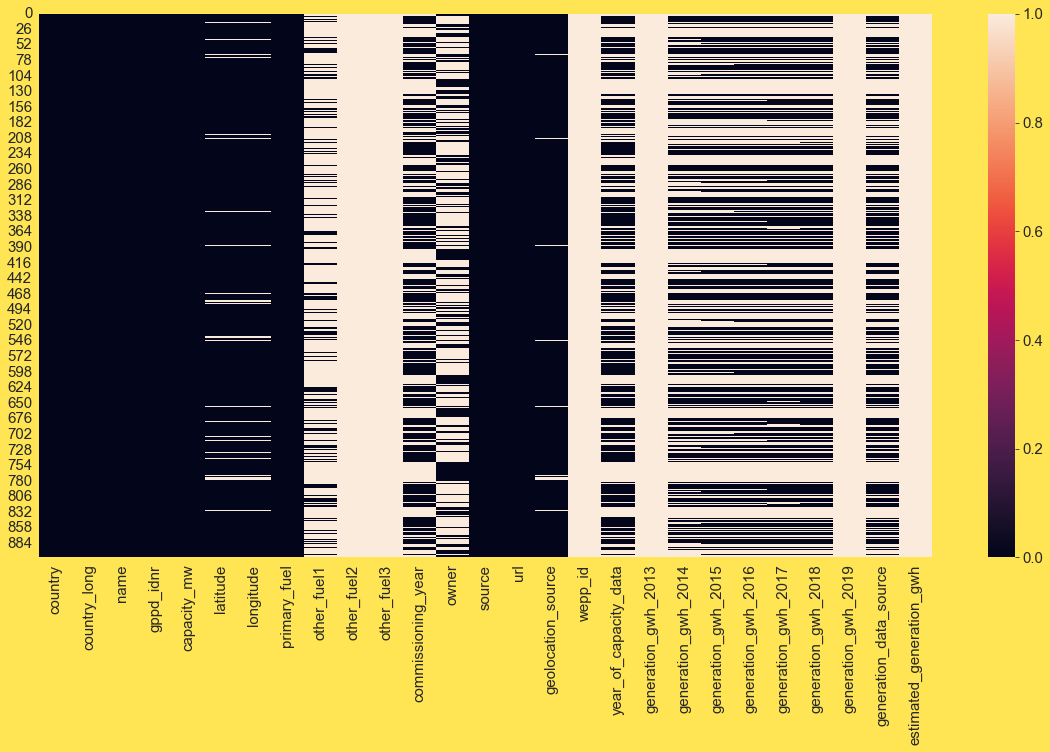

In [310]:
# plotting a heatmap to understand better visually
plt.figure(figsize=(20,10))

sns.heatmap(Powerplant.isnull())

In [311]:
# We can observe that the null values are continuous in most of the columns, there is no specific pattern to treat them

# We can see that other_fuel2,other_fuel3,other,wep_id,generation_gwh_2013,generation_gwh_2019 and estimated_generationa-gwh
# has completely null vaues.
    
# We can consider to drop them

In [312]:
# descriptive analysis
Powerplant.describe().T

# generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.


count         mean          std        min  \
capacity_mw               907.0   326.223755   590.085456     0.0000   
latitude                  861.0    21.197918     6.239612     8.1689   
longitude                 861.0    77.464907     4.939316    68.6447   
other_fuel3                 0.0          NaN          NaN        NaN   
commissioning_year        527.0  1997.091082    17.082868  1927.0000   
wepp_id                     0.0          NaN          NaN        NaN   
year_of_capacity_data     519.0  2019.000000     0.000000  2019.0000   
generation_gwh_2013         0.0          NaN          NaN        NaN   
generation_gwh_2014       398.0  2431.823590  4026.440035     0.0000   
generation_gwh_2015       422.0  2428.226946  4194.596959     0.0000   
generation_gwh_2016       434.0  2467.936859  4162.884308     0.0000   
generation_gwh_2017       440.0  2547.759305  4196.991169     0.0000   
generation_gwh_2018       448.0  2600.804099  4314.880456     0.0000   
generation_gwh_2019         0.0          NaN          NaN        NaN   
estimated_generation_gwh    0.0          NaN          NaN        NaN   

                                  25%          50%          75%        max  
capacity_mw                 16.725000    59.200000   385.250000   4760.000  
latitude                    16.773900    21.780000    25.512400     34.649  
longitude                   74.256200    76.719500    79.440800     95.408  
other_fuel3                       NaN          NaN          NaN        NaN  
commissioning_year        1988.000000  2001.000000  2012.000000   2018.000  
wepp_id                           NaN          NaN          NaN        NaN  
year_of_capacity_data     2019.000000  2019.000000  2019.000000   2019.000  
generation_gwh_2013               NaN          NaN          NaN        NaN  
generation_gwh_2014        223.557672   801.123775  3035.306250  28127.000  
generation_gwh_2015        176.381063   711.181225  3084.121250  30539.000  
generation_gwh_2016        188.285252   737.205450  3282.861313  30015.000  
generation_gwh_2017        177.874930   817.977250  3275.690475  35116.000  
generation_gwh_2018        193.378250   751.644375  3143.535900  35136.000  
generation_gwh_2019               NaN          NaN          NaN        NaN  
estimated_generation_gwh          NaN          NaN          NaN        NaN

In [313]:
# checking the categorical data as well
Powerplant.describe(include='O').T

# 

count unique                            top freq
country                  907      1                            IND  907
country_long             907      1                          India  907
name                     907    907               ACME Solar Tower    1
gppd_idnr                907    907                     WRI1020239    1
primary_fuel             907      8                           Coal  258
other_fuel1              198      3                            Oil  195
other_fuel2                1      1                            Oil    1
owner                    342    280                    Acc Acc ltd    4
source                   907    191  Central Electricity Authority  519
url                      907    304         http://www.cea.nic.in/  519
geolocation_source       888      3                            WRI  765
generation_data_source   449      1  Central Electricity Authority  449

In [314]:
# checking the number of unique values in each column
Powerplant.nunique()

# We can see that country and country_long is one and the same and it has only one unique value India
# Same with year_of capacity data and generation_data_source
# Since the entire columns are having only one unique category it doesn't have any use for the model, so we can drop them
# Also name and

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [315]:
# checking the unique values in primary fuel one of the target
Powerplant['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [316]:
Powerplant['other_fuel1'].value_counts()

# We can see that oil is having more

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [317]:
Powerplant['other_fuel2'].value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [318]:
# checking the % of null values in each column
for i in Powerplant.columns:
    print('% of null values in',i,': ',Powerplant[i].isnull().sum()/907*100)
   

% of null values in country :  0.0
% of null values in country_long :  0.0
% of null values in name :  0.0
% of null values in gppd_idnr :  0.0
% of null values in capacity_mw :  0.0
% of null values in latitude :  5.071664829106946
% of null values in longitude :  5.071664829106946
% of null values in primary_fuel :  0.0
% of null values in other_fuel1 :  78.16979051819185
% of null values in other_fuel2 :  99.88974641675854
% of null values in other_fuel3 :  100.0
% of null values in commissioning_year :  41.89636163175303
% of null values in owner :  62.29327453142227
% of null values in source :  0.0
% of null values in url :  0.0
% of null values in geolocation_source :  2.0948180815876514
% of null values in wepp_id :  100.0
% of null values in year_of_capacity_data :  42.77839029768467
% of null values in generation_gwh_2013 :  100.0
% of null values in generation_gwh_2014 :  56.119073869900774
% of null values in generation_gwh_2015 :  53.47298787210585
% of null values in gene

In [319]:
# dropping the columns which have more than 75% null values
# here we are dropping all the three columns of other_fuel, because there is no data in it which we can use or impute
# also our class variable primary_fuel is aligned with those columns, so we don't need them

power_df = Powerplant.copy() # duplicating the dataframe

power_df.drop(['other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','other_fuel2','other_fuel1'],axis=1,inplace=True)

power_df.head() # checking the df again

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel  commissioning_year                 owner  \
0   28.1839    73.2407        Solar              2011.0           Solar Paces   
1   24.7663    74.6090         Coal                 NaN  Ultratech Cement ltd   
2   21.9038    69.3732         Wind                 NaN                   AES   
3   23.8712    91.3602          Gas              2004.0                   NaN   
4   21.9603    82.4091         Coal              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  year_of_capacity_data  \
0  National Renewable Energy Laboratory                    NaN   
1                                   WRI                    NaN   
2                                   WRI                    NaN   
3                                   WRI                 2019.0   
4                                   WRI                 2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0                  NaN                  NaN                            NaN  
1                  NaN                  NaN                            NaN  
2                  NaN                  NaN                            NaN  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority

In [320]:
power_df.shape

# We have dropped 7 columns

(907, 20)

In [321]:
power_df.isnull().sum()

# We have removed the completely missing random values
# Now we have to treat the nan values for the other columns which are having almost 50% data missing in few columns

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [322]:
# looking at the dtypes
cat_cols = power_df.dtypes[power_df.dtypes == 'object'].index.tolist()
# we are making the cat_cols to a list

In [323]:
cat_cols

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [324]:
# now continuous features
cont_cols = power_df.dtypes[power_df.dtypes != 'object'].index.tolist()
cont_cols

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [325]:
# checking the number of unique values in each
for i in cat_cols:
    print(i,power_df[i].nunique())

country 1
country_long 1
name 907
gppd_idnr 907
primary_fuel 8
owner 280
source 191
url 304
geolocation_source 3
generation_data_source 1


In [326]:
# looking at the unique values of categorical columns
for i in cat_cols:
    print(power_df[i].value_counts())
    print('\n')
    
# We can obserev

IND    907
Name: country, dtype: int64


India    907
Name: country_long, dtype: int64


ACME Solar Tower                                                   1
RAICHUR                                                            1
PRYAGRAJ (BARA) TPP                                                1
PULICHINTALA                                                       1
PUNE MILL                                                          1
PURULIA PSS                                                        1
PYKARA                                                             1
PYKARA ALIMATE                                                     1
Panandhro Solar Power Plant                                        1
Patan Taluka Wind Farm                                             1
Patnaik Hatti Wind Farm                                            1
Patnaik Jamnagar Wind Farm                                         1
Patodi Solar Power Plant                                           1
Phagi Solar Po

In [327]:
# checking the number of unique values in each continuous columns
for i in cont_cols:
    print(i,power_df[i].nunique())

capacity_mw 361
latitude 836
longitude 827
commissioning_year 73
year_of_capacity_data 1
generation_gwh_2014 371
generation_gwh_2015 396
generation_gwh_2016 403
generation_gwh_2017 408
generation_gwh_2018 410


In [328]:
# year_of_capacity has only one unique value
power_df['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

In [329]:
# Also we should get rid of the columns which are having all unique values, which just acts as an index for the data
# which include 'country','country_long','name','gppd_idnr','url'
# we are dropping url column as well because it is of no use for the model creation and analysis 
# because it just contains the links of those particular source field.

power_df.drop(['country','country_long','name','gppd_idnr','url'],axis=1,inplace=True)

In [330]:
power_df.shape

(907, 15)

In [331]:
power_df.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [332]:
power_df.nunique()

capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
commissioning_year         73
owner                     280
source                    191
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [333]:
power_df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [334]:
# Also dropping th year_of_capacity_data because there is only one year in it 2019,
# Although there is only 319 null values in this column rest of are having 2019 as its values
# But we don't know if another another unique year can come in this or not, so we will drop this column as well.
# Same with the generation_data_source column too.
# So we will drop this column as well
power_df.drop(['year_of_capacity_data','generation_data_source'],axis=1,inplace=True)

In [335]:
power_df.shape

(907, 13)

In [336]:
power_df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [337]:
# IMPUTING THE NULL VALUES

In [338]:
# latitude, logitude and geolocation_souce has fewer null values lets impute them first

<AxesSubplot:xlabel='latitude', ylabel='Density'>

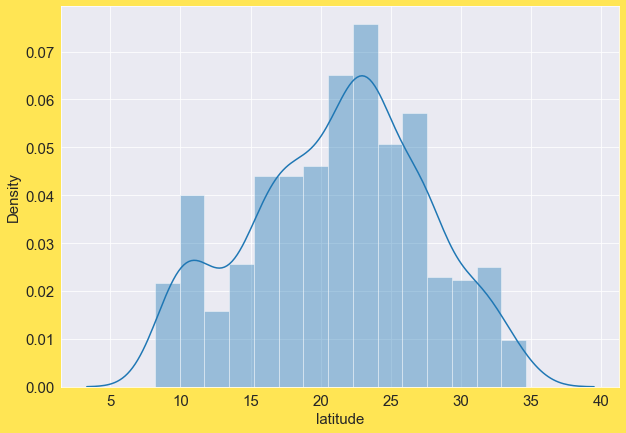

In [339]:
# we should check the distributio of columns with null values before imputing
sns.distplot(power_df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

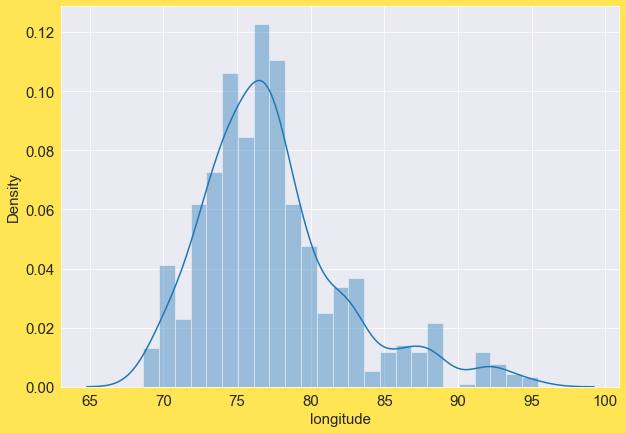

In [340]:
sns.distplot(power_df['longitude'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Count'>

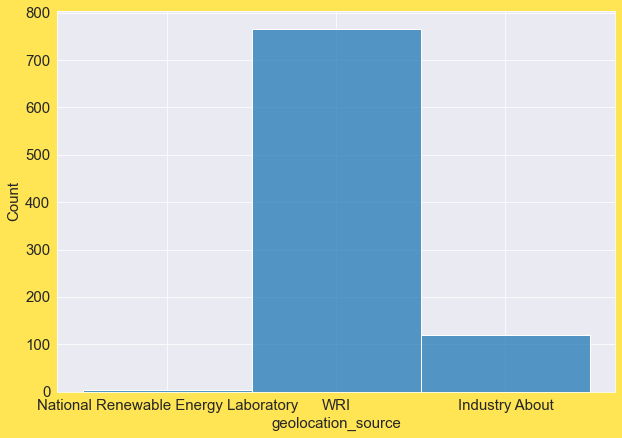

In [341]:
sns.histplot(power_df['geolocation_source'])

In [342]:
# checking the mode of the column geolocation
power_df['geolocation_source'].mode()

# We can seee WRI is the most frequent category in this column

0    WRI
dtype: object

In [343]:
(power_df['geolocation_source'] == 'WRI').sum()/power_df.geolocation_source.count()*100 

#checking the % contribution of the most frequently occuring category in this column.
# 86% of the geo column is contributed by WRI

86.14864864864865

In [344]:
# So we will replace the null values by its mode
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose = 0 )

In [345]:
# We have to fit the column before using si
si = si.fit(power_df[['geolocation_source']])
power_df[['geolocation_source']] = si.transform(power_df[['geolocation_source']])

In [346]:
# checking the null values again
power_df[['geolocation_source']].isnull().sum()

# We can see that the null values are removed

geolocation_source    0
dtype: int64

In [347]:
# lets fill the null values with mean in lattitude and longitude colums and check the distribution
power_df['latitude']=power_df['latitude'].fillna(power_df['latitude'].mean())
power_df['longitude']=power_df['longitude'].fillna(power_df['longitude'].mean())

<AxesSubplot:xlabel='latitude', ylabel='Density'>

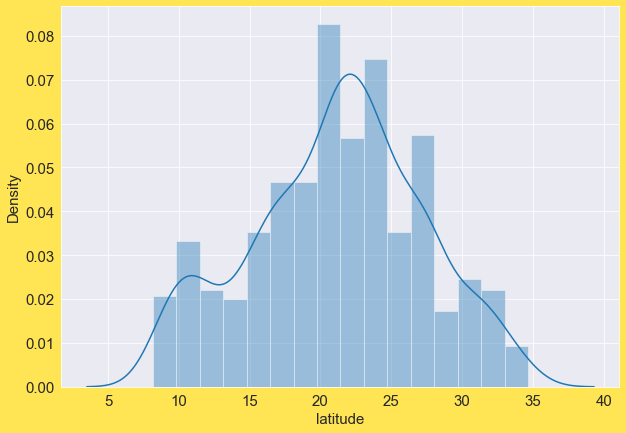

In [348]:
sns.distplot(power_df['latitude'])

# We can observe the distribution of latitude remained intact 

<AxesSubplot:xlabel='longitude', ylabel='Density'>

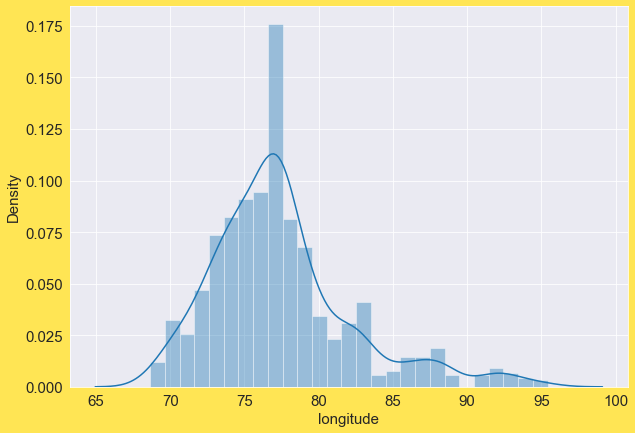

In [349]:
sns.distplot(power_df['longitude'])

# same with the longitude as well

In [350]:
power_df.commissioning_year.value_counts()


2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
2014.0    17
2017.0    16
2002.0    16
2000.0    16
2001.0    15
2011.0    13
1993.0    13
1996.0    13
1999.0    13
1995.0    12
1992.0    11
2003.0    10
1984.0    10
2005.0    10
1991.0    10
2009.0    10
1994.0    10
2006.0    10
2007.0    10
1998.0     9
2004.0     9
1990.0     9
2008.0     9
1997.0     8
1987.0     8
1979.0     7
1988.0     7
1980.0     6
1986.0     6
1989.0     6
2018.0     6
1970.0     5
1957.0     5
1975.0     4
1966.0     4
1978.0     4
1985.0     4
1983.0     4
1981.0     4
1976.0     4
1961.0     3
1963.0     3
1960.0     3
1977.0     3
1968.0     3
1973.0     3
1962.0     3
1965.0     2
1967.0     2
1952.0     2
1974.0     2
1982.0     2
1964.0     2
1955.0     2
1971.0     2
1972.0     2
1943.0     1
1927.0     1
1939.0     1
1969.0     1
1954.0     1
1959.0     1
1958.0     1
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, dtype: int64

In [351]:
power_df['commissioning_year'].median()

# 2015 is the most frequent occuring value

2001.0

In [352]:
(power_df['commissioning_year'] == 2015.0).sum()/power_df.commissioning_year.count()*100 
# We can observe 2015 the most frequent occuring value is contributing only 5 %
# But the missing values are 41% we cannot replace the missing values with median or mmode

5.313092979127135

<AxesSubplot:xlabel='commissioning_year', ylabel='Count'>

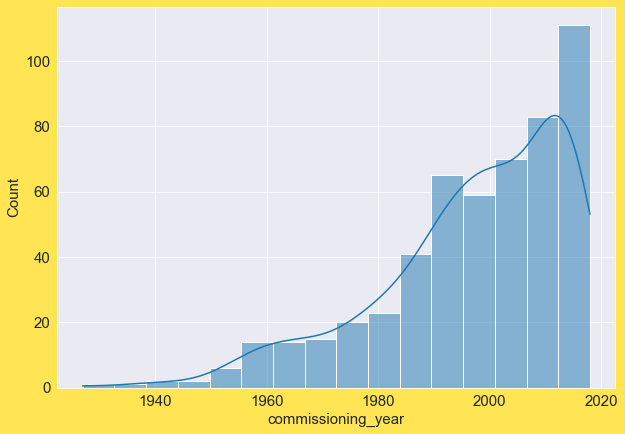

In [353]:
sns.histplot(power_df['commissioning_year'],kde=True)

In [354]:
# lets try imputing commisioning_year with median and random sampling and check the changes in the distribution

In [355]:
def impute_nan(power_df,feature,median):
    power_df[feature+'median'] = power_df[feature].fillna(median)
    power_df[feature+'random'] = power_df[feature]
    
    random_sample = power_df[feature].dropna().sample(power_df['commissioning_year'].isnull().sum(),random_state=0)
    # below here if want to merge the data the indexes have to be same so we are giving 
    random_sample.index = power_df[power_df[feature].isnull()].index
    
    power_df.loc[power_df[feature].isnull(),feature+'random'] = random_sample

In [356]:
median = power_df['commissioning_year'].median()
median   

2001.0

In [357]:
impute_nan(power_df,'commissioning_year',median)

<AxesSubplot:ylabel='Density'>

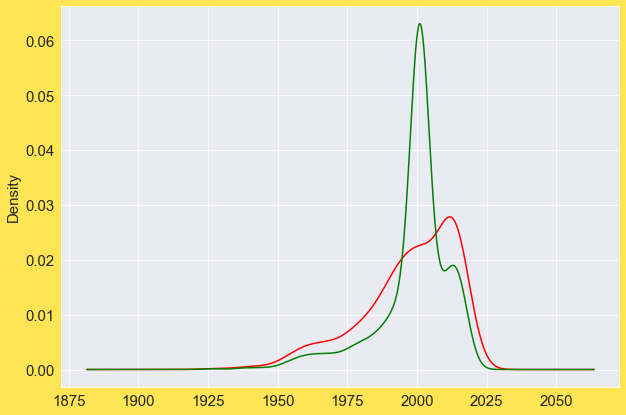

In [358]:
# Cjecking the distribution to make sure it is fitting properly
fig = plt.figure()
ax = fig.add_subplot(111)

power_df['commissioning_year'].plot(kind='kde',ax=ax,color='red')
power_df['commissioning_yearmedian'].plot(kind='kde',ax=ax,color='green')

# We can clearly see the distribution is distorting and using median will entirelychange the distribution

<AxesSubplot:ylabel='Density'>

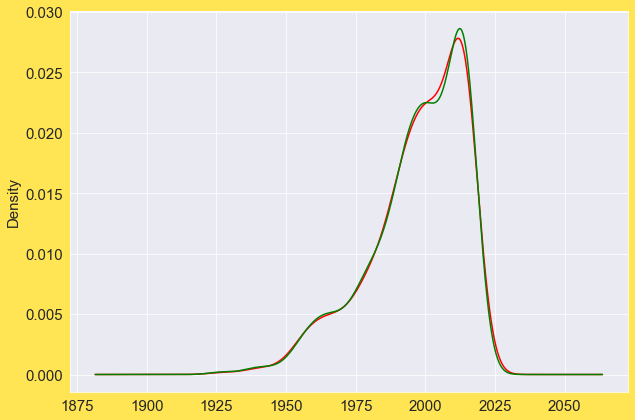

In [359]:
# Again checking the distribution if it fits for random imputation
fig = plt.figure()
ax = fig.add_subplot(111)

power_df['commissioning_year'].plot(kind='kde',ax=ax,color='red')
power_df['commissioning_yearrandom'].plot(kind='kde',ax=ax,color='green')

# We can observe the normal column and random imputed column distrinution is almost overlapping

In [360]:
# So we will select the random sampling commision_year column
power_df.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar              2011.0   
1         98.0   24.7663    74.6090         Coal                 NaN   
2         39.2   21.9038    69.3732         Wind                 NaN   
3        135.0   23.8712    91.3602          Gas              2004.0   
4       1800.0   21.9603    82.4091         Coal              2015.0   

                  owner                                source  \
0           Solar Paces  National Renewable Energy Laboratory   
1  Ultratech Cement ltd                  Ultratech Cement ltd   
2                   AES                                   CDM   
3                   NaN         Central Electricity Authority   
4                   NaN         Central Electricity Authority   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory                  NaN   
1                                   WRI                  NaN   
2                                   WRI                  NaN   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  commissioning_yearmedian  commissioning_yearrandom  
0                  NaN                    2011.0                    2011.0  
1                  NaN                    2001.0                    2001.0  
2                  NaN                    2001.0                    2017.0  
3           626.239128                    2004.0                    2004.0  
4          7279.000000                    2015.0                    2015.0

In [361]:
# dropping the unwanted median and normal column
power_df.drop(['commissioning_year','commissioning_yearmedian'],axis=1,inplace=True)

In [362]:
# changing the coulumn to integer dtype
power_df.commissioning_yearrandom = power_df.commissioning_yearrandom.astype('int64')

In [363]:
power_df.commissioning_yearrandom.head(5)
# we can see that the dtype is changed

0    2011
1    2001
2    2017
3    2004
4    2015
Name: commissioning_yearrandom, dtype: int64

In [364]:
# we have the commision year in integers now
# Using this column we can calaculate the number of years since the powerplant has been commissioned
# i.e., we can calaculate the age of powerplant by subtracting it with the current year 2022
power_df['Plant_Age'] = 2022 - power_df['commissioning_yearrandom']

In [365]:
# No we no longer need the commission column
power_df.drop(['commissioning_yearrandom'],axis=1,inplace=True)

In [366]:
for i in power_df.columns:
    print('% of null values in',i,': ',power_df[i].isnull().sum()/907*100)
   

% of null values in capacity_mw :  0.0
% of null values in latitude :  0.0
% of null values in longitude :  0.0
% of null values in primary_fuel :  0.0
% of null values in owner :  62.29327453142227
% of null values in source :  0.0
% of null values in geolocation_source :  0.0
% of null values in generation_gwh_2014 :  56.119073869900774
% of null values in generation_gwh_2015 :  53.47298787210585
% of null values in generation_gwh_2016 :  52.149944873208376
% of null values in generation_gwh_2017 :  51.48842337375965
% of null values in generation_gwh_2018 :  50.60639470782801
% of null values in Plant_Age :  0.0


In [367]:
power_df.head()

capacity_mw  latitude  longitude primary_fuel                 owner  \
0          2.5   28.1839    73.2407        Solar           Solar Paces   
1         98.0   24.7663    74.6090         Coal  Ultratech Cement ltd   
2         39.2   21.9038    69.3732         Wind                   AES   
3        135.0   23.8712    91.3602          Gas                   NaN   
4       1800.0   21.9603    82.4091         Coal                   NaN   

                                 source                    geolocation_source  \
0  National Renewable Energy Laboratory  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd                                   WRI   
2                                   CDM                                   WRI   
3         Central Electricity Authority                                   WRI   
4         Central Electricity Authority                                   WRI   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           617.789264              843.747           886.004428   
4          3035.550000             5916.370          6243.000000   

   generation_gwh_2017  generation_gwh_2018  Plant_Age  
0                  NaN                  NaN         11  
1                  NaN                  NaN         21  
2                  NaN                  NaN          5  
3           663.774500           626.239128         18  
4          5385.579736          7279.000000          7

In [368]:
own_source = power_df.iloc[:,4:6]
own_source.head(20)

owner                                source
0            Solar Paces  National Renewable Energy Laboratory
1   Ultratech Cement ltd                  Ultratech Cement ltd
2                    AES                                   CDM
3                    NaN         Central Electricity Authority
4                    NaN         Central Electricity Authority
5                    NaN         Central Electricity Authority
6                    NaN         Central Electricity Authority
7                    NaN         Central Electricity Authority
8                    NaN         Central Electricity Authority
9                    NaN         Central Electricity Authority
10                   NaN         Central Electricity Authority
11                   NaN         Central Electricity Authority
12                   NaN         Central Electricity Authority
13                   NaN         Central Electricity Authority
14                   NaN         Central Electricity Authority
15                   NaN         Central Electricity Authority
16                   NaN         Central Electricity Authority
17      Hindustan Pvt lt                      Hindustan Pvt lt
18                   NaN         Central Electricity Authority
19            Dr Ssk ltd                            Dr Ssk ltd

WE CAN OBSERVE THAT THE MISSING VALUES IN THE OWNER BELONGS TO THE SOUCE CENTRAL AUTHORITY, BECAUSE MISSING VALUES ARE ONLY PRESENT IN OWNER
WHERE ITS SOURCE IS CENTRAL AUTHORITY.

HOWEVER we don't need the owner column beacause it is the exact replica of the source column, only missing values are there for central electric authority

So we can drop the owner column as well.

In [369]:
power_df.drop(['owner','source'],axis=1,inplace=True)

In [370]:
# analysing the missing values in generation_gwh columns
gen_gwh = power_df.iloc[:,6:11] # using index location
gen_gwh.head(20)

# We can see that the values are missing completely at random

generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN                  NaN   
3            843.747000           886.004428           663.774500   
4           5916.370000          6243.000000          5385.579736   
5           1208.852000          1175.765000          1147.913000   
6            152.195200            61.421350            89.629600   
7            721.335200           675.724400           679.594950   
8            144.434200           402.029750           439.372100   
9           1643.046000          1338.093000          1563.457000   
10          5629.663000          1701.008000          4350.558000   
11           665.197300           670.500650           644.570950   
12          8076.810500          7902.021600          7940.740000   
13                  NaN                  NaN                  NaN   
14                  NaN                  NaN                  NaN   
15         11151.069472         13227.352350         15334.876300   
16           909.000000           666.420000           430.000000   
17                  NaN                  NaN                  NaN   
18          2702.823200          3515.749600          5777.120000   
19                  NaN                  NaN                  NaN   

    generation_gwh_2018  Plant_Age  
0                   NaN         11  
1                   NaN         21  
2                   NaN          5  
3            626.239128         18  
4           7279.000000          7  
5            976.655000         17  
6             48.327150         52  
7            579.318850         12  
8            406.377900         18  
9           1487.880000         14  
10          3717.154000          8  
11           425.641100         37  
12          7873.973000         11  
13                  NaN         36  
14                  NaN         35  
15         18697.655900         22  
16           528.280000         33  
17                  NaN         20  
18          6241.801000          7  
19                  NaN          5

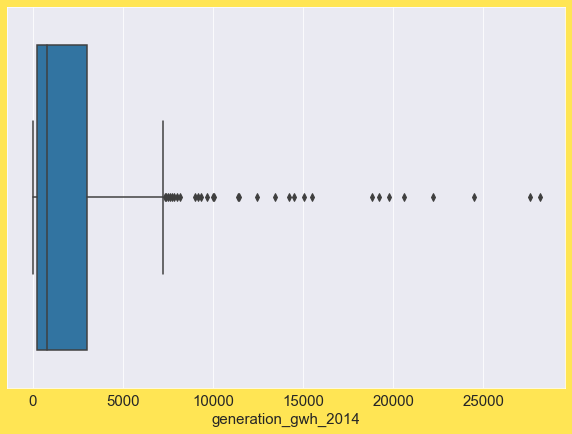

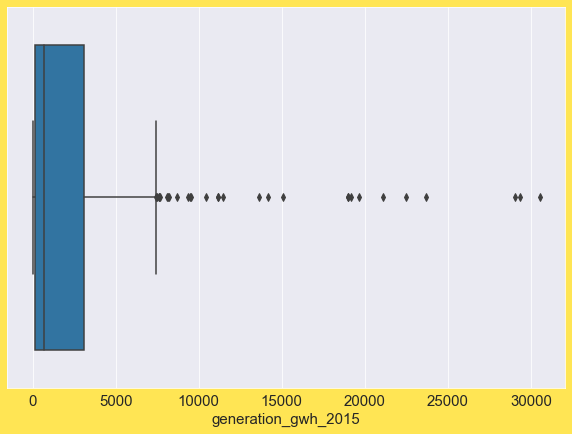

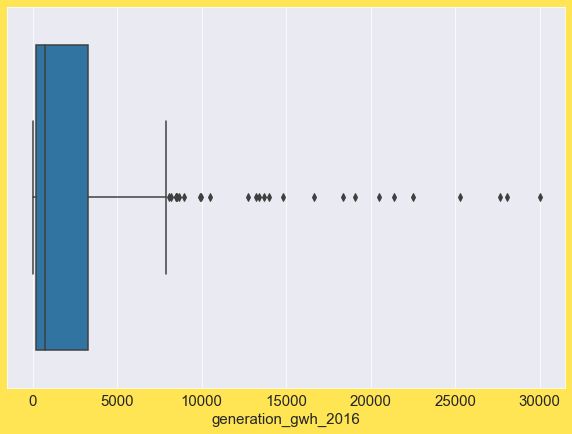

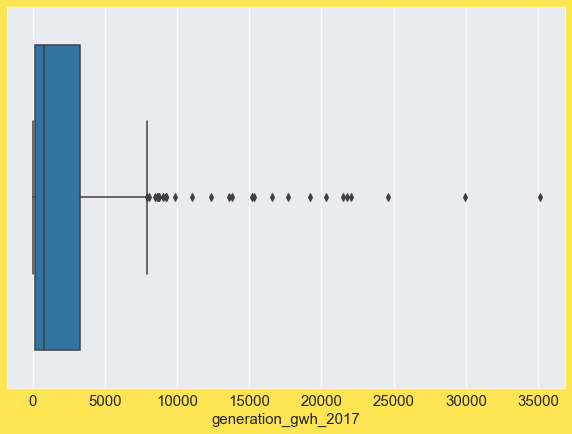

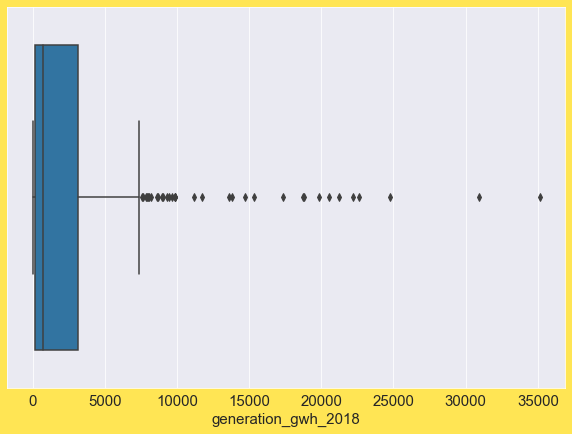

In [371]:
gen_null_values = power_df[["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018"]]
for i in gen_null_values.columns:
    sns.boxplot(power_df[i])
    plt.show()
    


In [372]:
# we can see that these columns are skewed and have many outlier
# it is better if we would replace the nan values with its median

In [373]:
# replcing the values with null values with the median of the colums
power_df["generation_gwh_2014"] = power_df["generation_gwh_2014"].fillna(power_df["generation_gwh_2014"].median())
power_df["generation_gwh_2015"] = power_df["generation_gwh_2015"].fillna(power_df["generation_gwh_2015"].median())
power_df["generation_gwh_2016"] = power_df["generation_gwh_2016"].fillna(power_df["generation_gwh_2016"].median())
power_df["generation_gwh_2017"] = power_df["generation_gwh_2017"].fillna(power_df["generation_gwh_2017"].median())
power_df["generation_gwh_2018"] = power_df["generation_gwh_2018"].fillna(power_df["generation_gwh_2018"].median())

In [374]:
# checking the nullvalues again
power_df.isnull().sum()

# We can see that we have dealt with all the nullvalues

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Plant_Age              0
dtype: int64

In [76]:
# DEscriptive stats
power_df.describe().T

# Oldest plant is 95 years and the newer one is just 4 years 
# The columns have many outliers and is skewed
# there is a huge difference in 75th percentile and max value

count         mean          std      min         25%  \
capacity_mw          907.0   326.223755   590.085456   0.0000   16.725000   
latitude             907.0    21.197918     6.079148   8.1689   17.072000   
longitude            907.0    77.464907     4.812291  68.6447   74.388900   
generation_gwh_2014  907.0  1516.689956  2785.604307   0.0000  801.123775   
generation_gwh_2015  907.0  1510.071296  2984.994556   0.0000  711.181225   
generation_gwh_2016  907.0  1565.361383  3005.087210   0.0000  737.205450   
generation_gwh_2017  907.0  1657.121797  3046.862910   0.0000  817.977250   
generation_gwh_2018  907.0  1665.011030  3168.826750   0.0000  751.644375   
Plant_Age            907.0    25.035281    17.216735   4.0000   10.000000   

                            50%         75%        max  
capacity_mw           59.200000  385.250000   4760.000  
latitude              21.281800   25.176450     34.649  
longitude             76.979200   79.206100     95.408  
generation_gwh_2014  801.123775  801.123775  28127.000  
generation_gwh_2015  711.181225  711.181225  30539.000  
generation_gwh_2016  737.205450  737.205450  30015.000  
generation_gwh_2017  817.977250  817.977250  35116.000  
generation_gwh_2018  751.644375  751.644375  35136.000  
Plant_Age             22.000000   34.000000     95.000

In [77]:
power_df.describe(include='O').T

count unique   top freq
primary_fuel         907      8  Coal  258
geolocation_source   907      3   WRI  784

In [78]:
# checking duplicates if any
duplicates = power_df[power_df.duplicated()]
duplicates

# There are no duplicates in any column

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Plant_Age]
Index: []

In [79]:
# checking the blank values if any
for i in power_df.columns:
    print(power_df.loc[power_df[i] == " "])
    
# We can observe there are no blank values in the dataframe

Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Plant_Age]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Plant_Age]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Plant_Age]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, geolocation_source, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, Plant_Age]
Index: []
Empty DataFrame
Columns: [capacity_mw, latitude, longitude, primary_fuel, geolocation_source, generation_gwh_2014, gener

In [80]:
power_df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
Plant_Age                int64
dtype: object

### Univariate Analysis

In [81]:
# categorical features
cat_cols = power_df.dtypes[power_df.dtypes == 'object'].index.tolist()
cat_cols

['primary_fuel', 'geolocation_source']

In [82]:
# continuous
cont_cols = power_df.dtypes[power_df.dtypes != 'object'].index.tolist()
cont_cols

['capacity_mw',
 'latitude',
 'longitude',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'Plant_Age']

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


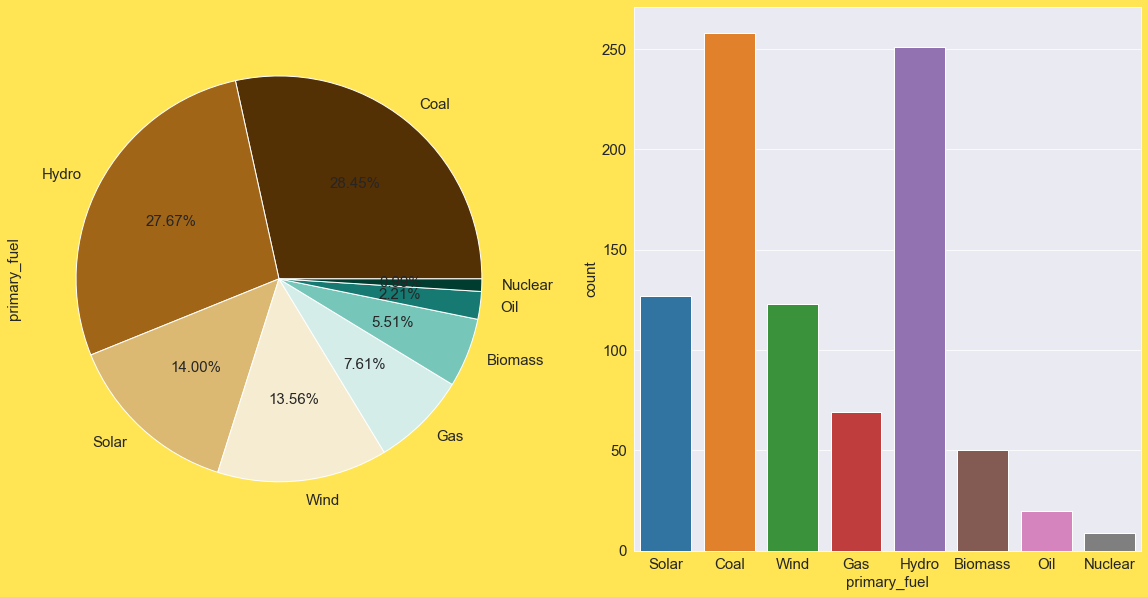

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


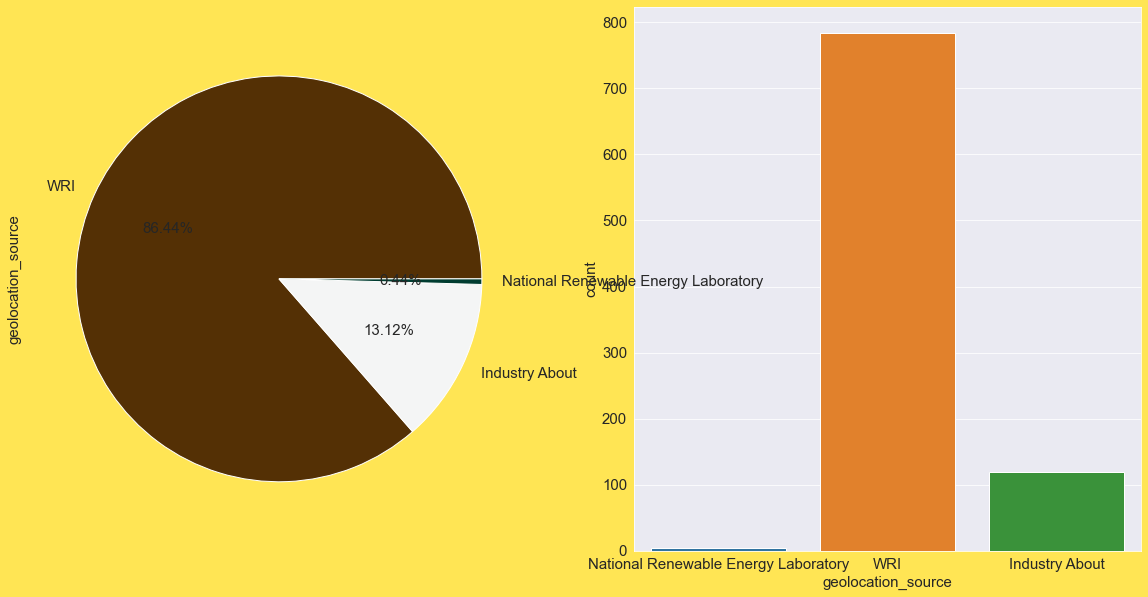

In [83]:
# plotting a bar plot and countplot to look at the catgeories
for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(i,data=power_df)
    plt.subplot(1,2,1)
    power_df[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(power_df[i].value_counts())
    plt.show()


Coal and Hydrofuel are most primarly used fuels, whereas Nuclear is the least used fuel.

We can most number of powerplants are Central Electricity Authority which means handled by governent of India.

geolocation souce mostly has WRI and least reliable on National Renewable Energy.

We can also observe one of our  target variable primary_fuel is imbalanced, We have to take care of it in the further process.

### Bivariate Analysis

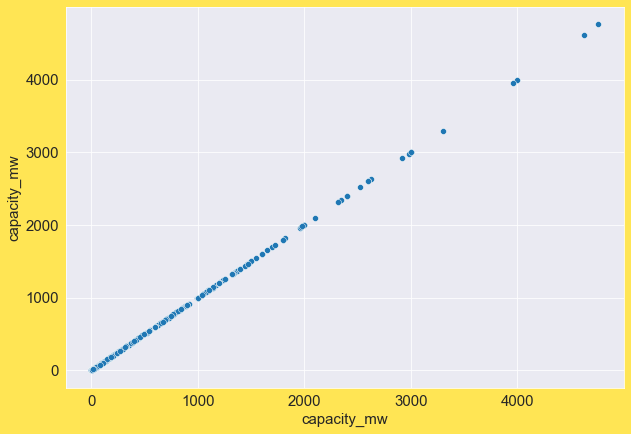

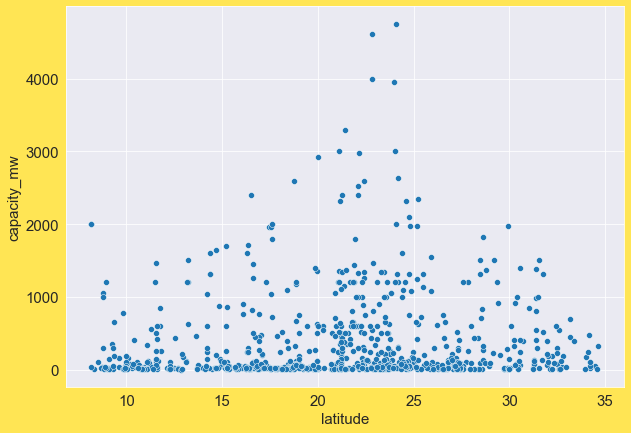

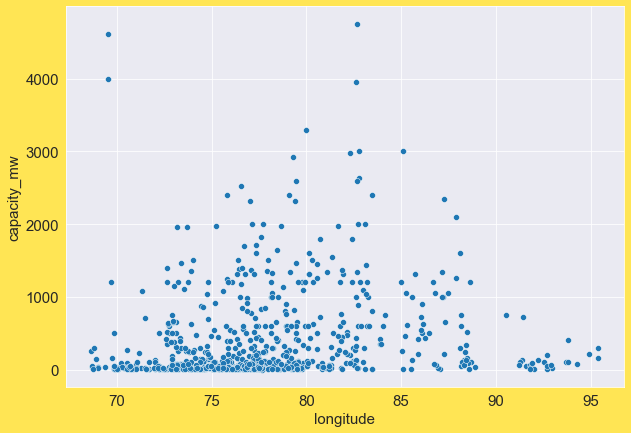

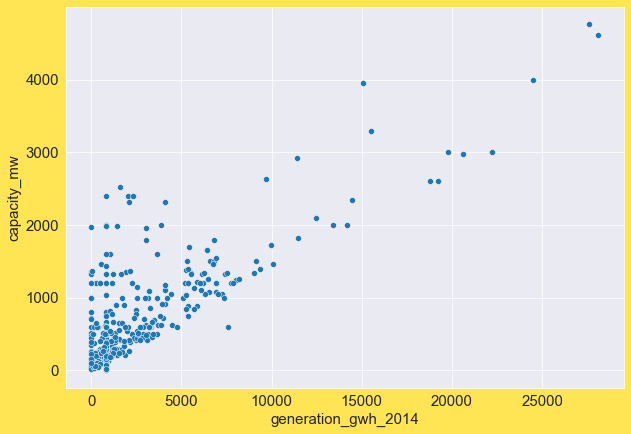

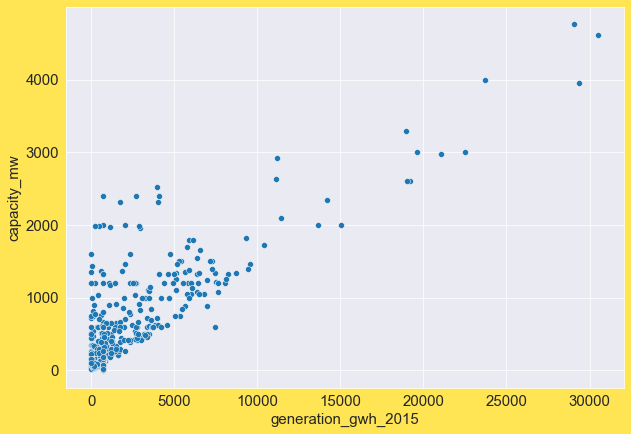

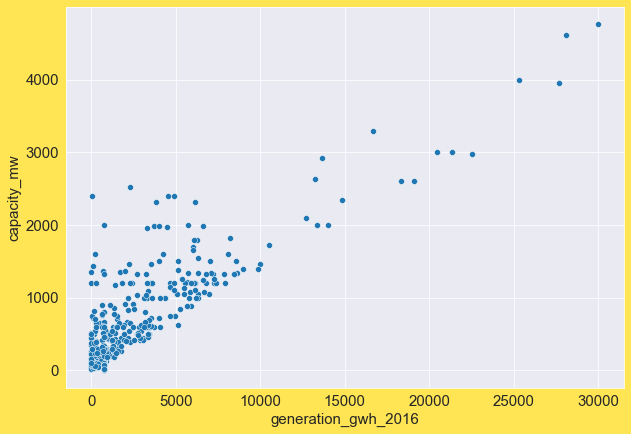

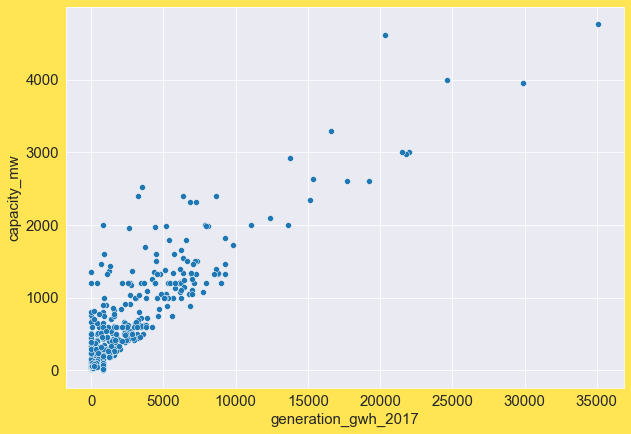

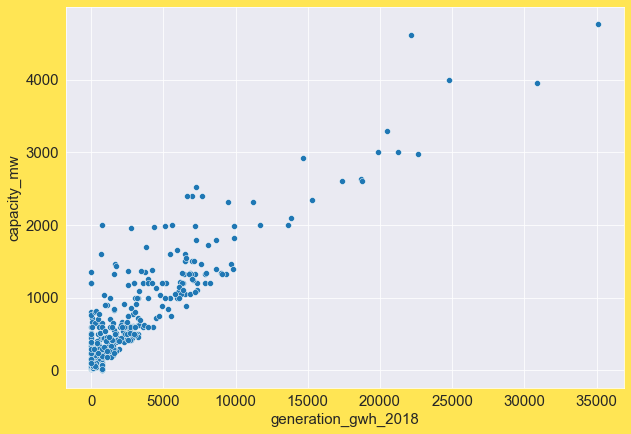

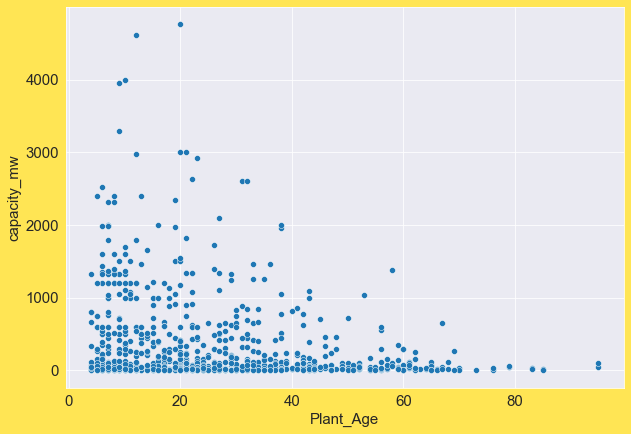

In [84]:
# plotting to see the distribution of each continuous variable with respect to one of the predictor capacity_mw
for i in cont_cols:
    sns.scatterplot(x=i,y='capacity_mw',data=power_df)
    plt.show()

We can observe:-
    
lattitude and longitude have same relationship with the capacity feature ALthoght it doesn't really give any valuable insights

All the years of generation_gwh shows positive relationship with the target capacity_mw

Interesting we can observe as the plants age increases its capacity decreases, And Although there isn't a significant amount of change in capacity with respect to the 
age of the plant. 

We can say the powerplants which are less than 20 years old are having high capacity_mw

### Multivariate Analysis

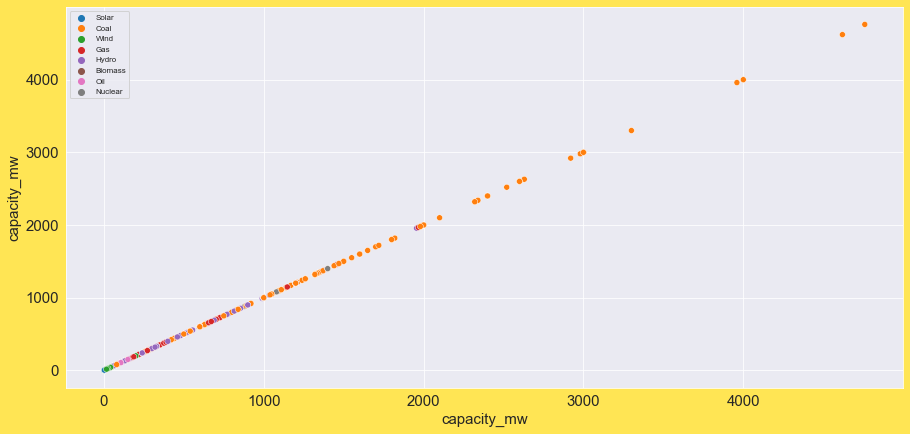

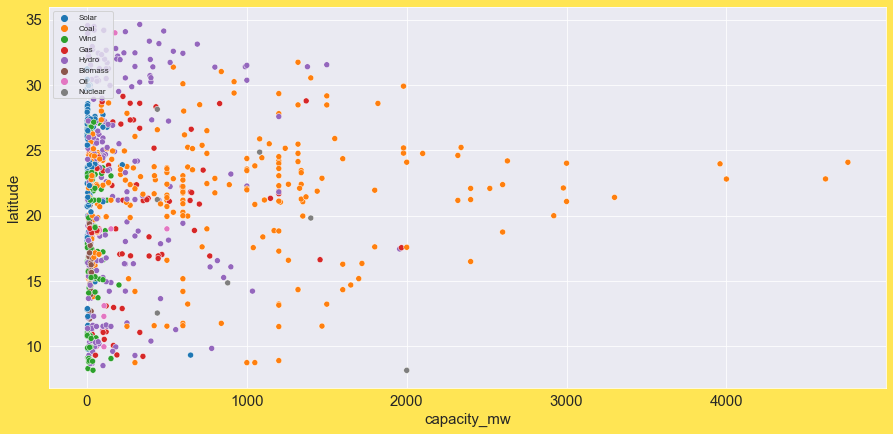

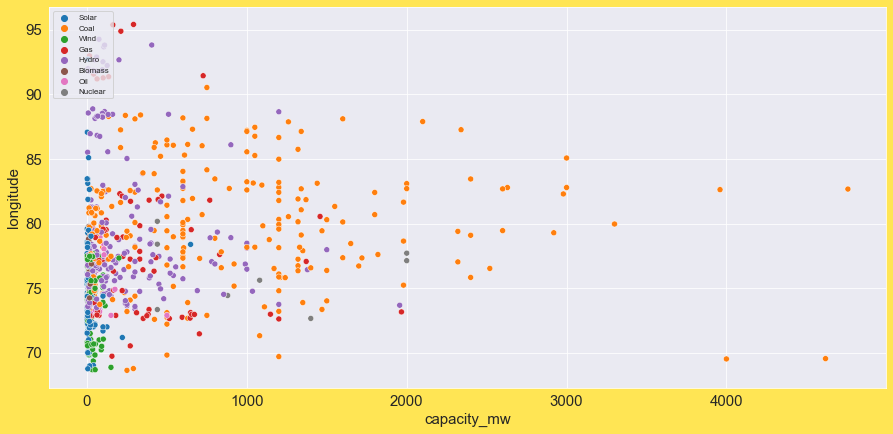

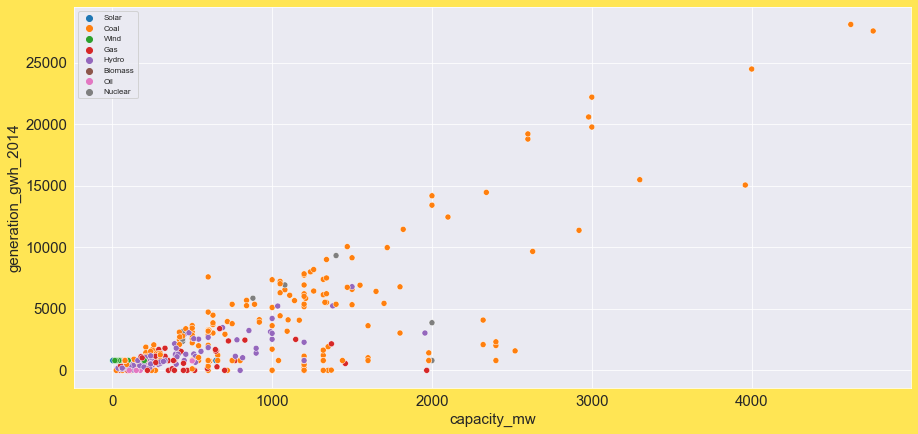

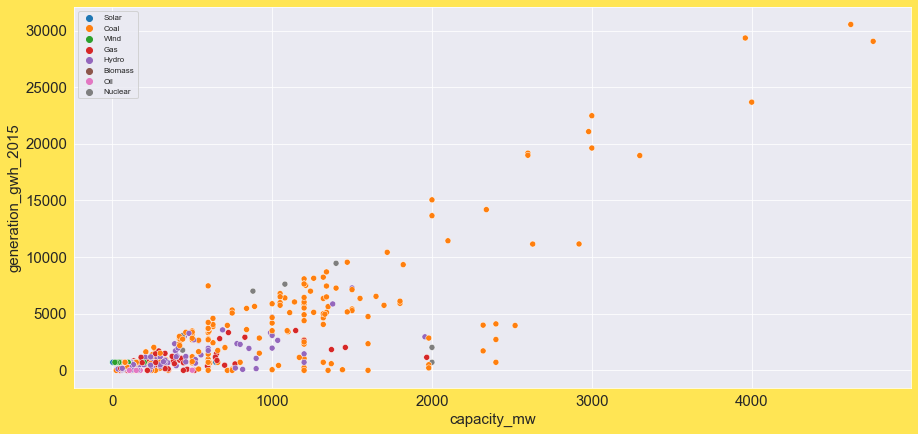

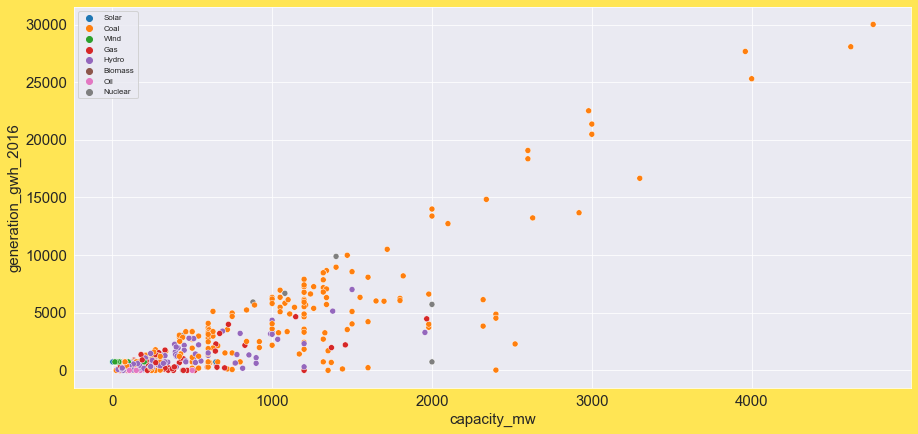

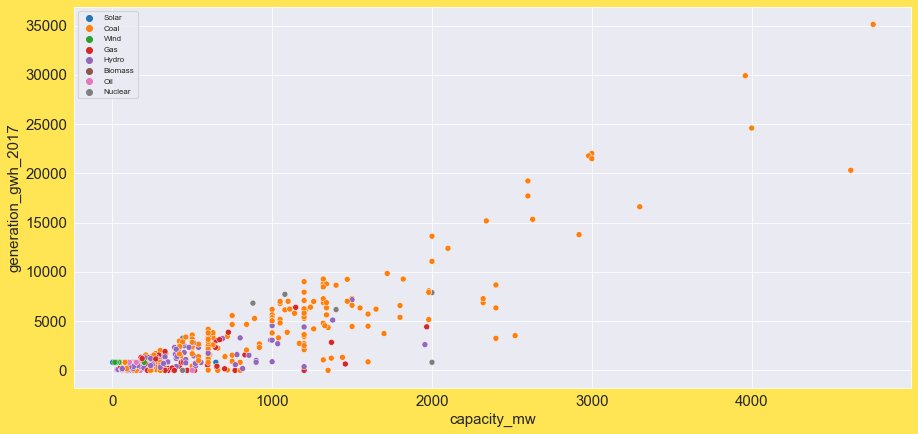

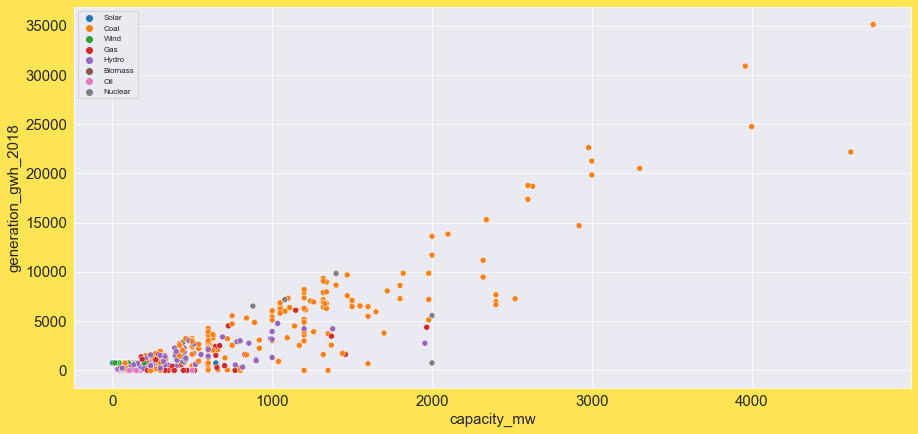

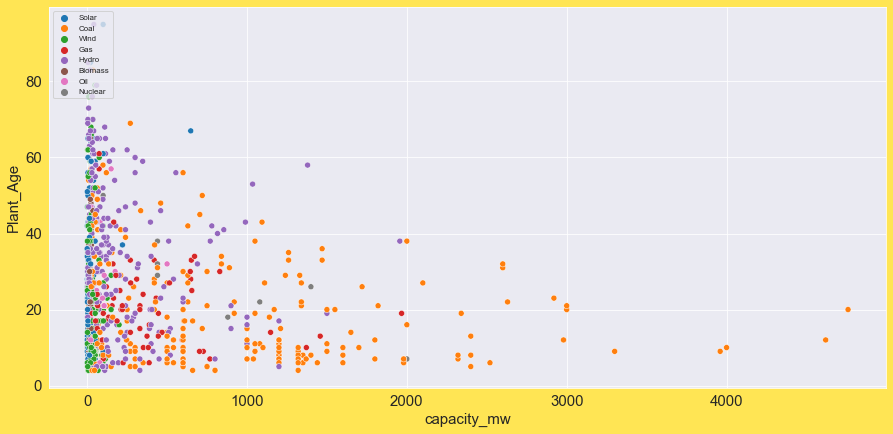

In [85]:
for i in cont_cols:
    plt.rcParams['figure.figsize'] = (15,7)
    sns.scatterplot(x = power_df['capacity_mw'],y =power_df[i],hue = power_df['primary_fuel'])

    plt.legend(loc = 'upper left',fontsize = 8)
    plt.xlabel('capacity_mw')
    plt.ylabel(i)
    plt.show()

Observations:-
    
Higher lattitude and longitude locations have higher coal capacity_mw

COAL has more capacity_mw than any other primary fuels

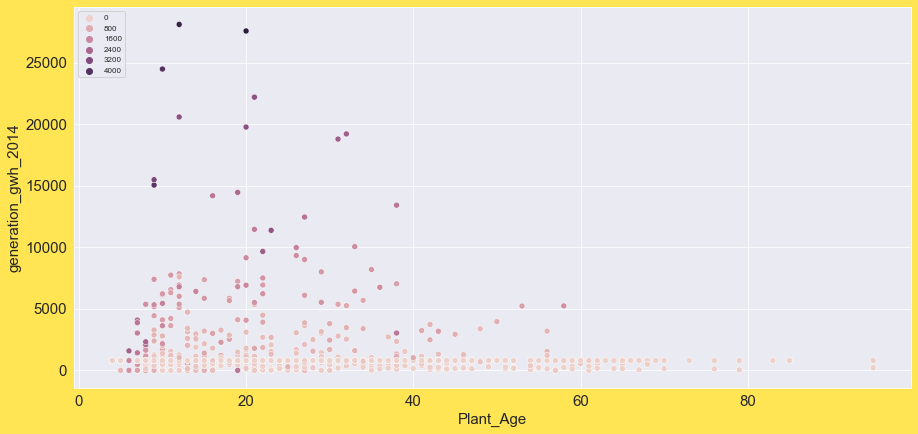

In [86]:
# checking the relation with the geneartion year and age of plant
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = power_df['Plant_Age'],y =power_df['generation_gwh_2014'],hue = power_df['capacity_mw'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Plant_Age')
plt.ylabel('generation_gwh_2014')
plt.show()

# We can say when the age of the powerplant is more the generation will be less

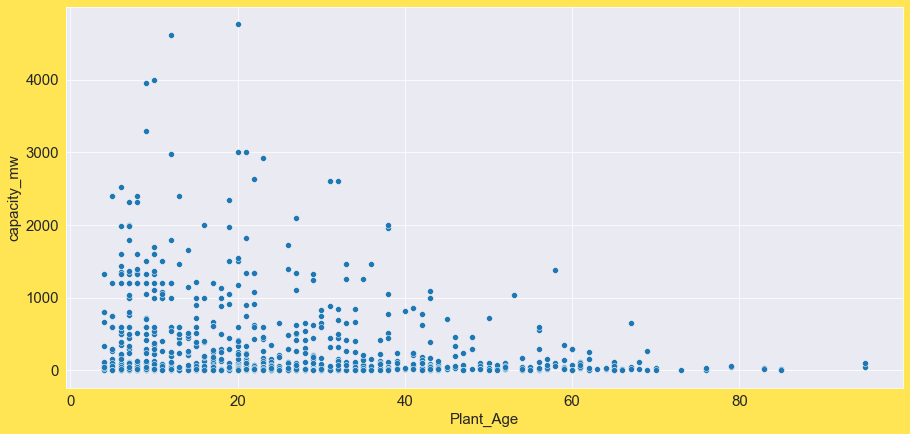

In [87]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = power_df['Plant_Age'],y = power_df['capacity_mw'])
plt.xlabel('Plant_Age')
plt.ylabel('capacity_mw')
plt.show()

# We can say capacity decreases with increase in the age of powerplant

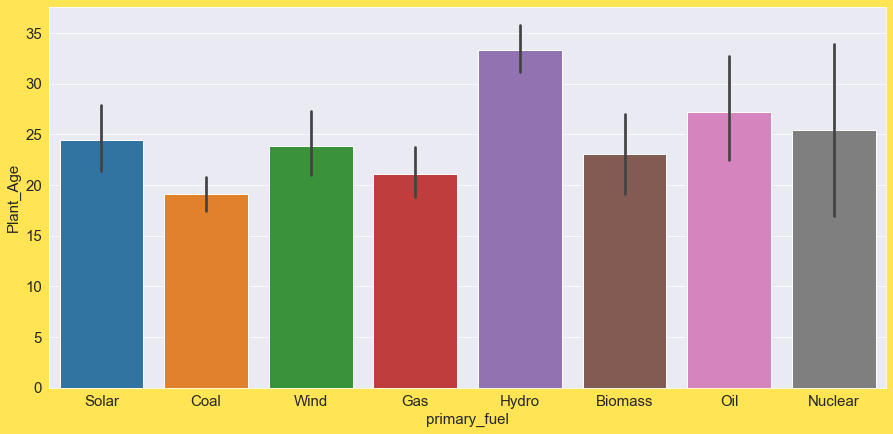

In [88]:
#Comparision between features using bar plot
sns.barplot(x = "primary_fuel", y = "Plant_Age", data = power_df)
plt.show()

# We can observe that the older plants uses Hydro, Nuclear, Oil as fuels.
# And the newer ones use Solar, Coal, Wind, Gas and Biomass as fuels.

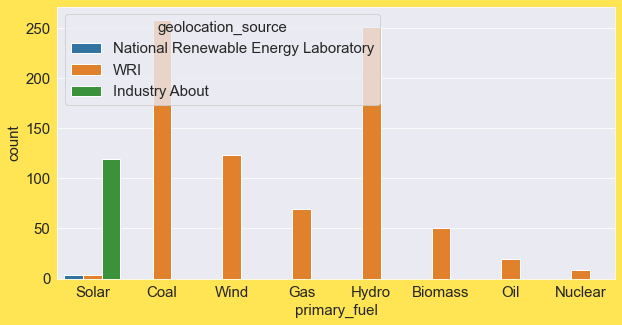

In [89]:
plt.figure(figsize = (10,5))
sns.countplot(x = "primary_fuel", hue = "geolocation_source", data = power_df)
plt.show()

# We can see that the Solar fuel has 3 types of sorces,However all other has WRI as geolocation_source.

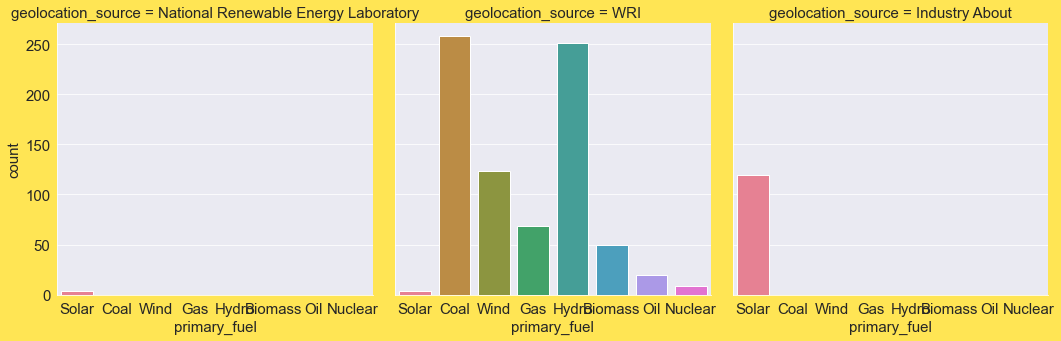

In [90]:
sns.catplot(x='primary_fuel',col='geolocation_source',data=power_df,kind='count',palette="husl")

# We can observe WRI has all the types of fuels used bur Industry About and National Renewable Energy Laboratory has only solar as fuel.

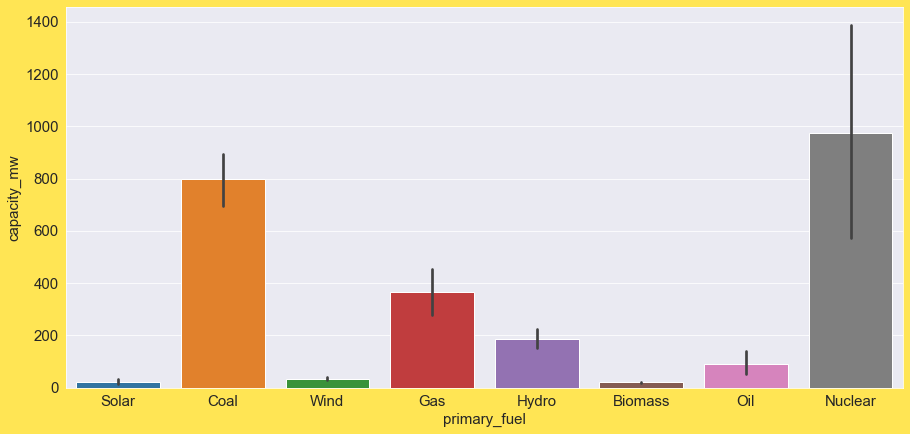

In [91]:
sns.barplot(x ='primary_fuel',y='capacity_mw',data =power_df)
plt.show()

# We can see The plant which uses Nuclear and Coal as fuel has more capacity than other plants uses other fuels.
# So to increase the power generation it is good to use Nuclear or Coal fuel.

In [92]:
power_df.head()

capacity_mw  latitude  longitude primary_fuel  \
0          2.5   28.1839    73.2407        Solar   
1         98.0   24.7663    74.6090         Coal   
2         39.2   21.9038    69.3732         Wind   
3        135.0   23.8712    91.3602          Gas   
4       1800.0   21.9603    82.4091         Coal   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory           801.123775   
1                                   WRI           801.123775   
2                                   WRI           801.123775   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  Plant_Age  
0           751.644375         11  
1           751.644375         21  
2           751.644375          5  
3           626.239128         18  
4          7279.000000          7

In [93]:
# using group by finding the percentage of capacity_mw in each colums
power_df.groupby('primary_fuel')['capacity_mw'].mean()*100

# Nuclear fuel is by far the highest capaacity_mw contributer
# And biomass being the least

primary_fuel
Biomass     2006.520000
Coal       79782.643411
Gas        36481.892754
Hydro      18502.697211
Nuclear    97555.555556
Oil         8894.200000
Solar       2171.259843
Wind        3342.967480
Name: capacity_mw, dtype: float64

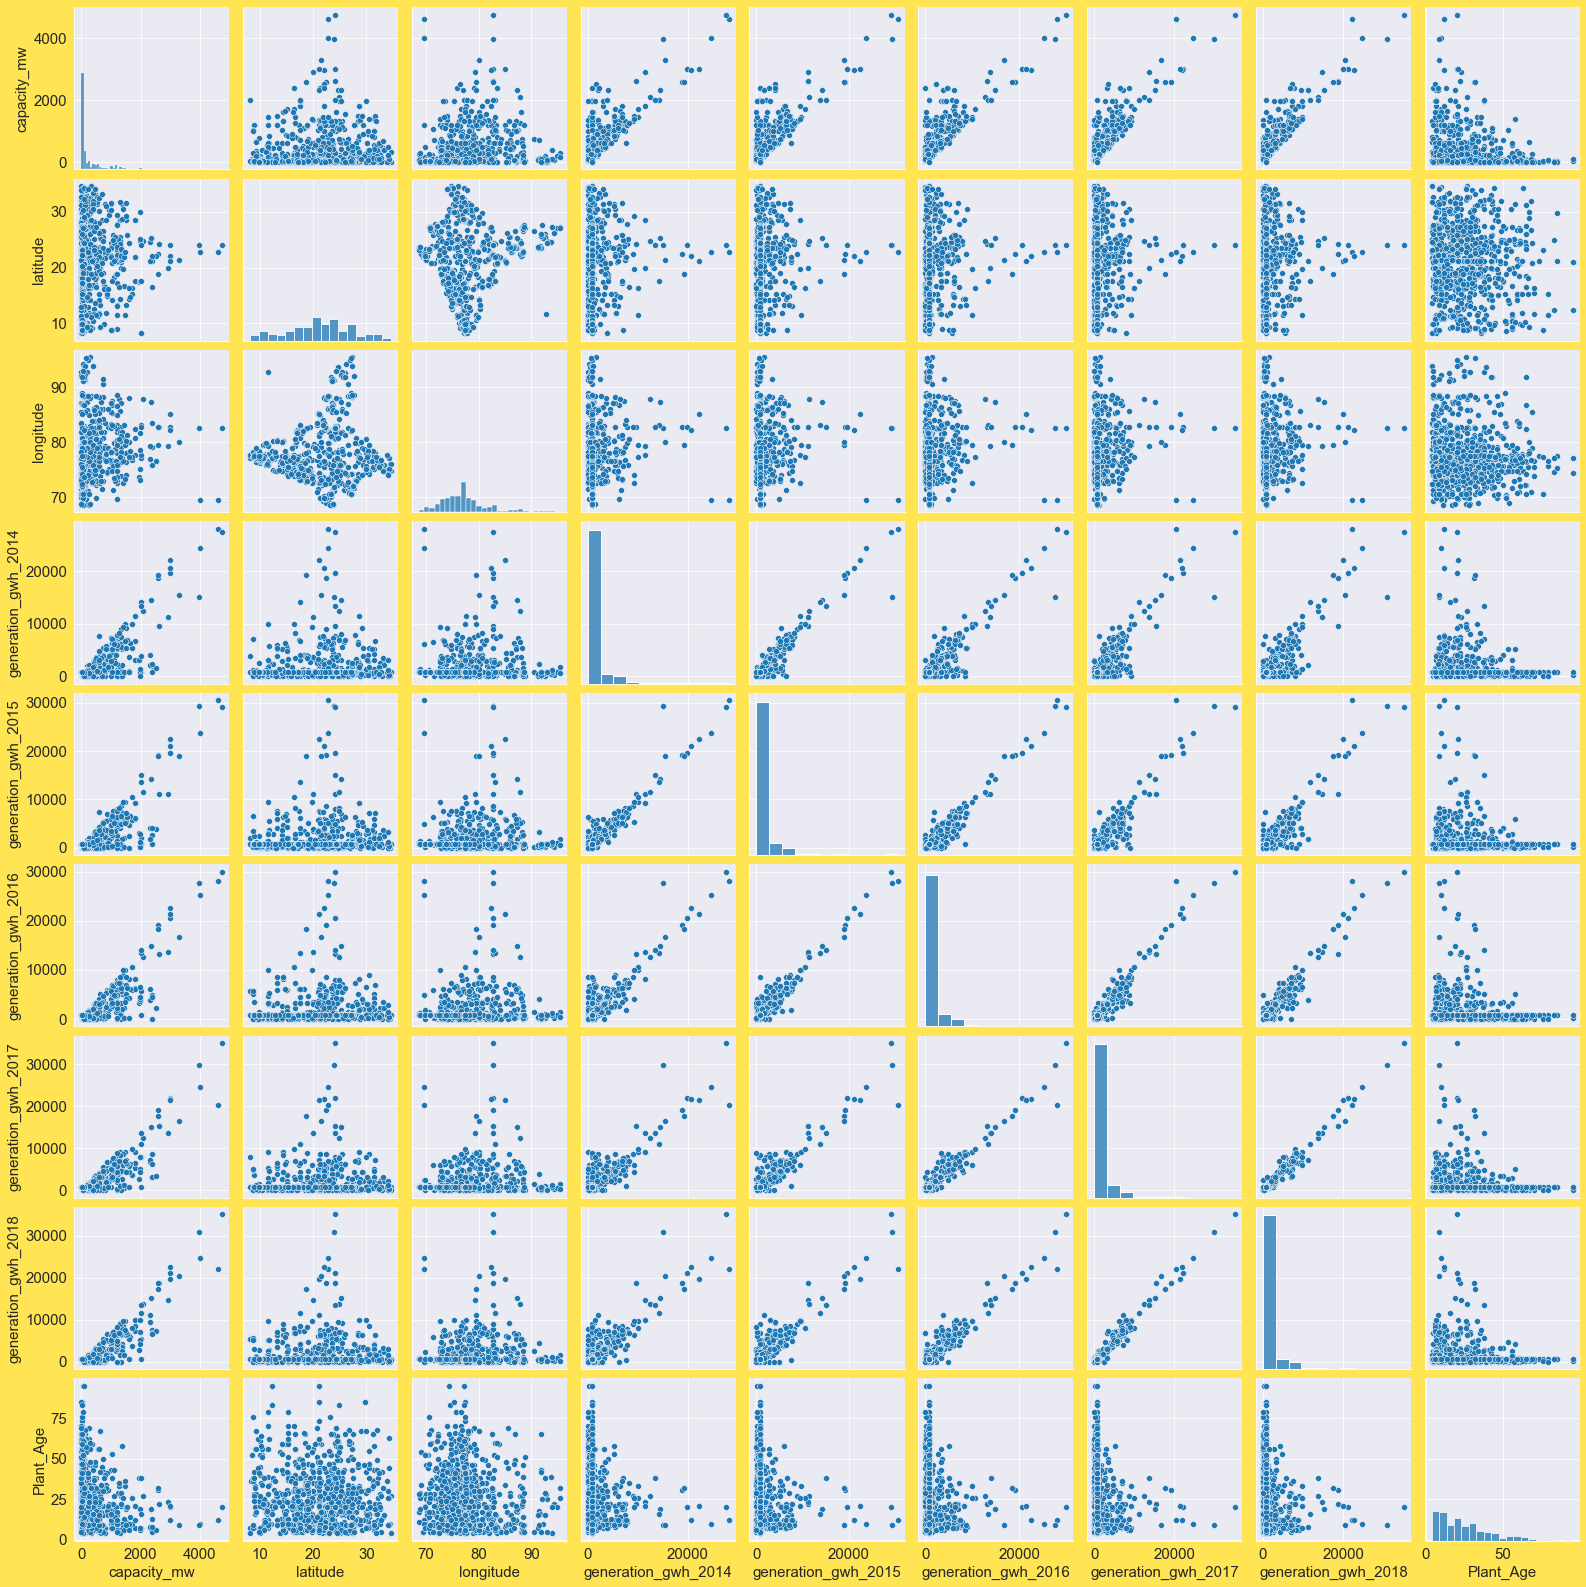

In [94]:
# plotting a pair plot
#pair ploting for df
sns.pairplot(power_df)

# We can observe there are alot of outliers and data is highly skewed

### Encoding the categorical variables

In [95]:
# encoding the target primary_fuel using labelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
power_df['primary_fuel']= le.fit_transform(power_df['primary_fuel'])

In [96]:
# Now we have to encode geolocation using onehot encoder 
# Because it is a nomial data which doesn't follow any order
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # We are dropping one dummy column from each encoded feature to avoid multicollinearity

df_object = power_df.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(['geolocation_source'])

power_df= pd.concat([power_df.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

### CHECKING AND TREATING OUTLIERS

<AxesSubplot:>

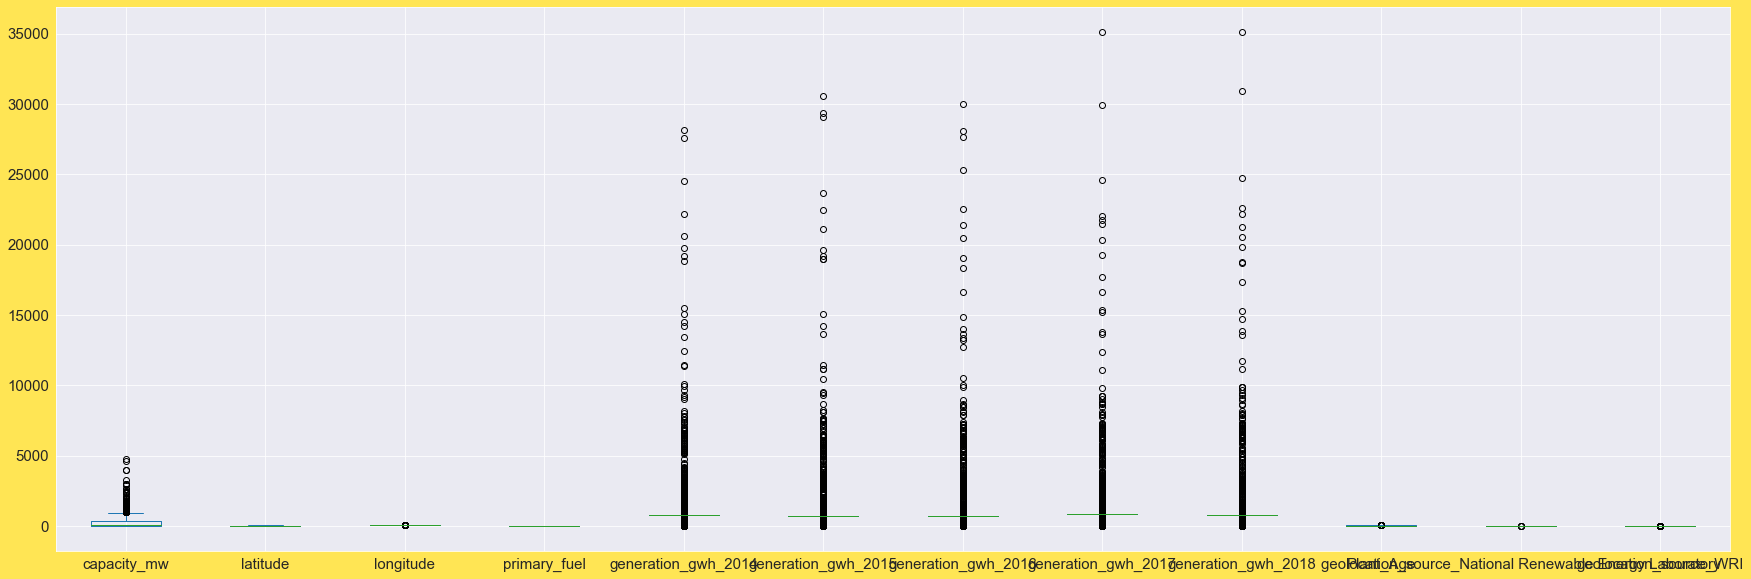

In [97]:
power_df.plot(kind='box',figsize=(30,10))
# We can see there are many outliers in generation c_gwh columns

In [98]:
power_df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'Plant_Age',
       'geolocation_source_National Renewable Energy Laboratory',
       'geolocation_source_WRI'],
      dtype='object')

In [99]:
# We are going to predict the primary_fuel first
# So duplicating the df 
fuel_df = power_df.copy()

In [100]:
fuel_df.head()

capacity_mw  latitude  longitude  primary_fuel  generation_gwh_2014  \
0          2.5   28.1839    73.2407             6           801.123775   
1         98.0   24.7663    74.6090             1           801.123775   
2         39.2   21.9038    69.3732             7           801.123775   
3        135.0   23.8712    91.3602             2           617.789264   
4       1800.0   21.9603    82.4091             1          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  Plant_Age  \
0           751.644375         11   
1           751.644375         21   
2           751.644375          5   
3           626.239128         18   
4          7279.000000          7   

   geolocation_source_National Renewable Energy Laboratory  \
0                                                  1         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   geolocation_source_WRI  
0                       0  
1                       1  
2                       1  
3                       1  
4                       1

In [101]:
# outliers column
out_cols = fuel_df[['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'Plant_Age']]

In [102]:
from scipy.stats import zscore

z=np.abs(zscore(out_cols))

print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 138, 143, 143, 143, 143, 143, 143, 147,
       158, 179, 183, 209, 209, 209, 209, 209, 209, 244, 269, 308, 308,
       308, 308, 308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364,
       364, 364, 375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493,
       494, 494, 494, 494, 494, 494, 499, 509, 519, 532, 538, 546, 577,
       601, 623, 638, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 657, 695, 695, 695, 695, 695, 695, 709, 721, 721, 721, 721,
       721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 726, 728,
       754, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808,
       808, 808, 818, 847, 880, 880, 880, 880, 880, 880], dtype=int64), array([0, 4, 5, 6, 7, 8, 0, 3, 4, 5, 6, 7, 0, 3, 2, 2, 0, 3, 4, 5, 6, 7,
       2, 8, 0, 3, 4, 5, 6, 7, 2, 2, 2, 2, 0, 0, 3, 4, 5, 6, 7, 0, 2, 2,
       0, 7, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 2, 8, 2, 3, 8, 2, 2, 8,
       3, 2, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5,

In [103]:
# removing the outliers
fuel_new= fuel_df[(z<3).all(axis=1)]

In [104]:
print("shape before and after")
print("shape before: ",fuel_df.shape)
print("shape after: ",fuel_new.shape)
print("Percentage Loss: ", (fuel_df.shape[0]-fuel_new.shape[0])/fuel_df.shape[0]*100)

# The data loss is around 5.4% with the zscore method

shape before and after
shape before:  (907, 12)
shape after:  (858, 12)
Percentage Loss:  5.402425578831313


In [105]:
# Checking with IQR method as well
Q1=out_cols.quantile(0.25)
Q3=out_cols.quantile(0.75)
IQR=Q3 - Q1

fuel_new_quant = fuel_df[~((fuel_df < (Q1 - 1.5 * IQR)) |(fuel_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [106]:
print("shape before and after")
print("shape before: ",fuel_df.shape)
print("shape after: ",fuel_new_quant.shape)
print("Percentage Loss: ", (fuel_df.shape[0]-fuel_new_quant.shape[0])/fuel_df.shape[0]*100)

# We can see that the data loss is more using IQR method so we choose zscore method

shape before and after
shape before:  (907, 12)
shape after:  (441, 12)
Percentage Loss:  51.37816979051819


<AxesSubplot:>

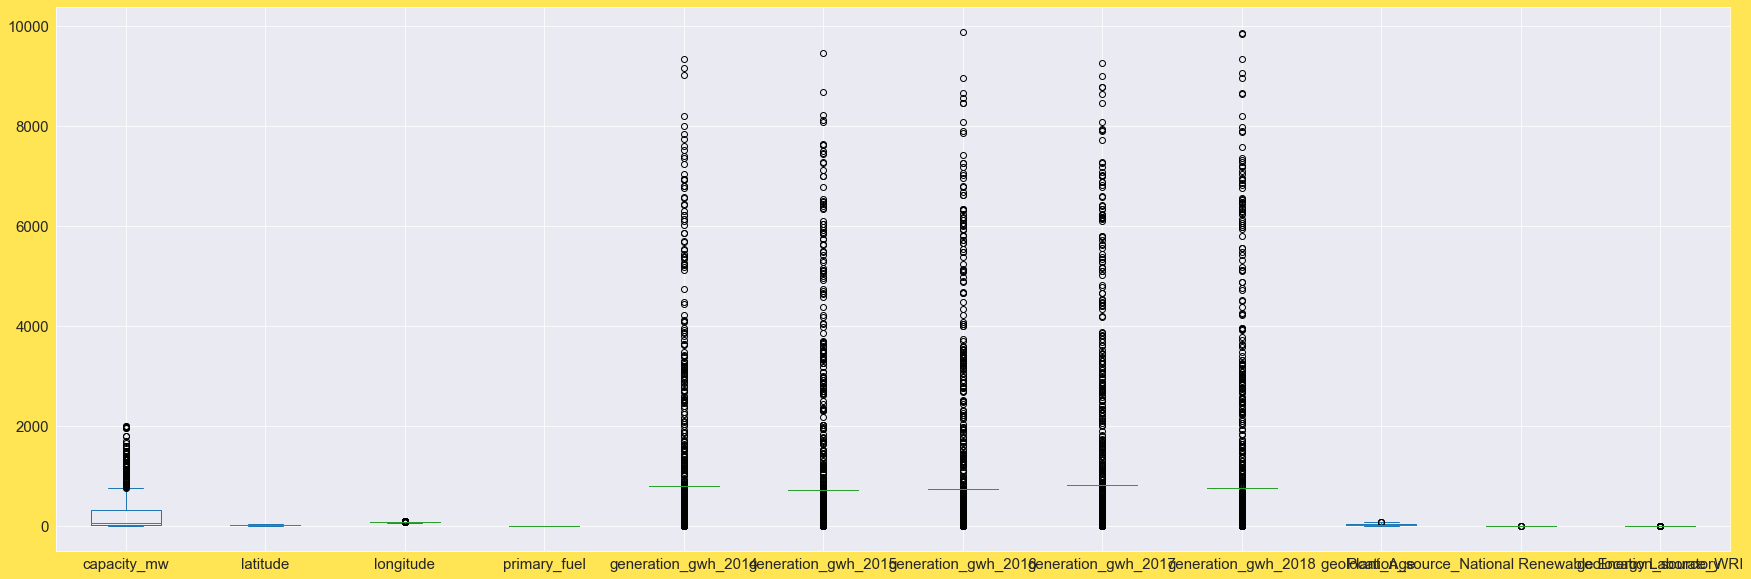

In [107]:
# Checking the outliers again
fuel_new.plot(kind='box',figsize=(30,10))

# We can see that farmost outliers have been removed
# And the continuous outliers remained which is not a problem

In [108]:
fuel_new.shape

(858, 12)

In [109]:
fuel_new.sample(2)

capacity_mw   latitude  longitude  primary_fuel  generation_gwh_2014  \
877        500.0  16.597300  80.538200             1          3429.300000   
329        195.0  21.197918  77.464907             3           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
877          2836.890000           3357.90000           2852.05000   
329           711.181225             55.80955            196.14435   

     generation_gwh_2018  Plant_Age  \
877            2953.5550         13   
329             117.6488          6   

     geolocation_source_National Renewable Energy Laboratory  \
877                                                  0         
329                                                  0         

     geolocation_source_WRI  
877                       1  
329                       1

### CHECKING AND TREATING THE SKEWNESS

In [110]:
fuel_new.skew().sort_values()

# We can observe here and in the graphs that there is high amount of skewness present

geolocation_source_WRI                                     -2.080319
latitude                                                   -0.115248
primary_fuel                                                0.421114
Plant_Age                                                   0.878311
longitude                                                   0.926851
capacity_mw                                                 2.014470
generation_gwh_2017                                         2.618834
generation_gwh_2018                                         2.685732
generation_gwh_2016                                         2.720635
generation_gwh_2015                                         2.782186
generation_gwh_2014                                         2.981477
geolocation_source_National Renewable Energy Laboratory    14.568683
dtype: float64

In [111]:
# treating the skewed columns only
# except latitude every column continuous column is skewed
skewed_cols = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Plant_Age']

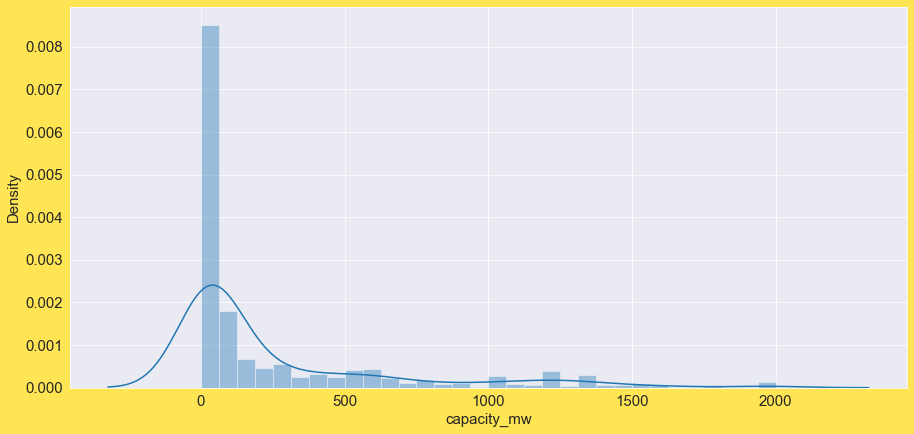

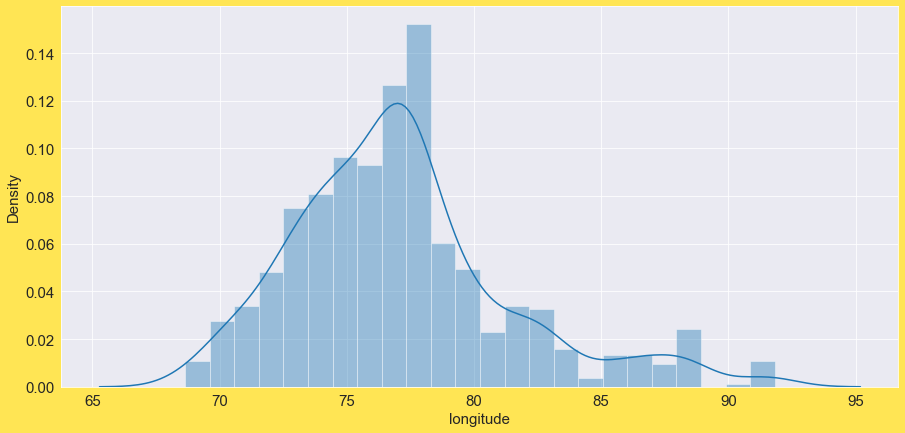

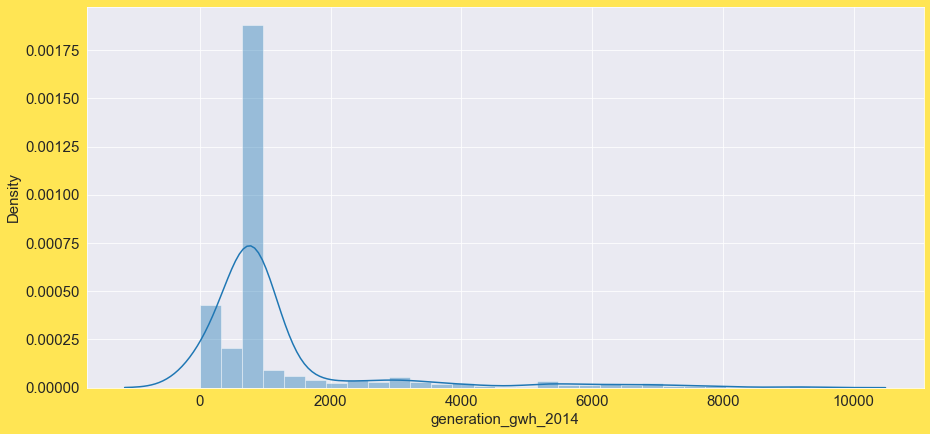

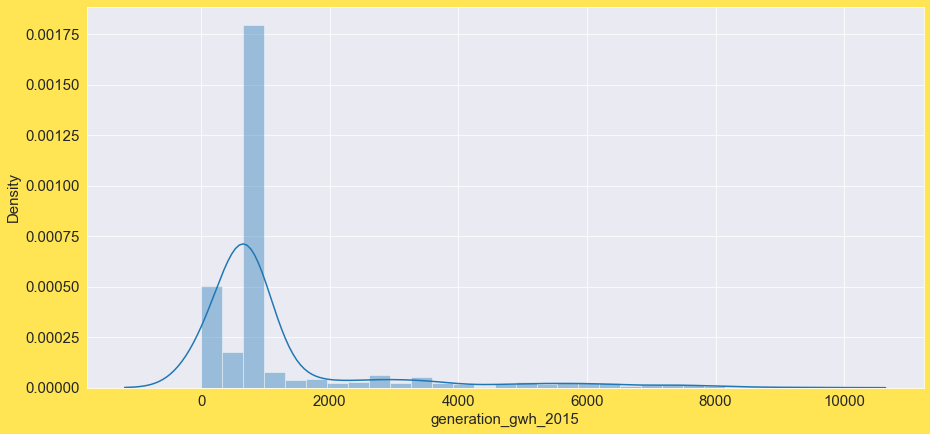

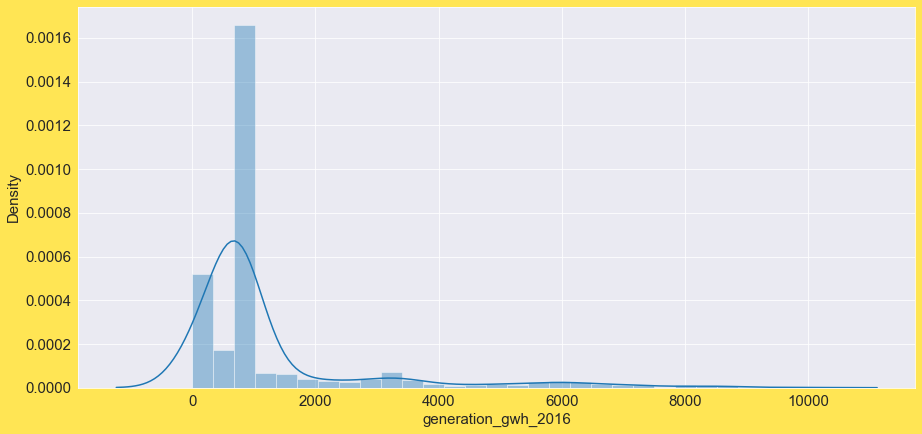

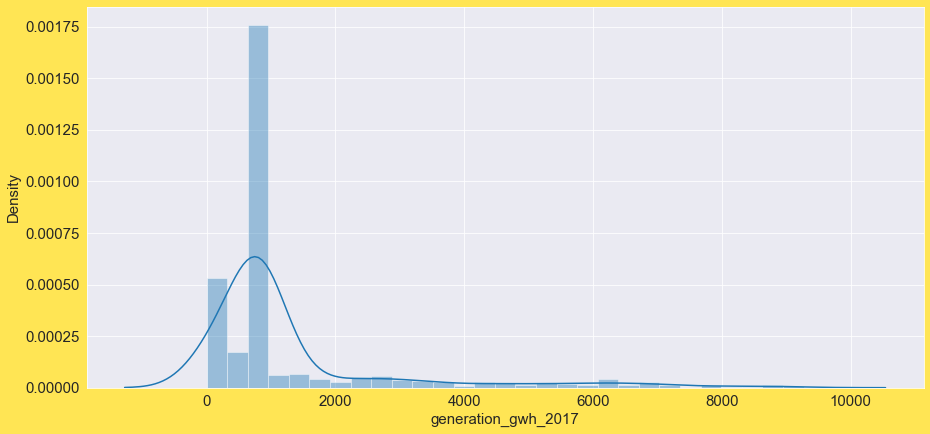

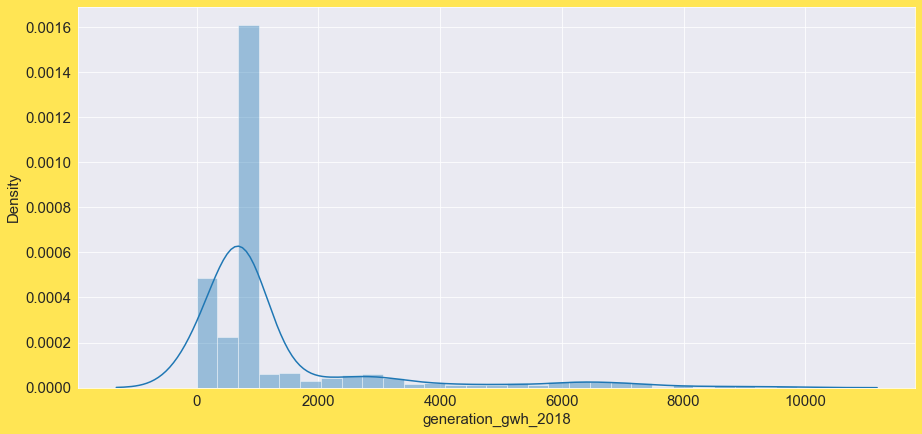

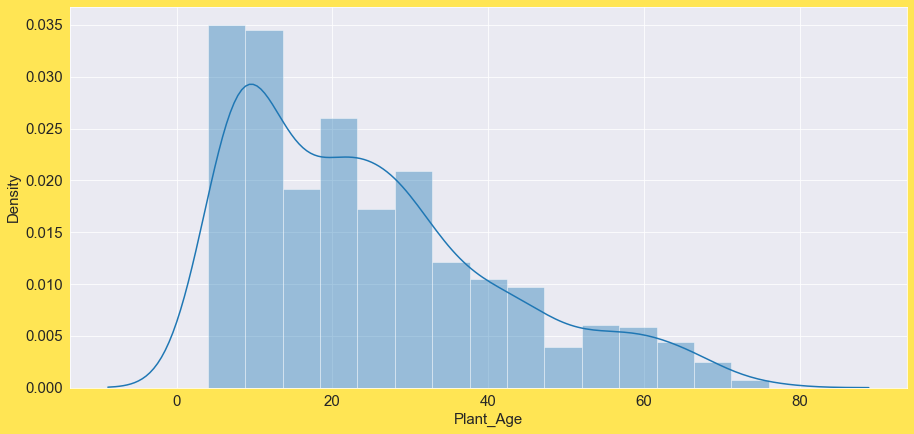

In [112]:
# looking at the skewness visually
for i in skewed_cols:
    sns.distplot(fuel_new[i])
    plt.show()

In [113]:
# using yeojohnson method in powertransform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [114]:
fuel_new[skewed_cols] = pt.fit_transform(fuel_new[skewed_cols])

In [115]:
# checking the skeweness again
fuel_new[skewed_cols].skew().sort_values()
#We can see that the threshold has been reduced to

Plant_Age             -0.030310
longitude              0.000196
capacity_mw            0.017326
generation_gwh_2017    0.131555
generation_gwh_2018    0.138949
generation_gwh_2016    0.152976
generation_gwh_2015    0.168390
generation_gwh_2014    0.231613
dtype: float64

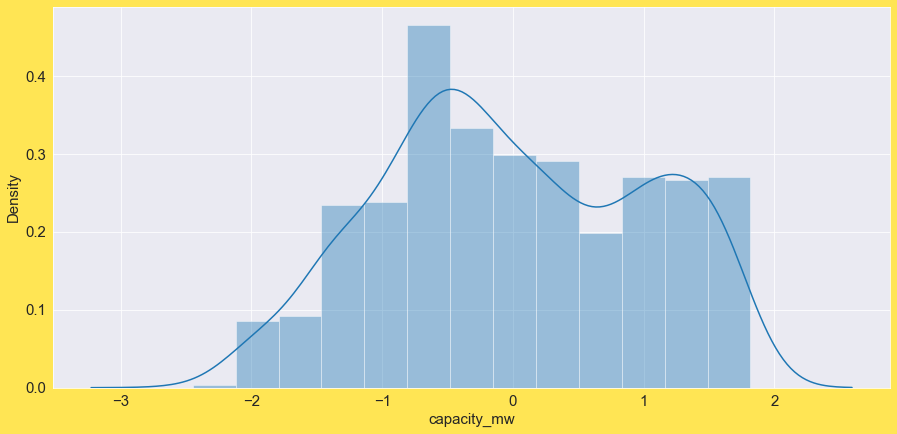

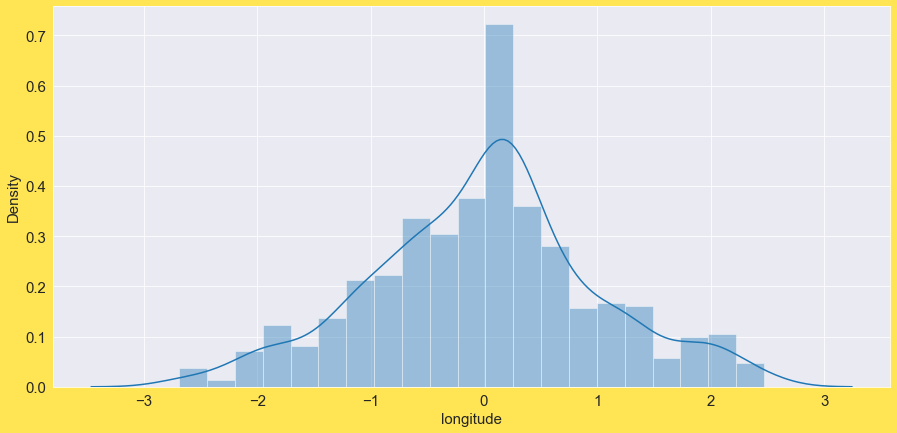

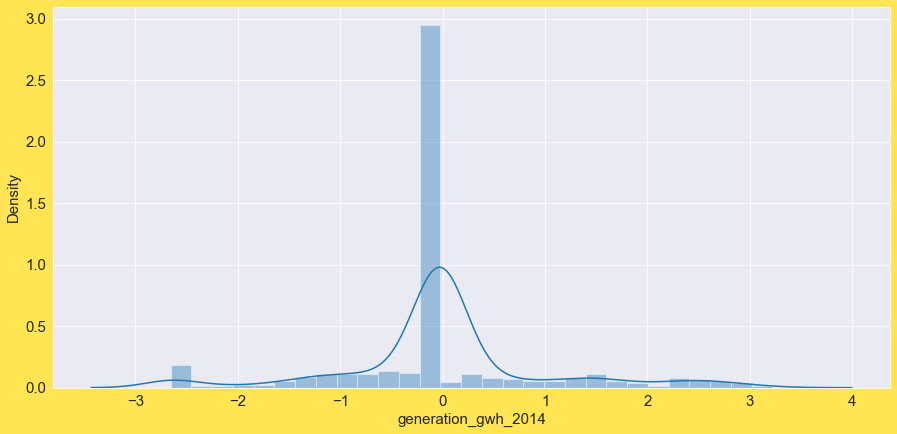

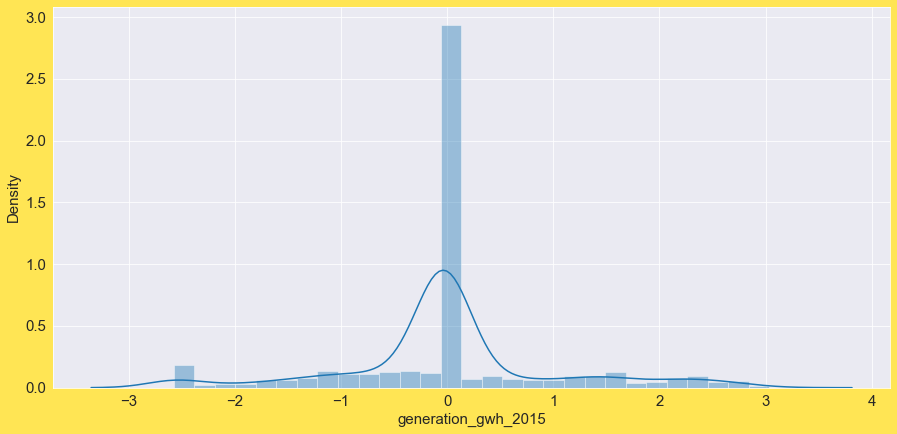

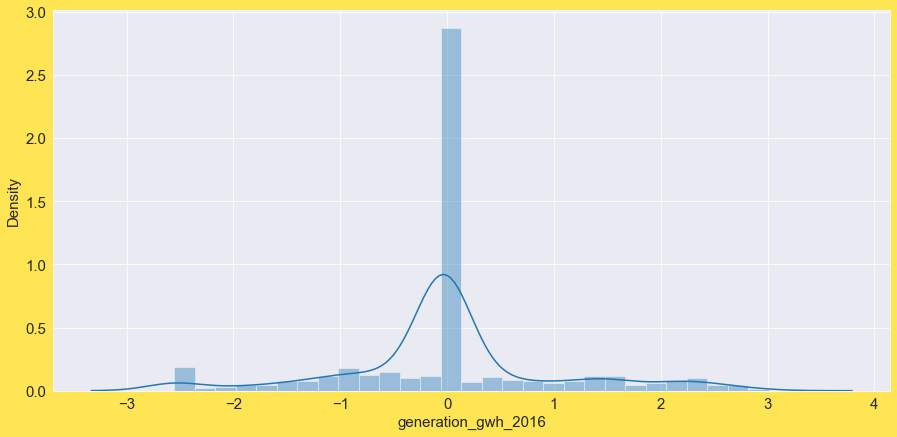

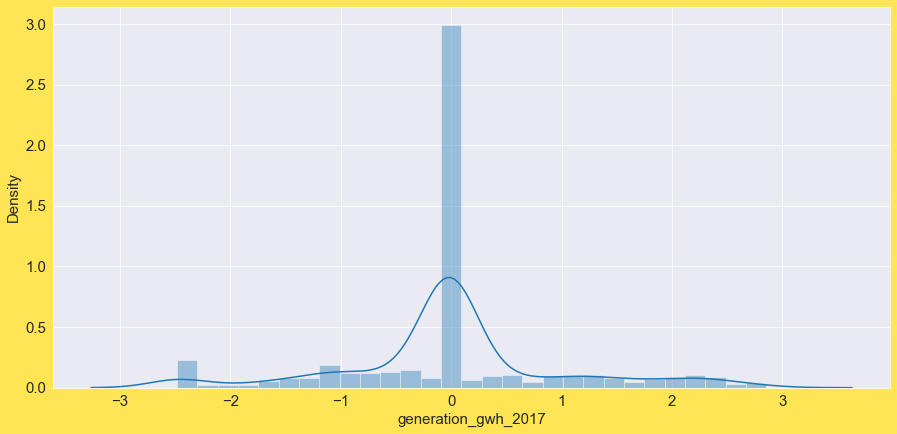

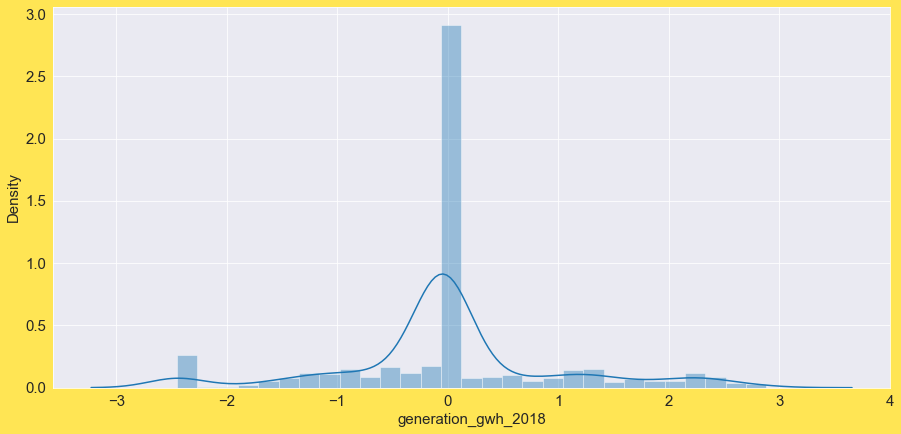

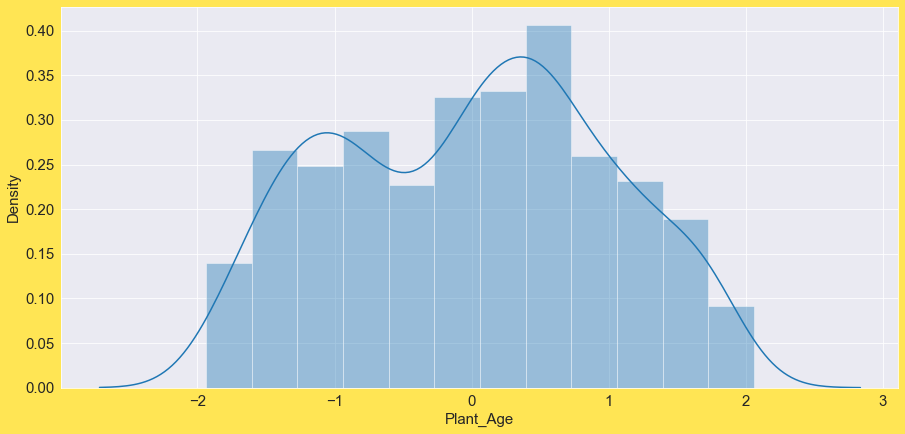

In [116]:
# Checking the skewness again 
# looking at the skewness visually
for i in skewed_cols:
    sns.distplot(fuel_new[i])
    plt.show()

###  CORRELATION

In [117]:
fuel_new.corr().T

capacity_mw  latitude  \
capacity_mw                                            1.000000  0.054863   
latitude                                               0.054863  1.000000   
longitude                                              0.326312 -0.062922   
primary_fuel                                          -0.520528 -0.002392   
generation_gwh_2014                                    0.303645  0.104831   
generation_gwh_2015                                    0.320313  0.100681   
generation_gwh_2016                                    0.347628  0.119326   
generation_gwh_2017                                    0.331045  0.102866   
generation_gwh_2018                                    0.340963  0.110767   
Plant_Age                                             -0.166831 -0.054035   
geolocation_source_National Renewable Energy La...    -0.020046  0.071847   
geolocation_source_WRI                                 0.471554 -0.200071   

                                                    longitude  primary_fuel  \
capacity_mw                                          0.326312     -0.520528   
latitude                                            -0.062922     -0.002392   
longitude                                            1.000000     -0.403789   
primary_fuel                                        -0.403789      1.000000   
generation_gwh_2014                                  0.023722     -0.132408   
generation_gwh_2015                                  0.023671     -0.148060   
generation_gwh_2016                                  0.079016     -0.167496   
generation_gwh_2017                                  0.066437     -0.148069   
generation_gwh_2018                                  0.089639     -0.160904   
Plant_Age                                           -0.089367      0.062315   
geolocation_source_National Renewable Energy La...  -0.085898      0.081295   
geolocation_source_WRI                               0.306673     -0.478991   

                                                    generation_gwh_2014  \
capacity_mw                                                    0.303645   
latitude                                                       0.104831   
longitude                                                      0.023722   
primary_fuel                                                  -0.132408   
generation_gwh_2014                                            1.000000   
generation_gwh_2015                                            0.840508   
generation_gwh_2016                                            0.785238   
generation_gwh_2017                                            0.714162   
generation_gwh_2018                                            0.718322   
Plant_Age                                                     -0.036633   
geolocation_source_National Renewable Energy La...            -0.001843   
geolocation_source_WRI                                         0.010862   

                                                    generation_gwh_2015  \
capacity_mw                                                    0.320313   
latitude                                                       0.100681   
longitude                                                      0.023671   
primary_fuel                                                  -0.148060   
generation_gwh_2014                                            0.840508   
generation_gwh_2015                                            1.000000   
generation_gwh_2016                                            0.882243   
generation_gwh_2017                                            0.771705   
generation_gwh_2018                                            0.772360   
Plant_Age                                                     -0.077157   
geolocation_source_National Renewable Energy La...            -0.002160   
geolocation_source_WRI                                         0.012724   

                                                    generation_gwh_201

<AxesSubplot:>

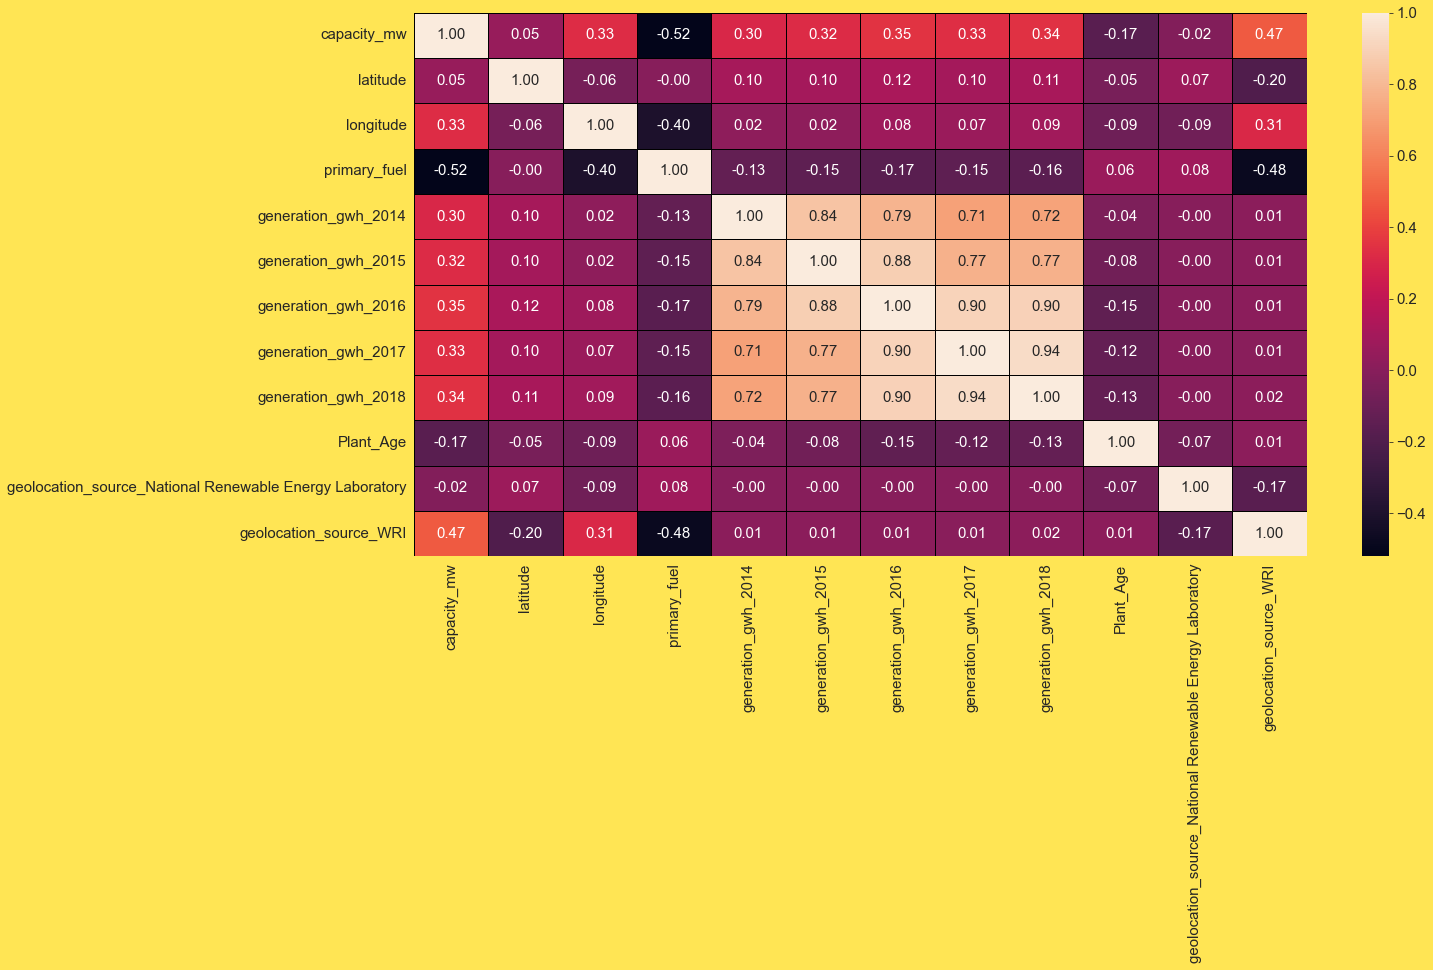

In [118]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(fuel_new.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Observations:-

latitude, other_fuel1, source and Power_plant_age are very less correlated with Fuel_type.

geolocation_gwh_2013 and geolocation_gwh_2014 are highly correlated.

geolocation_gwh_2013 and geolocation_gwh_2015 are highly correlated.

geolocation_gwh_2014 and geolocation_gwh_2015 are highly correlated.

geolocation_gwh_2015 and geolocation_gwh_2016 are highly correlated.

geolocation_gwh_2016 and geolocation_gwh_2014 are highly correlated.

geolocation_gwh_2017 and geolocation_gwh_2015 are highly correlated.

capacity_mw is highly correlated with geolocation_gwh_2016.

capacity_mw is highly correlated with geolocation_gwh_2017.

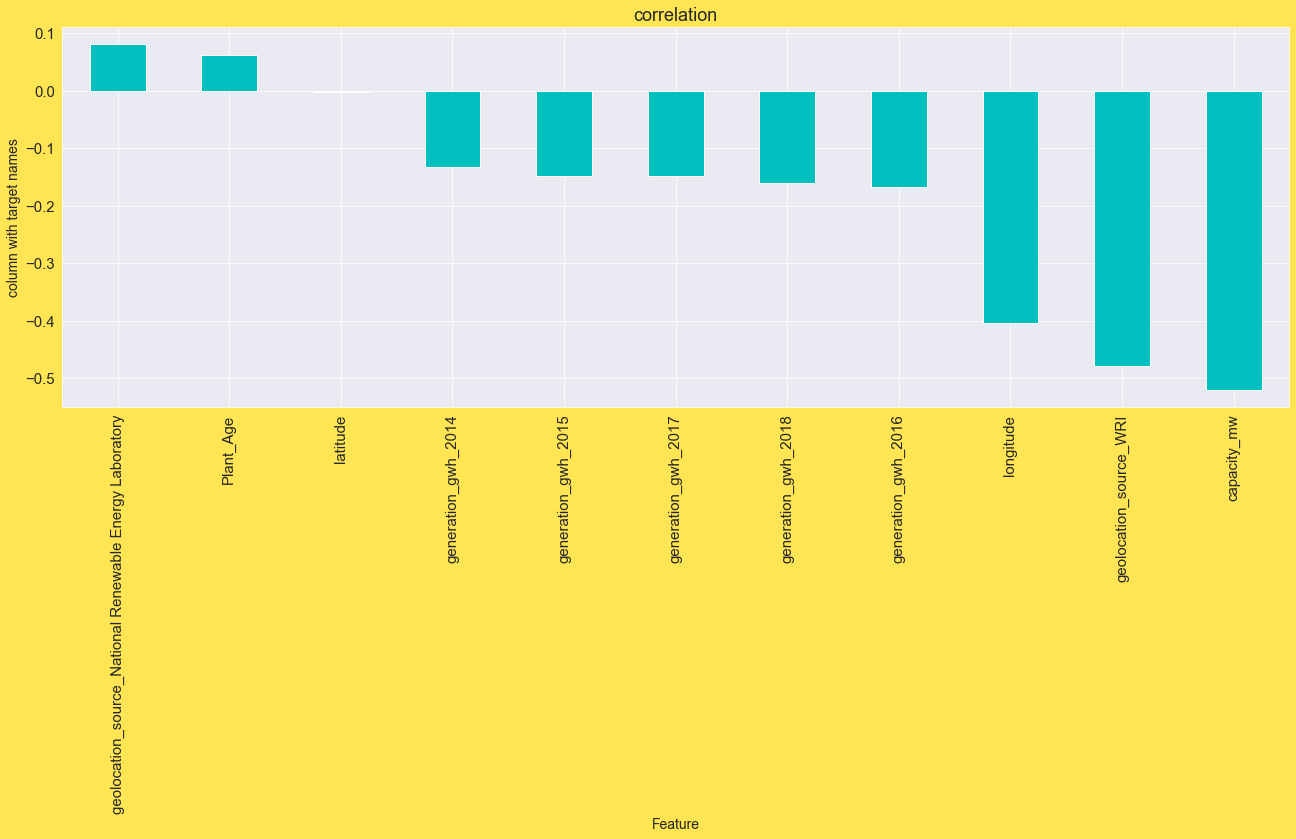

In [119]:
# Checking the correlation of features with the target colun
plt.figure(figsize=(22,7))
fuel_new.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


In [120]:
# We can see that the latitude column is least correlated with the target primary_fuel
# so we can drop it
fuel_new.drop(['latitude'],axis=1,inplace=True)

### Seperating the x and y variables

In [121]:
x = fuel_new.drop(['primary_fuel'],axis=1)
y = fuel_new['primary_fuel']

### Scaling the data to check multicollinearity

In [122]:
# Scaling the independent features using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [129]:
round(x.mean().sum(),2)

-0.0

### CHECKING MULTICOLLINEARITY

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# writing a function to return column names and its vif score
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif

In [127]:
vif_calc()

# ALL THE COLUMNS ARE HAVE NORMAL VIF SCORE
# There is no sign of multicollinearity

vif_Features                                           Features
0      1.643062                                        capacity_mw
1      1.184523                                          longitude
2      3.594481                                generation_gwh_2014
3      6.283664                                generation_gwh_2015
4     10.834104                                generation_gwh_2016
5      9.711672                                generation_gwh_2017
6      9.223090                                generation_gwh_2018
7      1.077267                                          Plant_Age
8      1.042426  geolocation_source_National Renewable Energy L...
9      1.431442                             geolocation_source_WRI

In [134]:
# We can go ahead now

### Treating the imbalanced target

In [138]:
# our target columns is imbalanced
y.value_counts()

3    236
1    232
6    124
7    122
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

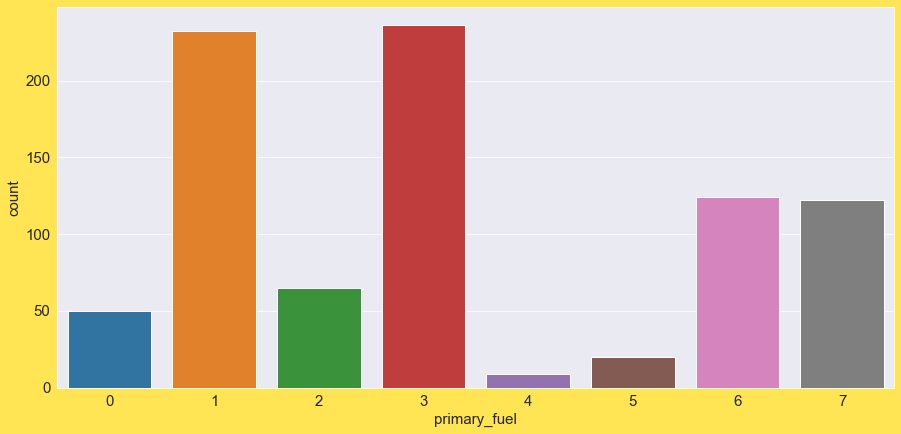

In [142]:
# plottting a countplot
sns.countplot(fuel_new['primary_fuel'])

# We can see that the data is imbalanced

In [143]:
# importing smote from imblearn
# using oversampling technique here
# it means all the categories will become the same with the catregory which is in highest number
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [144]:
x, y = sm.fit_resample(x,y)

In [145]:
# Checking the data again
y.value_counts()

# Now the data is balanced

6    236
1    236
7    236
2    236
3    236
0    236
5    236
4    236
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

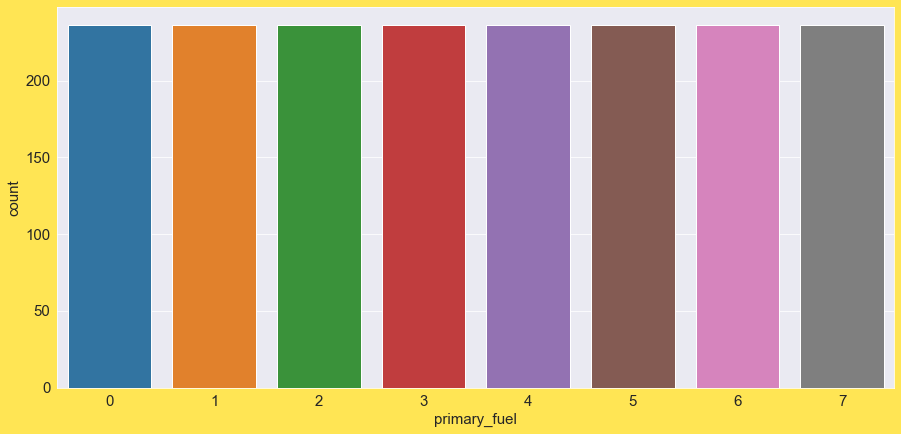

In [147]:
sns.countplot(data=fuel_new,x=y)
# Now we can visually see that the data is balanced

In [151]:
# Now we are ready to build the model

# Model Building

In [152]:
# importing the necessary algorithms and metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [153]:
lor = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
sgdc = SGDClassifier()
xgbc = XGBClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()

### Logistic Regression

In [156]:
# finding the best random state for logistic regression
lor = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lor.fit(x_train,y_train)
    pred_train = lor.predict(x_train)
    pred_test = lor.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')
        
    # getting 55.9% ACCURACY FROM LOR

At random state 4 The model performs very well
At random state:- 4
Training accuracy score is  55.6
Testing accuracy score is  55.6 


At random state 61 The model performs very well
At random state:- 61
Training accuracy score is  53.3
Testing accuracy score is  53.3 


At random state 242 The model performs very well
At random state:- 242
Training accuracy score is  56.1
Testing accuracy score is  56.1 


At random state 290 The model performs very well
At random state:- 290
Training accuracy score is  55.7
Testing accuracy score is  55.7 


At random state 349 The model performs very well
At random state:- 349
Training accuracy score is  55.9
Testing accuracy score is  55.9 


At random state 584 The model performs very well
At random state:- 584
Training accuracy score is  56.1
Testing accuracy score is  56.1 


At random state 701 The model performs very well
At random state:- 701
Training accuracy score is  53.1
Testing accuracy score is  53.1 


At random state 740 The model per

In [157]:
# We have got 55.9 accuracy at random state 349
# At random state 349 the model performs well
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=349)

In [158]:
# Running the model with best random state
lor.fit(x_train,y_train)
pred_train_lor = lor.predict(x_train)
pred_test_lor = lor.predict(x_test)
print(accuracy_score(y_test,pred_test_lor))
print(confusion_matrix(y_test,pred_test_lor))

# Getting  55% accuracy from LOR

0.5590828924162258
[[34  0  0 14  0  0  0 35]
 [ 4 28  6  8 20  0  0  6]
 [ 0  9 35 13  9  6  0  6]
 [13  8  6 26  7  4  0  2]
 [ 0  0  5  0 61  0  0  0]
 [ 0  0  0  2  1 46  0 17]
 [ 0  1  0  0  0  0 59  1]
 [24  3  2  5  0 13  0 28]]


In [159]:
# checking the cv score
lss = accuracy_score(y_test,pred_test_lor) # creating an instance for acccuracy score
from sklearn.model_selection import cross_val_score

In [160]:
# running a for loop to find the best cv value which gives best score
for j in range(5,15):
    lsscore = cross_val_score(lor,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')

[0.54761905 0.53968254 0.55291005 0.51458886 0.5198939 ]
At cv:-  5
Cross validation score is:-  53.493887976646604
accuracy_score is:-  55.908289241622576


[0.54920635 0.55238095 0.54285714 0.53333333 0.51273885 0.52547771]
At cv:-  6
Cross validation score is:-  53.599905638122195
accuracy_score is:-  55.908289241622576


[0.52962963 0.55925926 0.56666667 0.53333333 0.5        0.55390335
 0.49442379]
At cv:-  7
Cross validation score is:-  53.38880037764796
accuracy_score is:-  55.908289241622576


[0.52966102 0.55508475 0.55508475 0.58474576 0.54237288 0.50847458
 0.5720339  0.49576271]
At cv:-  8
Cross validation score is:-  54.290254237288124
accuracy_score is:-  55.908289241622576


[0.54285714 0.56190476 0.55714286 0.53809524 0.54285714 0.54285714
 0.4952381  0.57894737 0.49282297]
At cv:-  9
Cross validation score is:-  53.91914128756235
accuracy_score is:-  55.908289241622576


[0.55555556 0.55026455 0.55026455 0.56084656 0.58201058 0.55555556
 0.5026455  0.51851852 0.5691489

In [161]:
# We are getting almost the same cv score as our accuracy score, so our model  is performing well
# selecting the cv=11
lsscore_selected = cross_val_score(lor,x,y,cv=11).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

The cv score of logistcic Regression is  0.5349269933113262 
The accuracy score of logistic regression is:  0.5590828924162258


###  DecisionTreeClassifier

hyperparametertuning

In [282]:
# selecting a random_state randomly
# reducing the test size to get better accuracy in dtc 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=149)

In [215]:
# creating a parameter grid to search best parameter using GridSearchCV
paramgrid_dtc = {'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'min_samples_split':[2,3,4,5,6,7,8],'min_samples_leaf':[0.5,1,1.5,2,2.5,3,3.5,4]}
print(paramgrid_dtc)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}


In [216]:
dtc_search = GridSearchCV(dtc,param_grid = paramgrid_dtc,error_score='raise')

In [217]:
# fitting the GRid to training data
dtc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [218]:
print(dtc_search.best_score_) # bestscore
print(dtc_search.best_estimator_)
print(dtc_search.best_params_) # best params 

0.7801324503311259
DecisionTreeClassifier(criterion='log_loss')
{'criterion': 'log_loss', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [221]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='log_loss',splitter='best',min_samples_leaf=1,min_samples_split=2) 
# using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_dtc_test,y_test))
print('Classification report of Dtc',classification_report(pred_dtc_test,y_test))
print('\n')

# We are getting almost 79% accuracy

Training score of dtc 1.0
Accuracy Score of dtc 0.7936507936507936
Confusion Matrix of dtc [[34  0  0  0  0  0  0  2]
 [ 1 23  3  3  3  2  0  2]
 [ 0  5 41 10  1  0  1  0]
 [ 0  5  3 27  1  0  0  7]
 [ 0  4  2  0 42  0  0  0]
 [ 3  2  2  0  0 43  0  0]
 [ 0  1  0  0  0  0 47  0]
 [ 5  2  1  3  1  3  0 43]]
Classification report of Dtc               precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.55      0.62      0.58        37
           2       0.79      0.71      0.75        58
           3       0.63      0.63      0.63        43
           4       0.88      0.88      0.88        48
           5       0.90      0.86      0.88        50
           6       0.98      0.98      0.98        48
           7       0.80      0.74      0.77        58

    accuracy                           0.79       378
   macro avg       0.79      0.79      0.79       378
weighted avg       0.80      0.79      0.79       378





In [222]:
# Checking the cross validation of dtc
dtca = accuracy_score(pred_dtc_test,y_test)
for j in range(5,15):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score of DTC is:- ',dsc*100)
    print('accuracy_score of DTC is:- ',dtca*100)
    print('\n')

[0.76719577 0.81216931 0.82539683 0.81432361 0.78779841]
At cv:-  5
Cross validation score of DTC is:-  80.1376784135405
accuracy_score of DTC is:-  79.36507936507937


[0.78730159 0.77460317 0.83492063 0.84126984 0.82484076 0.81847134]
At cv:-  6
Cross validation score of DTC is:-  81.3567890001011
accuracy_score of DTC is:-  79.36507936507937


[0.78148148 0.77777778 0.84444444 0.84814815 0.82592593 0.84386617
 0.79925651]
At cv:-  7
Cross validation score of DTC is:-  81.72714934796718
accuracy_score of DTC is:-  79.36507936507937


[0.75847458 0.75847458 0.82627119 0.86864407 0.84745763 0.83474576
 0.8559322  0.79661017]
At cv:-  8
Cross validation score of DTC is:-  81.83262711864407
accuracy_score of DTC is:-  79.36507936507937


[0.75238095 0.76666667 0.8        0.81428571 0.87619048 0.81904762
 0.79047619 0.83732057 0.78947368]
At cv:-  9
Cross validation score of DTC is:-  80.50935419356473
accuracy_score of DTC is:-  79.36507936507937


[0.76719577 0.74603175 0.77248677 0.830

In [223]:
# the cv score at 5 and accuracy score is almost same, so we can say that the model is working well
# cv= 5 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=5).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

# DTC 79%

The cv score of DecisionTree is  0.7934304520511417 
The accuracy score of DecisionTree is:  0.7936507936507936


### SupportVectorClassifier

In [224]:
# Creating parameter grid for  SVC
paramgrid_svc = {'C':[0.1,0.2,0.3,0.4,1.0,1.5],
                 'kernel':['rbf','poly','sigmoid'],
                 'degree':[3,4,5,6],'gamma':['scale','auto'],'decision_function_shape':['ovo', 'ovr'],'cache_size':[150,200,250,300],'shrinking':[True,False]}
print(paramgrid_svc)

{'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr'], 'cache_size': [150, 200, 250, 300], 'shrinking': [True, False]}


In [225]:
svcs = GridSearchCV(svc,param_grid=paramgrid_svc,error_score='raise')

In [226]:
svcs.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5],
                         'cache_size': [150, 200, 250, 300],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [227]:
print(svcs.best_score_)
print(svcs.best_estimator_)
print(svcs.best_params_)

0.7066225165562914
SVC(C=1.5, cache_size=150, decision_function_shape='ovo', gamma='auto')
{'C': 1.5, 'cache_size': 150, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}


In [228]:
# running the model using the best params
svc = SVC(C=1.5,degree=3,gamma='auto',kernel='rbf',cache_size=150,decision_function_shape='ovo',shrinking=True) # using the best parameters
svc.fit(x_train,y_train)
pred_svc_test= svc.predict(x_test)
pred_svc_train = svc.predict(x_train)
print('Training score of svc',accuracy_score(pred_svc_train,y_train))
print('Accuracy Score of svc',accuracy_score(pred_svc_test,y_test))
print('Confusion Matrix of svc',confusion_matrix(pred_svc_test,y_test))
print('Classification report of svc',classification_report(pred_svc_test,y_test))
print('\n')

# We are getting around 70 % accuracy with SVC

Training score of svc 0.7384105960264901
Accuracy Score of svc 0.7037037037037037
Confusion Matrix of svc [[38  8  0 11  0  6  0 23]
 [ 0 20  2  7  4  0  0  0]
 [ 0  6 37  8  0  0  0  1]
 [ 0  2  3 16  4  0  0  0]
 [ 0  3  1  1 40  0  0  0]
 [ 1  1  7  0  0 40  0  1]
 [ 0  0  0  0  0  0 46  0]
 [ 4  2  2  0  0  2  2 29]]
Classification report of svc               precision    recall  f1-score   support

           0       0.88      0.44      0.59        86
           1       0.48      0.61      0.53        33
           2       0.71      0.71      0.71        52
           3       0.37      0.64      0.47        25
           4       0.83      0.89      0.86        45
           5       0.83      0.80      0.82        50
           6       0.96      1.00      0.98        46
           7       0.54      0.71      0.61        41

    accuracy                           0.70       378
   macro avg       0.70      0.72      0.70       378
weighted avg       0.75      0.70      0.71       37

In [230]:
# checking the cv score
svca = accuracy_score(y_test,pred_svc_test) 
for j in range(5,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.6984127  0.71428571 0.72222222 0.71618037 0.68435013]
At cv:-  5
Cross validation score is:-  70.7090227779883
accuracy_score is:-  70.37037037037037


[0.71428571 0.6952381  0.74603175 0.6984127  0.72929936 0.69745223]
At cv:-  6
Cross validation score is:-  71.34533077208235
accuracy_score is:-  70.37037037037037


[0.70740741 0.7037037  0.73703704 0.71851852 0.70740741 0.72118959
 0.6802974 ]
At cv:-  7
Cross validation score is:-  71.07944375602368
accuracy_score is:-  70.37037037037037


[0.70762712 0.6779661  0.71186441 0.78813559 0.6779661  0.71186441
 0.74576271 0.66949153]
At cv:-  8
Cross validation score is:-  71.1334745762712
accuracy_score is:-  70.37037037037037


[0.70952381 0.67142857 0.73809524 0.73809524 0.72857143 0.70952381
 0.72380952 0.73205742 0.66028708]
At cv:-  9
Cross validation score is:-  71.2376901850586
accuracy_score is:-  70.37037037037037




In [231]:
# selecting cv = 5
svcscore_selected = cross_val_score(svc,x,y,cv=5).mean()
print('The cv score of SVC is ',svcscore_selected,'\nThe accuracy score of SVC is: ',svca)


# 70% from SVC

The cv score of SVC is  0.707090227779883 
The accuracy score of SVC is:  0.7037037037037037


### KNeighborsClassifier

In [232]:
# paragrid for KNC
paramgrid_knc = {'n_neighbors':[x for x in range(5,16)],'algorithm':['auto','ball_tree','kd_tree'],
                 'leaf_size':[l for l in range(30,41)],'p':[2,3,4,6],}
# writing a list comprehension for leaf_size and n_neighbors instead of writing all the values

In [233]:
knc_search = GridSearchCV(knc,param_grid=paramgrid_knc)

In [234]:
knc_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'p': [2, 3, 4, 6]})

In [235]:
print(knc_search.best_score_)
print(knc_search.best_estimator_)
print(knc_search.best_params_)

0.785430463576159
KNeighborsClassifier()
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 5, 'p': 2}


In [236]:
# running the model using the best params
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=5,p=2) # using the best parameters
knc.fit(x_train,y_train)
pred_knc_test= knc.predict(x_test)
pred_knc_train = knc.predict(x_train)
print('Training score of knc: ',accuracy_score(pred_knc_train,y_train))
print('Accuracy Score of knc: ',accuracy_score(pred_knc_test,y_test))
print('Confusion Matrix of knc: ',confusion_matrix(pred_knc_test,y_test))
print('Classification report of knc: ',classification_report(pred_knc_test,y_test))
print('\n')

# getting 83% accuracy

Training score of knc:  0.8549668874172185
Accuracy Score of knc:  0.8333333333333334
Confusion Matrix of knc:  [[40  3  0  2  0  2  0  5]
 [ 0 25  0  2  3  0  0  0]
 [ 0  3 48 13  1  0  0  0]
 [ 0  1  2 21  1  0  0  4]
 [ 0  4  0  1 43  0  0  0]
 [ 2  3  1  1  0 46  0  0]
 [ 0  0  1  0  0  0 48  1]
 [ 1  3  0  3  0  0  0 44]]
Classification report of knc:                precision    recall  f1-score   support

           0       0.93      0.77      0.84        52
           1       0.60      0.83      0.69        30
           2       0.92      0.74      0.82        65
           3       0.49      0.72      0.58        29
           4       0.90      0.90      0.90        48
           5       0.96      0.87      0.91        53
           6       1.00      0.96      0.98        50
           7       0.81      0.86      0.84        51

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.82       378
weighted avg       0.86      0.83      0.84 

In [237]:
# checking the cv score
knca = accuracy_score(y_test,pred_knc_test) 
for j in range(5,15):
    knccore = cross_val_score(knc,x,y,cv=j)
    print(knccore)
    kncc = knccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',kncc*100)
    print('accuracy_score is:- ',knca*100)
    print('\n') # cv and accuracy is almost same

[0.78835979 0.81216931 0.83068783 0.81697613 0.79045093]
At cv:-  5
Cross validation score is:-  80.77287973839698
accuracy_score is:-  83.33333333333334


[0.78412698 0.8031746  0.83492063 0.7968254  0.81847134 0.79936306]
At cv:-  6
Cross validation score is:-  80.61470023253463
accuracy_score is:-  83.33333333333334


[0.77777778 0.7962963  0.84814815 0.82222222 0.80740741 0.81040892
 0.80297398]
At cv:-  7
Cross validation score is:-  80.93192502114435
accuracy_score is:-  83.33333333333334


[0.79237288 0.79237288 0.83050847 0.83898305 0.8220339  0.8220339
 0.82627119 0.80932203]
At cv:-  8
Cross validation score is:-  81.67372881355932
accuracy_score is:-  83.33333333333334


[0.79047619 0.77142857 0.83809524 0.84761905 0.82380952 0.80952381
 0.83809524 0.81339713 0.81818182]
At cv:-  9
Cross validation score is:-  81.67362851573378
accuracy_score is:-  83.33333333333334


[0.80952381 0.76190476 0.80952381 0.84126984 0.85185185 0.82010582
 0.8042328  0.83068783 0.79787234 0.81914

In [238]:
# selecting cv =14  and we are getting accuracy and cv score almost same , which means our model is working well
kncscore_selected = cross_val_score(knc,x,y,cv=14).mean()
print('The cv score of KNeighborsC is ',kncscore_selected,'\nThe accuracy score of KNeighborsC is: ',knca)

# 83% accuracy from KNeighborsC

The cv score of KNeighborsC is  0.8188580904998817 
The accuracy score of KNeighborsC is:  0.8333333333333334


### SGDClassifier

In [244]:
# paramgrid
parametergrid_sgdc = {'loss':['hinge','log_loss','log','modified_huber','squared_hinge'],
                     'penalty':['l2','l1','elasticnet'],'alpha':[0.1,.001,0.0001,1,10],'max_iter':[1000,1200,1300,1400,1500],
                     'l1_ratio':[0.15,0.30,0.45,0.60,0.75],'learning_rate':['constant','optimal','invscaling','adaptive']}

In [245]:
sgdc_search = GridSearchCV(sgdc,param_grid=parametergrid_sgdc)

In [246]:
sgdc_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1, 10],
                         'l1_ratio': [0.15, 0.3, 0.45, 0.6, 0.75],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [1000, 1200, 1300, 1400, 1500],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [248]:
print(sgdc_search.best_score_)
print(sgdc_search.best_estimator_)
print(sgdc_search.best_params_)

0.5609271523178807
SGDClassifier(alpha=0.001, l1_ratio=0.45, loss='log', penalty='l1')
{'alpha': 0.001, 'l1_ratio': 0.45, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}


In [249]:
# running the model using the best params
sgdc = SGDClassifier(alpha=0.0001,loss='log',max_iter=1000,penalty='l1',l1_ratio=0.45,learning_rate='optimal') # using the best parameters
sgdc.fit(x_train,y_train)
pred_sgdc_test= sgdc.predict(x_test)
pred_sgdc_train = sgdc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_sgdc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_sgdc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_sgdc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_sgdc_test,y_test))
print('\n')

# sgdc is giving 46%

Training score of SGDClassifier:  0.46357615894039733
Accuracy Score of SGDClassifier:  0.46825396825396826
Confusion Matrix of SGDClassifier:  [[10  2  0  8  0  0  0 16]
 [ 3 13  8  8  2  0  0  7]
 [ 0  3 12  2  5  0  0  0]
 [ 6 11 21 22  3 11  0  5]
 [ 0 11  5  1 38  1  0  0]
 [ 0  1  2  0  0  8  0  0]
 [ 0  0  0  0  0  0 48  0]
 [24  1  4  2  0 28  0 26]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.23      0.28      0.25        36
           1       0.31      0.32      0.31        41
           2       0.23      0.55      0.32        22
           3       0.51      0.28      0.36        79
           4       0.79      0.68      0.73        56
           5       0.17      0.73      0.27        11
           6       1.00      1.00      1.00        48
           7       0.48      0.31      0.37        85

    accuracy                           0.47       378
   macro avg       0.47      0.52      0.45       378
we

In [250]:
# checking the cv score
sgdca = accuracy_score(y_test,pred_sgdc_test) 
for j in range(4,15):
    sgdccore = cross_val_score(sgdc,x,y,cv=j)
    print(sgdccore)
    sgdcc = sgdccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgdca*100)
    print('\n') # cv and accuracy is almost same

[0.50211864 0.50635593 0.51271186 0.54025424]
At cv:-  4
Cross validation score is:-  51.53601694915254
accuracy_score is:-  46.82539682539682


[0.51058201 0.52645503 0.57142857 0.4933687  0.48275862]
At cv:-  5
Cross validation score is:-  51.69185858841032
accuracy_score is:-  46.82539682539682


[0.46349206 0.55238095 0.51428571 0.48571429 0.44267516 0.50318471]
At cv:-  6
Cross validation score is:-  49.362214808074675
accuracy_score is:-  46.82539682539682


[0.45925926 0.54074074 0.5        0.53703704 0.5037037  0.49070632
 0.41635688]
At cv:-  7
Cross validation score is:-  49.25434196809661
accuracy_score is:-  46.82539682539682


[0.46186441 0.48305085 0.45762712 0.52542373 0.47881356 0.50423729
 0.53813559 0.47881356]
At cv:-  8
Cross validation score is:-  49.09957627118644
accuracy_score is:-  46.82539682539682


[0.46666667 0.52380952 0.48095238 0.47619048 0.4952381  0.55238095
 0.47619048 0.48803828 0.47368421]
At cv:-  9
Cross validation score is:-  49.2572339940761
acc

In [251]:
# selecting cv = 14
sgdcscore_selected = cross_val_score(sgdc,x,y,cv=14).mean()
print('The cv score of SGDClassifier is ',sgdcscore_selected,'\nThe accuracy score of SGDClassifier is: ',sgdca)

# % with sgdc and cv score is almost same so our model is working well
# getting 46% accuracy after cv

The cv score of SGDClassifier is  0.4787728026533996 
The accuracy score of SGDClassifier is:  0.46825396825396826


## ENSEMBLE METHODS

### RandomForestClassifier

In [254]:
# framing the parameters
# no of trees in random forest
n_estimators = [int(x) for x in range(100,300,50)]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4,6]

min_samples_split = [2,5,7,3,4]

min_samples_leaf = [2,3,4,5]

class_weight = ["balanced", "balanced_subsample"]

bootstrap = [True,False]

In [256]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'class_weight':class_weight,
             'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [100, 150, 200, 250], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6], 'min_samples_split': [2, 5, 7, 3, 4], 'min_samples_leaf': [2, 3, 4, 5], 'class_weight': ['balanced', 'balanced_subsample'], 'bootstrap': [True, False]}


In [257]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'class_weight':class_weight,
             'bootstrap':bootstrap}
print(param_grid)

In [296]:
rfc_search = GridSearchCV(rfc,param_grid=param_grid,error_score='raise')

In [258]:
rfc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 5, 7, 3, 4],
                         'n_estimators': [100, 150, 200, 250]})

In [259]:
print(rfc_search.best_score_)
print(rfc_search.best_estimator_)
print(rfc_search.best_params_) # we got the best score and best params

0.7509933774834437
RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='log_loss', max_depth=6, min_samples_leaf=2,
                       min_samples_split=4)
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [260]:
# running the model using the best params
rfc = RandomForestClassifier(criterion='log_loss', max_depth=6, max_features='sqrt',min_samples_leaf=2, min_samples_split=4,n_estimators=100) # using the best parameters
rfc.fit(x_train,y_train)
pred_rfc_test= rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)
print('Training score of RandomForestClassifier: ',accuracy_score(pred_rfc_train,y_train))
print('Accuracy Score of RandomForestClassifier: ',accuracy_score(pred_rfc_test,y_test))
print('Confusion Matrix of RandomForestClassifier: ',confusion_matrix(pred_rfc_test,y_test))
print('Classification report of RandomForestClassifier: ',classification_report(pred_rfc_test,y_test))
print('\n')

# getting % accuracy

Training score of RandomForestClassifier:  0.7966887417218543
Accuracy Score of RandomForestClassifier:  0.7619047619047619
Confusion Matrix of RandomForestClassifier:  [[40  2  0  4  0  5  0 17]
 [ 0 20  0  1  1  0  0  0]
 [ 0  4 40 10  1  0  0  0]
 [ 0  2  2 18  0  0  0  0]
 [ 0  6  2  2 46  0  0  0]
 [ 0  0  5  0  0 39  0  0]
 [ 0  0  0  0  0  0 48  0]
 [ 3  8  3  8  0  4  0 37]]
Classification report of RandomForestClassifier:                precision    recall  f1-score   support

           0       0.93      0.59      0.72        68
           1       0.48      0.91      0.62        22
           2       0.77      0.73      0.75        55
           3       0.42      0.82      0.55        22
           4       0.96      0.82      0.88        56
           5       0.81      0.89      0.85        44
           6       1.00      1.00      1.00        48
           7       0.69      0.59      0.63        63

    accuracy                           0.76       378
   macro avg       0.7

In [261]:
# checking the cv score
rfca = accuracy_score(y_test,pred_rfc_test) 
for j in range(4,15):
    rfccore = cross_val_score(rfc,x,y,cv=j)
    print(rfccore)
    rfcc = rfccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfcc*100)
    print('accuracy_score is:- ',rfca*100)
    print('\n') # cv and accuracy is almost same

[0.7309322  0.77118644 0.75635593 0.70550847]
At cv:-  4
Cross validation score is:-  74.09957627118644
accuracy_score is:-  76.19047619047619


[0.72486772 0.75132275 0.77513228 0.75331565 0.69496021]
At cv:-  5
Cross validation score is:-  73.99197226783434
accuracy_score is:-  76.19047619047619


[0.72380952 0.74603175 0.76190476 0.75238095 0.75477707 0.71656051]
At cv:-  6
Cross validation score is:-  74.2577427290803
accuracy_score is:-  76.19047619047619


[0.74444444 0.72962963 0.77407407 0.75555556 0.76666667 0.73977695
 0.69516729]
At cv:-  7
Cross validation score is:-  74.36163726126551
accuracy_score is:-  76.19047619047619


[0.74576271 0.72033898 0.73728814 0.79661017 0.75423729 0.77542373
 0.75847458 0.68220339]
At cv:-  8
Cross validation score is:-  74.6292372881356
accuracy_score is:-  76.19047619047619


[0.75238095 0.69047619 0.76190476 0.77142857 0.75714286 0.77619048
 0.76190476 0.74641148 0.67464115]
At cv:-  9
Cross validation score is:-  74.36090225563909
accur

In [262]:
# selecting cv = 13
# we are getting the cv score and accuracy almost same so our model is working well
rfcscore_selected = cross_val_score(rfc,x,y,cv=13).mean()
print('The cv score of RandomForestClassifier is ',rfcscore_selected,'\nThe accuracy score of RandomForestClassifier is: ',rfca)
# getting 76% with rfc

The cv score of RandomForestClassifier is  0.7479197703571818 
The accuracy score of RandomForestClassifier is:  0.7619047619047619


### AdaBoostClassifier

In [263]:
parametergrid_abc = {'n_estimators':[x for x in range(50,61)],'algorithm':['SAMME','SAMME.R'],'learning_rate':[0.5,1.0,1.5,2.0]}

In [264]:
abc_search = GridSearchCV(abc,param_grid=parametergrid_abc)

In [265]:
abc_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5, 2.0],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

In [266]:
print(abc_search.best_score_)
print(abc_search.best_estimator_)
print(abc_search.best_params_) # we got the best score and best params

0.5768211920529802
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=56)
{'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 56}


In [267]:
# running the model using the best params
abc = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=56) # using the best parameters
abc.fit(x_train,y_train)
pred_abc_test= abc.predict(x_test)
pred_abc_train = abc.predict(x_train)
print('Training score of AdaBoostClassifier: ',accuracy_score(pred_abc_train,y_train))
print('Accuracy Score of AdaBoostClassifier: ',accuracy_score(pred_abc_test,y_test))
print('Confusion Matrix of AdaBoostClassifier: ',confusion_matrix(pred_abc_test,y_test))
print('Classification report of AdaBoostClassifier: ',classification_report(pred_abc_test,y_test))
print('\n')

# we are getting % accuracy with AdaBoostC

Training score of AdaBoostClassifier:  0.29271523178807946
Accuracy Score of AdaBoostClassifier:  0.29365079365079366
Confusion Matrix of AdaBoostClassifier:  [[29  2  2  7  0 15 30 19]
 [ 0  4  7  5  2 10  0  0]
 [ 0 20 11 15 40  6  1  0]
 [ 0  9 27 11  6  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  3  0  0  9  0  5]
 [ 0  0  0  0  0  0 17  0]
 [14  6  2  5  0  7  0 30]]
Classification report of AdaBoostClassifier:                precision    recall  f1-score   support

           0       0.67      0.28      0.39       104
           1       0.10      0.14      0.11        28
           2       0.21      0.12      0.15        93
           3       0.26      0.20      0.23        54
           4       0.00      0.00      0.00         1
           5       0.19      0.53      0.28        17
           6       0.35      1.00      0.52        17
           7       0.56      0.47      0.51        64

    accuracy                           0.29       378
   macro avg       0.29      0.34   

In [269]:
# checking the cv score
abca = accuracy_score(y_test,pred_abc_test) 
for j in range(2,10):
    abccore = cross_val_score(abc,x,y,cv=j)
    print(abccore)
    abcc = abccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',abcc*100)
    print('accuracy_score is:- ',abca*100)
    print('\n') # cv and accuracy is almost same

[0.27542373 0.38559322]
At cv:-  2
Cross validation score is:-  33.05084745762712
accuracy_score is:-  29.365079365079367


[0.43333333 0.35294118 0.33863275]
At cv:-  3
Cross validation score is:-  37.49690867337927
accuracy_score is:-  29.365079365079367


[0.35169492 0.3559322  0.3029661  0.36228814]
At cv:-  4
Cross validation score is:-  34.32203389830509
accuracy_score is:-  29.365079365079367


[0.35978836 0.32275132 0.34920635 0.28912467 0.4005305 ]
At cv:-  5
Cross validation score is:-  34.4280240831965
accuracy_score is:-  29.365079365079367


[0.44761905 0.36190476 0.4        0.30793651 0.44904459 0.42675159]
At cv:-  6
Cross validation score is:-  39.887608263404445
accuracy_score is:-  29.365079365079367


[0.3962963  0.25555556 0.36296296 0.38518519 0.41111111 0.37174721
 0.42379182]
At cv:-  7
Cross validation score is:-  37.237859208119424
accuracy_score is:-  29.365079365079367


[0.42372881 0.35169492 0.29661017 0.40254237 0.37288136 0.38559322
 0.38983051 0.3559322 

In [270]:
# selecting cv = 2
# we are getting cv score and accuracy almost same, so our model is working well
abcscore_selected = cross_val_score(abc,x,y,cv=2).mean()
print('The cv score of AdaBoostClassifier is ',abcscore_selected,'\nThe accuracy score of AdaBoostClassifier is: ',abca)

The cv score of AdaBoostClassifier is  0.3305084745762712 
The accuracy score of AdaBoostClassifier is:  0.29365079365079366


# Model Selection

In [289]:
# creating a dataframe to present all the models, accuracy and cv score
models = pd.DataFrame({'Model Name':['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier','SGDClassifier','SupportVectorClassifier'],
                       'Accuracy':[lss,dtca,rfca,abca,knca,sgdca,svca],
                       'CV_Score':[lsscore_selected,dtcscore_selected,rfcscore_selected,abcscore_selected,kncscore_selected,sgdcscore_selected,svcscore_selected]})

In [290]:
models

# We can observe that KNeighbors is giving high accuracy score compared to other models
# And the difference between cv score and accuracy score is less 
# So we will choose 

Model Name  Accuracy  CV_Score
0      Logistic Regression  0.559083  0.534927
1   DecisionTreeClassifier  0.793651  0.793430
2   RandomForestClassifier  0.761905  0.747920
3       AdaBoostClassifier  0.293651  0.330508
4     KNeighborsClassifier  0.833333  0.818858
5            SGDClassifier  0.468254  0.478773
6  SupportVectorClassifier  0.703704  0.707090

### SAVING THE MODEL

In [293]:
import pickle
filename = 'Powerplant_fuelpred.pkl'
pickle.dump(knc,open(filename, 'wb'))

In [295]:
import numpy as np
a = np.array(y_test)
predicted = np.array(knc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(10)

# comparison of predicted and original value

Original  Predicted
137         7          7
230         1          1
129         2          2
299         7          7
142         5          5
169         6          6
144         0          0
101         6          6
224         7          7
102         1          4

# Now we have to predict another target i.e., capacity_mw

In [1093]:
# duplicating the dataframe to predict the capacity_mw
cap_df = power_df

In [1094]:
cap_df.head()

capacity_mw  latitude  longitude primary_fuel  \
0          2.5   28.1839    73.2407        Solar   
1         98.0   24.7663    74.6090         Coal   
2         39.2   21.9038    69.3732         Wind   
3        135.0   23.8712    91.3602          Gas   
4       1800.0   21.9603    82.4091         Coal   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory           801.123775   
1                                   WRI           801.123775   
2                                   WRI           801.123775   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0           711.181225           737.205450           817.977250   
1           711.181225           737.205450           817.977250   
2           711.181225           737.205450           817.977250   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  Plant_Age  
0           751.644375         11  
1           751.644375         21  
2           751.644375          5  
3           626.239128         18  
4          7279.000000          7

In [1095]:
cap_df['geolocation_source'].value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [1096]:
cap_df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [1097]:
cap_df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Plant_Age              0
dtype: int64

### Encoding the variables

In [1098]:
# We have encoded the primaryfuel using label encoding, because it was our label foor the classifiction
# But now it becomes an independent varaible with capacity_mw being the target.
# So we have to use onehot encoder to encode the fuel and geolocation_source as they both are nominal data which doesn't have any order


In [1099]:
# importing onehot encoder 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # dropping one of the categories in each feature to avoid multicollinearity

df_object = cap_df.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(['geolocation_source','primary_fuel'])

cap_df_en= pd.concat([cap_df.select_dtypes(exclude='object'), # we storing it in new df i.e., cap_df_en -. encoded one
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [1100]:
cap_df.shape

(907, 11)

In [1101]:
cap_df_en.shape

# We can see that the size of the columns has been increased

(907, 18)

In [1102]:
cap_df_en.sample(7)

capacity_mw  latitude  longitude  generation_gwh_2014  \
779          2.0   18.3198    74.3686           801.123775   
156          5.0   20.6729    83.1107           801.123775   
100         20.0   23.3256    81.0333           801.123775   
368       1240.0   25.1712    75.8171          8010.253000   
279       1000.0   22.2791    76.4728          2529.190500   
324       1000.0   31.5156    78.1073          4219.227850   
179         15.5   24.8271    92.9737           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
779           711.181225            737.20545            817.97725   
156           711.181225            737.20545            817.97725   
100           711.181225            737.20545            817.97725   
368          6992.321000           6628.79200           6415.02900   
279          1964.338950           3304.18605            877.35120   
324          4702.688400           4350.42855           4547.08035   
179           711.181225            737.20545            817.97725   

     generation_gwh_2018  Plant_Age  geolocation_source_Coal  \
779           751.644375         22                        0   
156           751.644375          9                        0   
100           751.644375         31                        0   
368          7049.638000         29                        1   
279          1302.246050         18                        0   
324          3948.846550         11                        0   
179           751.644375         25                        0   

     geolocation_source_Gas  geolocation_source_Hydro  \
779                       0                         0   
156                       0                         0   
100                       0                         1   
368                       0                         0   
279                       0                         1   
324                       0                         1   
179                       1                         0   

     geolocation_source_Nuclear  geolocation_source_Oil  \
779                           0                       0   
156                           0                       0   
100                           0                       0   
368                           0                       0   
279                           0                       0   
324                           0                       0   
179                           0                       0   

     geolocation_source_Solar  geolocation_source_Wind  \
779                         1                        0   
156                         1                        0   
100                         0                        0   
368                         0                        0   
279                         0                        0   
324                         0                        0   
179                         0                        0   

     primary_fuel_National Renewable Energy Laboratory  primary_fuel_WRI  
779                                                  0                 0  
156                                                  0                 0  
100                                                  0                 1  
368                                                  0                 1  
279                                                  0                 1  
324                                                  0                 1  
179                                                  0                 1

### Checking and treating Outliers

<AxesSubplot:>

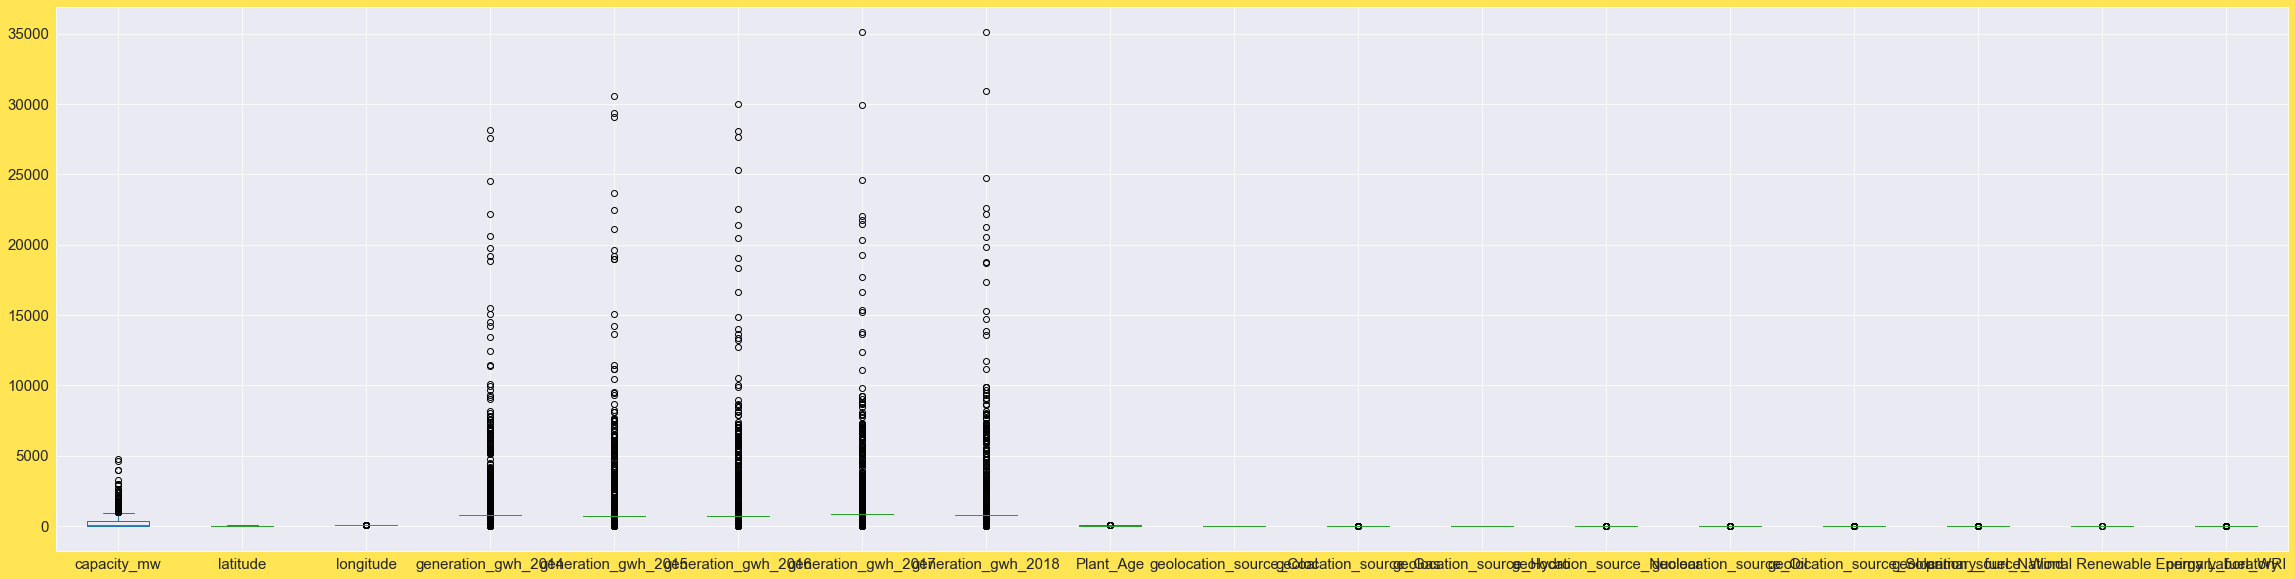

In [1103]:
cap_df_en.plot(kind='box',figsize=(40,10))
# We can see there are many outliers in generation c_gwh columns
# For primary fuel model we took out outliers from the capacity_mw
# But here we have to predict the capacity_mw, so we will bw cautious to not transform our target
 

In [1104]:
cap_df_en.dtypes

capacity_mw                                          float64
latitude                                             float64
longitude                                            float64
generation_gwh_2014                                  float64
generation_gwh_2015                                  float64
generation_gwh_2016                                  float64
generation_gwh_2017                                  float64
generation_gwh_2018                                  float64
Plant_Age                                              int64
geolocation_source_Coal                                int32
geolocation_source_Gas                                 int32
geolocation_source_Hydro                               int32
geolocation_source_Nuclear                             int32
geolocation_source_Oil                                 int32
geolocation_source_Solar                               int32
geolocation_source_Wind                                int32
primary_fuel_National Re

In [1105]:
# outliers column
out_cols = cap_df_en[[ 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'Plant_Age']]

In [1106]:
# using zscore method to remove the outliers
from scipy.stats import zscore

z=np.abs(zscore(out_cols))

print(np.where(z>3))

(array([ 15,  15,  15,  15, 138, 143, 143, 143, 143, 143, 158, 179, 183,
       209, 209, 209, 209, 209, 244, 269, 308, 308, 308, 308, 308, 323,
       333, 340, 360, 364, 364, 364, 364, 364, 416, 427, 482, 493, 493,
       493, 493, 493, 494, 494, 494, 494, 494, 499, 509, 519, 532, 538,
       546, 577, 601, 623, 638, 648, 648, 648, 648, 648, 657, 657, 657,
       657, 657, 695, 695, 695, 695, 695, 709, 721, 721, 721, 721, 721,
       724, 724, 724, 724, 724, 726, 726, 726, 726, 726, 728, 754, 786,
       786, 786, 786, 786, 808, 808, 808, 808, 808, 818, 847, 880, 880,
       880, 880, 880], dtype=int64), array([3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 2, 1, 1, 2, 3, 4, 5, 6, 1, 7, 2, 3,
       4, 5, 6, 1, 1, 1, 1, 2, 3, 4, 5, 6, 1, 1, 6, 2, 3, 4, 5, 6, 2, 3,
       4, 5, 6, 1, 7, 1, 2, 7, 1, 1, 7, 2, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5,
       6, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6,
       7, 7, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 1, 1, 2, 3, 4, 5, 6],
      dtype=int64))


In [1107]:
# removing the outliers
cap_new= cap_df_en[(z<3).all(axis=1)]

In [1108]:
print("shape before and after")
print("shape before: ",cap_df_en.shape)
print("shape after: ",cap_new.shape)
print("Percentage Loss: ",(cap_df_en.shape[0]-cap_new.shape[0])/cap_df_en.shape[0]*100)

# The data loss is around 4.8% with the zscore method

shape before and after
shape before:  (907, 18)
shape after:  (863, 18)
Percentage Loss:  4.851157662624035


In [1109]:
# Checking with the IQR method as well
Q1=out_cols.quantile(0.25)
Q3=out_cols.quantile(0.75)
IQR=Q3 - Q1

cap_new_quant = cap_df_en[~((cap_df_en < (Q1 - 1.5 * IQR)) |(cap_df_en > (Q3 + 1.5 * IQR))).any(axis=1)]

In [1110]:
print("shape before and after")
print("shape before: ",cap_df_en.shape)
print("shape after: ",cap_new_quant.shape)
print("Percentage Loss: ",(cap_df_en.shape[0]-cap_new_quant.shape[0])/cap_df_en.shape[0]*100)

# We can see that the data loss is significantly higher using IQR method

shape before and after
shape before:  (907, 18)
shape after:  (442, 18)
Percentage Loss:  51.267916207276734


In [1111]:
# So choosing the zscore method
cap_new.head()

capacity_mw  latitude  longitude  generation_gwh_2014  generation_gwh_2015  \
0          2.5   28.1839    73.2407           801.123775           711.181225   
1         98.0   24.7663    74.6090           801.123775           711.181225   
2         39.2   21.9038    69.3732           801.123775           711.181225   
3        135.0   23.8712    91.3602           617.789264           843.747000   
4       1800.0   21.9603    82.4091          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  Plant_Age  \
0           737.205450           817.977250           751.644375         11   
1           737.205450           817.977250           751.644375         21   
2           737.205450           817.977250           751.644375          5   
3           886.004428           663.774500           626.239128         18   
4          6243.000000          5385.579736          7279.000000          7   

   geolocation_source_Coal  geolocation_source_Gas  geolocation_source_Hydro  \
0                        0                       0                         0   
1                        1                       0                         0   
2                        0                       0                         0   
3                        0                       1                         0   
4                        1                       0                         0   

   geolocation_source_Nuclear  geolocation_source_Oil  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   

   geolocation_source_Solar  geolocation_source_Wind  \
0                         1                        0   
1                         0                        0   
2                         0                        1   
3                         0                        0   
4                         0                        0   

   primary_fuel_National Renewable Energy Laboratory  primary_fuel_WRI  
0                                                  1                 0  
1                                                  0                 1  
2                                                  0                 1  
3                                                  0                 1  
4                                                  0                 1

### CHECKING AND TREATING THE SKEWNESS

In [1112]:
cap_new.skew().sort_values()

primary_fuel_WRI                                     -2.090061
latitude                                             -0.116181
Plant_Age                                             0.883785
longitude                                             0.924121
geolocation_source_Coal                               1.011682
geolocation_source_Hydro                              1.018223
geolocation_source_Solar                              2.035157
geolocation_source_Wind                               2.062327
capacity_mw                                           2.192292
generation_gwh_2017                                   2.567148
generation_gwh_2018                                   2.619106
generation_gwh_2016                                   2.666873
generation_gwh_2015                                   2.736540
generation_gwh_2014                                   2.963085
geolocation_source_Gas                                3.224050
geolocation_source_Oil                                6

In [1113]:
# treating the skewed columns only
# except latitude every column continuous column is skewed
# shouldn't include the target capacity_mw
skewed_cols = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Plant_Age']

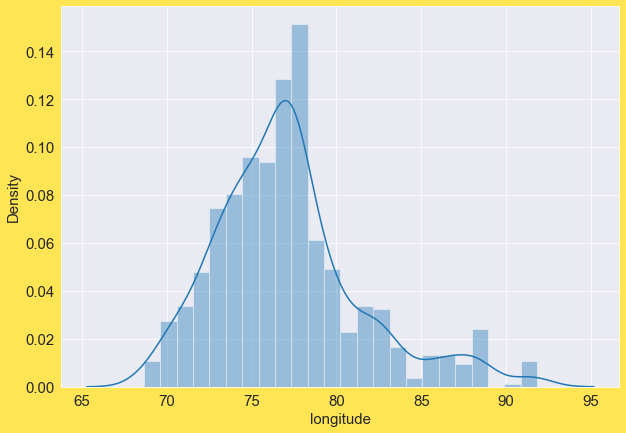

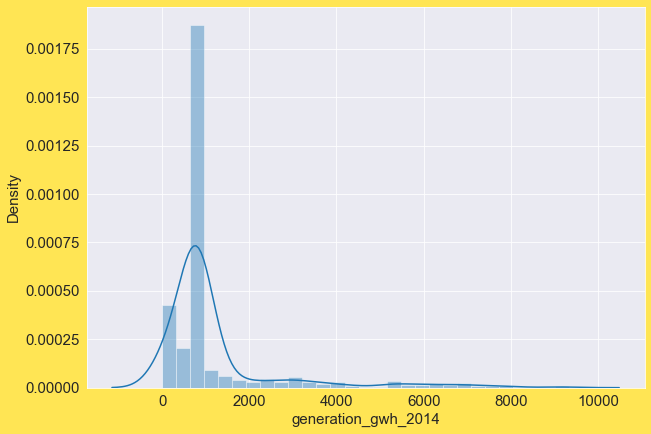

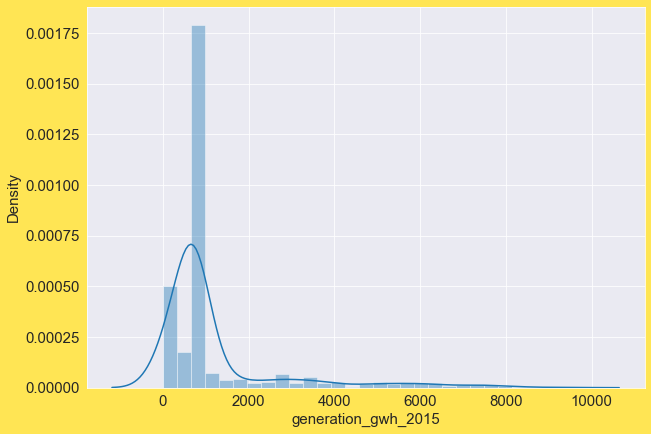

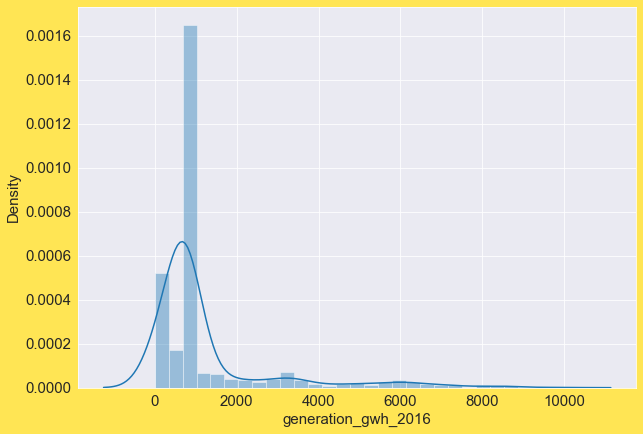

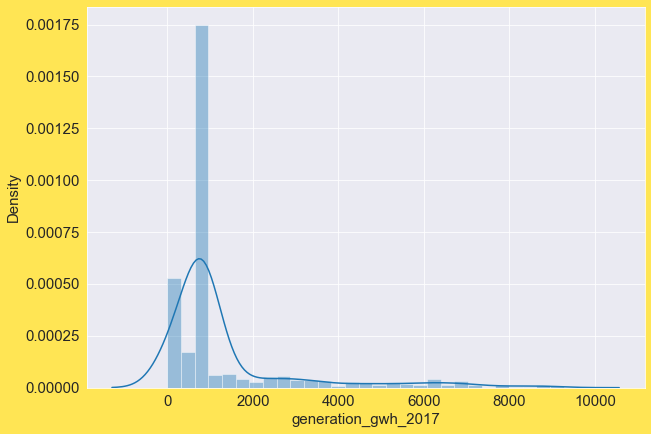

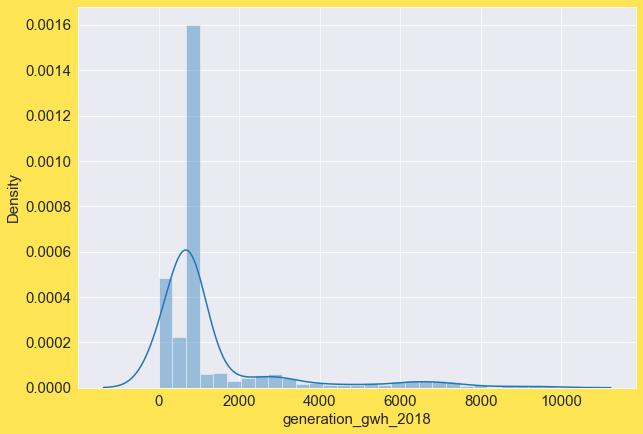

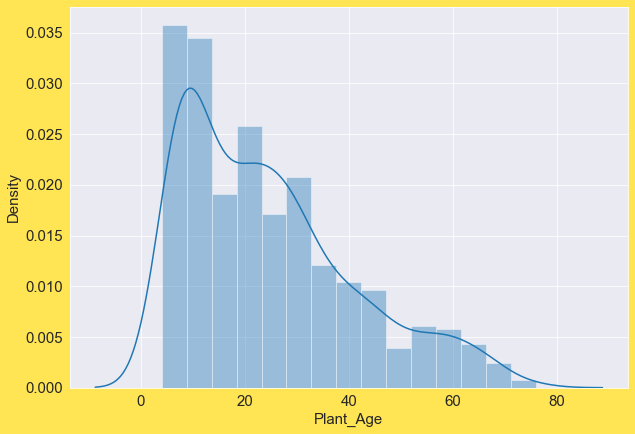

In [1114]:
# looking at the skewness visually
for i in skewed_cols:
    sns.distplot(cap_new[i])
    plt.show()

In [1115]:
# using yeojohnson method in powertransform
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [1116]:
cap_new[skewed_cols] = pt.fit_transform(cap_new[skewed_cols])

In [1117]:
# checking the skewness again
cap_new[skewed_cols].skew().sort_values()

# we can see that skewness has been removed

Plant_Age             -0.029167
longitude             -0.000244
generation_gwh_2017    0.127470
generation_gwh_2018    0.135206
generation_gwh_2016    0.145907
generation_gwh_2015    0.163449
generation_gwh_2014    0.229031
dtype: float64

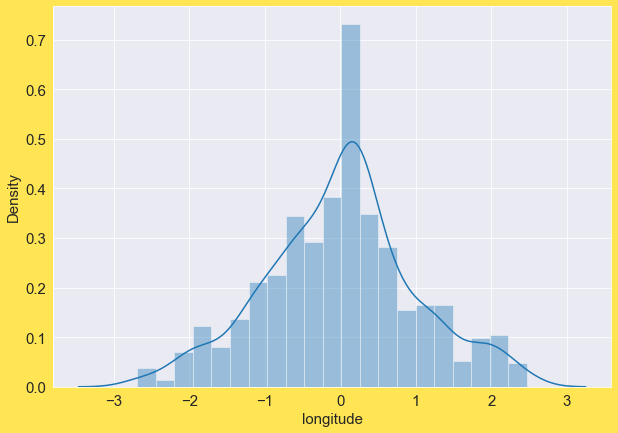

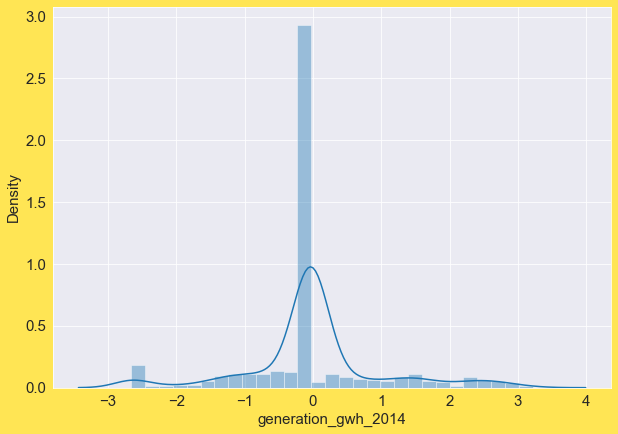

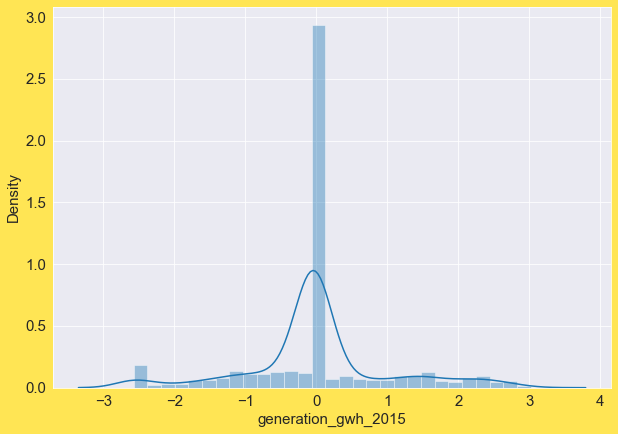

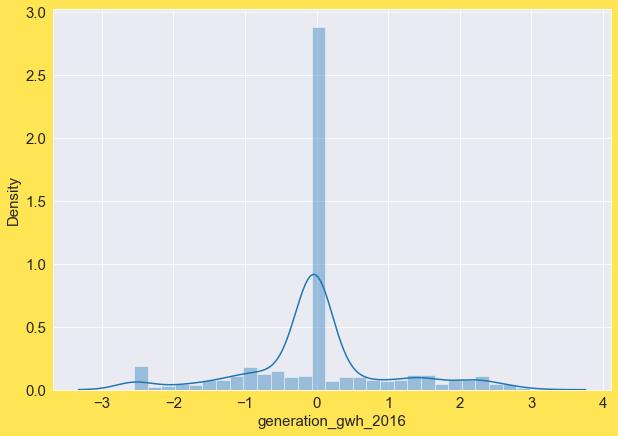

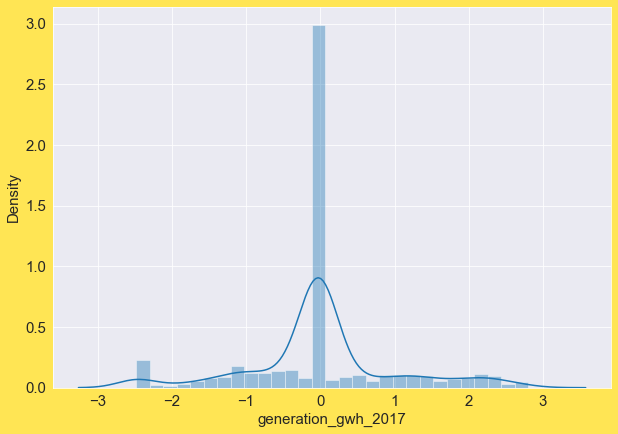

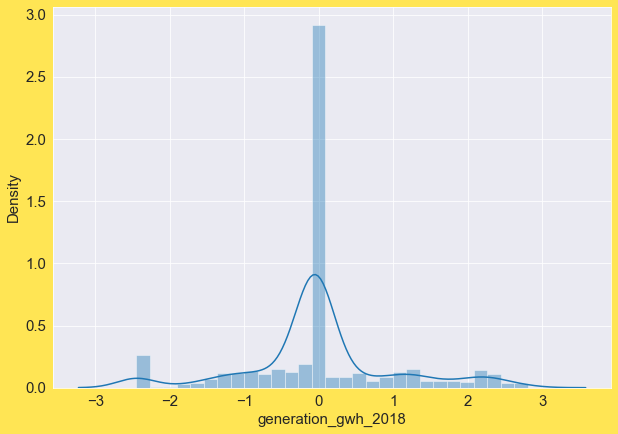

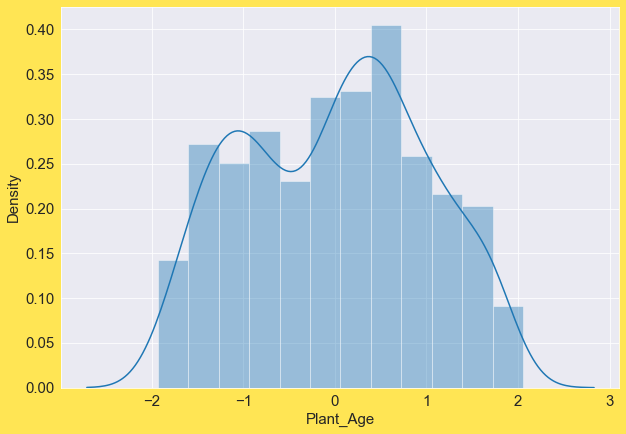

In [1118]:
# looking at the skewness again visually
for i in skewed_cols:
    sns.distplot(cap_new[i])
    plt.show()
    
# W ecan se through the figures that skewness has been reduced to its minimum

## Correlation

In [1119]:
# checking the correlation
cap_new.corr().T

capacity_mw  latitude  \
capacity_mw                                           1.000000  0.048075   
latitude                                              0.048075  1.000000   
longitude                                             0.248053 -0.062118   
generation_gwh_2014                                   0.467037  0.105997   
generation_gwh_2015                                   0.518789  0.101848   
generation_gwh_2016                                   0.581746  0.121858   
generation_gwh_2017                                   0.602865  0.102687   
generation_gwh_2018                                   0.612214  0.109848   
Plant_Age                                            -0.253893 -0.053629   
geolocation_source_Coal                               0.491046  0.048666   
geolocation_source_Gas                                0.065005 -0.068414   
geolocation_source_Hydro                             -0.116039  0.100934   
geolocation_source_Nuclear                            0.161016 -0.051155   
geolocation_source_Oil                               -0.064200 -0.081450   
geolocation_source_Solar                             -0.232849  0.197221   
geolocation_source_Wind                              -0.219676 -0.188395   
primary_fuel_National Renewable Energy Laboratory    -0.031432  0.071795   
primary_fuel_WRI                                      0.229518 -0.199799   

                                                   longitude  \
capacity_mw                                         0.248053   
latitude                                           -0.062118   
longitude                                           1.000000   
generation_gwh_2014                                 0.026483   
generation_gwh_2015                                 0.027591   
generation_gwh_2016                                 0.083001   
generation_gwh_2017                                 0.070259   
generation_gwh_2018                                 0.091794   
Plant_Age                                          -0.091210   
geolocation_source_Coal                             0.317777   
geolocation_source_Gas                              0.004395   
geolocation_source_Hydro                            0.168151   
geolocation_source_Nuclear                         -0.015597   
geolocation_source_Oil                             -0.060520   
geolocation_source_Solar                           -0.299690   
geolocation_source_Wind                            -0.252620   
primary_fuel_National Renewable Energy Laboratory  -0.085910   
primary_fuel_WRI                                    0.306926   

                                                   generation_gwh_2014  \
capacity_mw                                                   0.467037   
latitude                                                      0.105997   
longitude                                                     0.026483   
generation_gwh_2014                                           1.000000   
generation_gwh_2015                                           0.841087   
generation_gwh_2016                                           0.785081   
generation_gwh_2017                                           0.714285   
generation_gwh_2018                                           0.716167   
Plant_Age                                                    -0.042211   
geolocation_source_Coal                                       0.331826   
geolocation_source_Gas                                       -0.159320   
geolocation_source_Hydro                                     -0.192812   
geolocation_source_Nuclear                                    0.157725   
geolocation_source_Oil                                       -0.166076   
geolocation_source_Solar                                     -0.013315   
geolocation_source_Wind                                      -0.013189   
primary_fuel_National Renewable Energy Laboratory            -0.002218   
primary_fuel_WRI                                         

<AxesSubplot:>

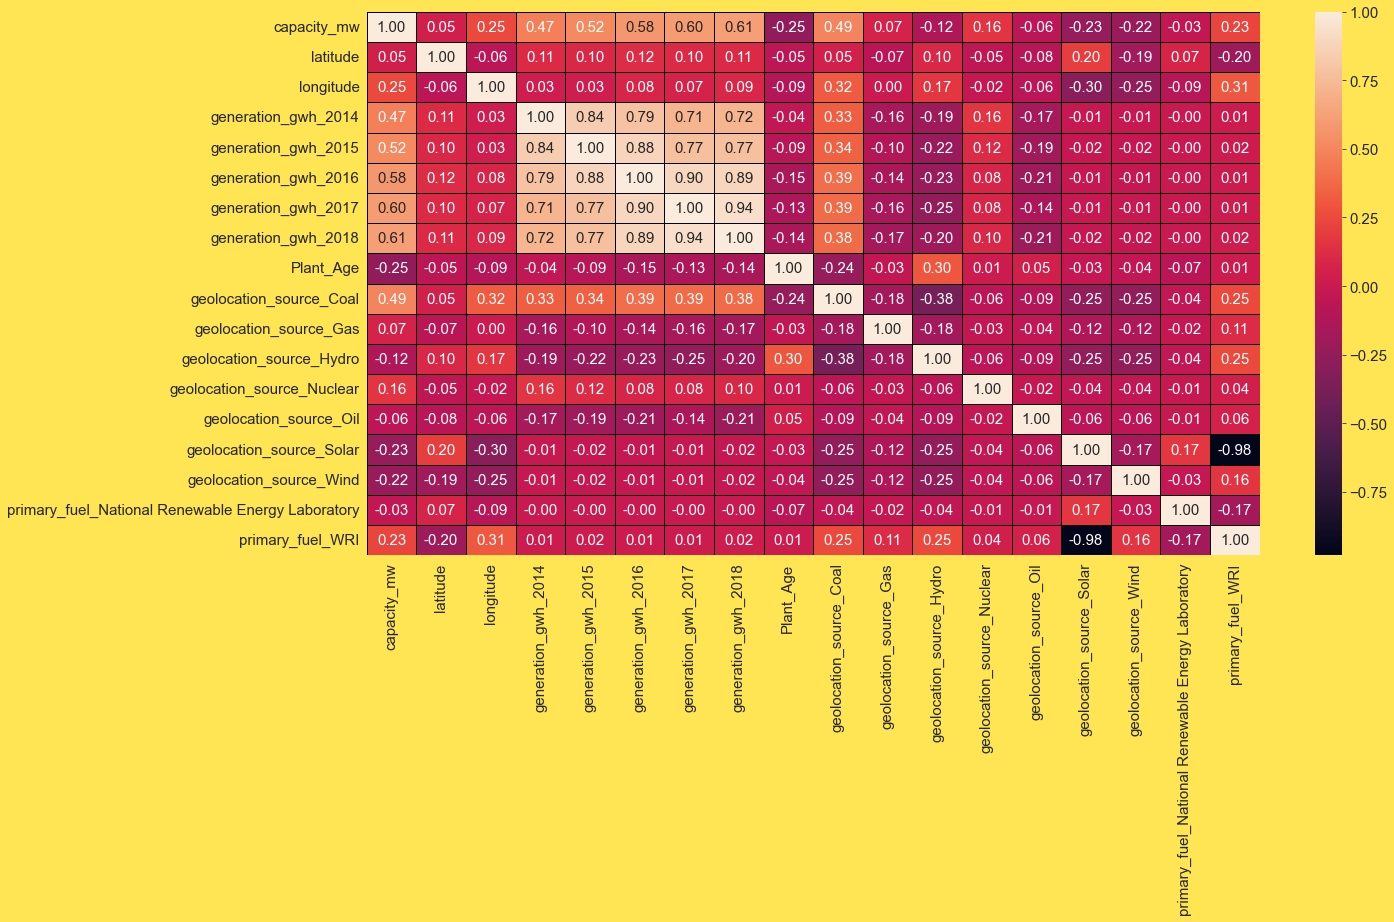

In [1120]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(cap_new.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

geolocation_solar,primary_fuel_wri and generation_gwh_2016,17,18 are highly correlated with the target capacity_mw

And lattitude and primary_fuel_National Renewable Energey are least correlated with the target

In [1121]:
# checking the corr with respect to target capacity_mw
cap_new.corr()['capacity_mw'].sort_values()

Plant_Age                                           -0.253893
geolocation_source_Solar                            -0.232849
geolocation_source_Wind                             -0.219676
geolocation_source_Hydro                            -0.116039
geolocation_source_Oil                              -0.064200
primary_fuel_National Renewable Energy Laboratory   -0.031432
latitude                                             0.048075
geolocation_source_Gas                               0.065005
geolocation_source_Nuclear                           0.161016
primary_fuel_WRI                                     0.229518
longitude                                            0.248053
generation_gwh_2014                                  0.467037
geolocation_source_Coal                              0.491046
generation_gwh_2015                                  0.518789
generation_gwh_2016                                  0.581746
generation_gwh_2017                                  0.602865
generati

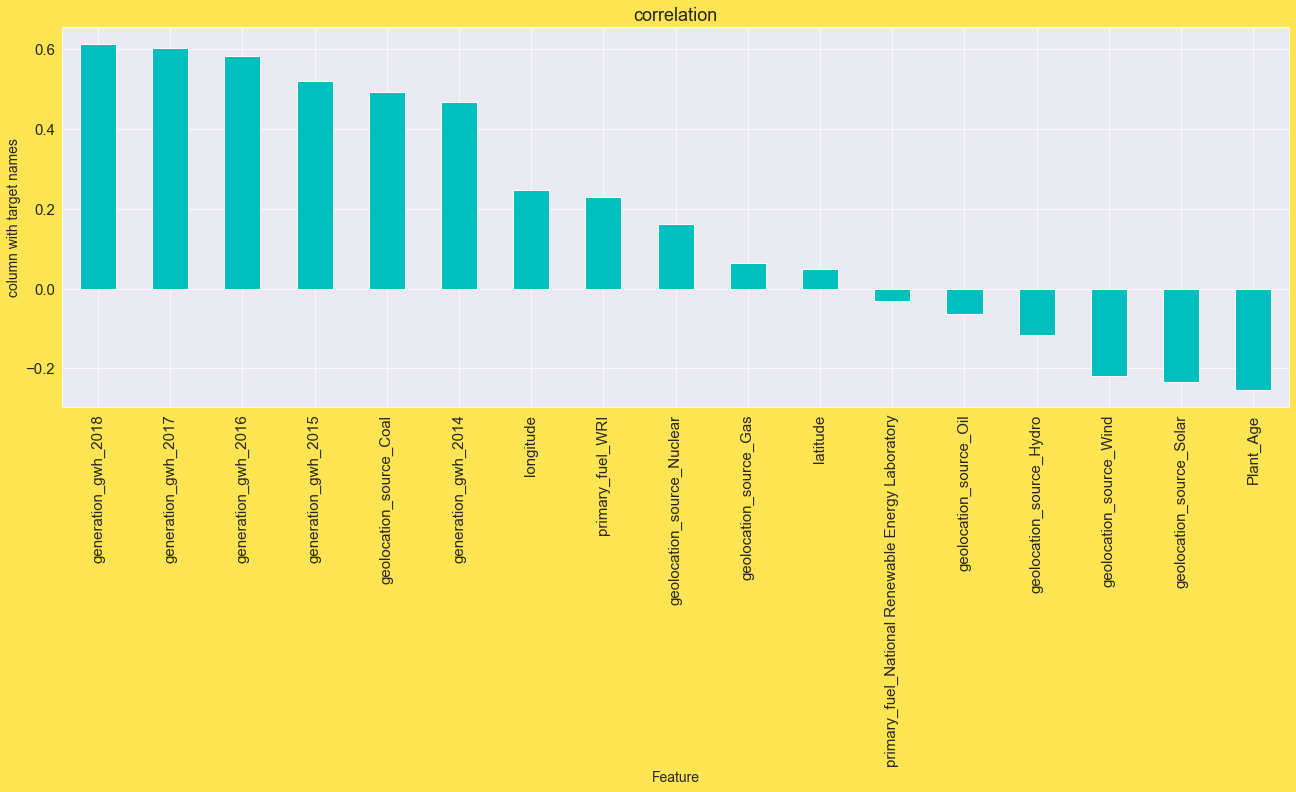

In [1122]:
# Checking the correlation of features with the target colunm
plt.figure(figsize=(22,7))
cap_new.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [1123]:
cap_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'Plant_Age', 'geolocation_source_Coal',
       'geolocation_source_Gas', 'geolocation_source_Hydro',
       'geolocation_source_Nuclear', 'geolocation_source_Oil',
       'geolocation_source_Solar', 'geolocation_source_Wind',
       'primary_fuel_National Renewable Energy Laboratory',
       'primary_fuel_WRI'],
      dtype='object')

In [1124]:
# dropping the primary_fuel_National Renewable Energy Laboratory column as it is least correlated with the target
# and has high amount of skewness
cap_new.drop(['primary_fuel_National Renewable Energy Laboratory'],axis=1,inplace=True)

###  Seperating the features and target

In [1125]:
# seperating the features and target
x = cap_new.drop(['capacity_mw'],axis=1)
y = cap_new['capacity_mw']

In [1126]:
x.shape

(863, 16)

In [1127]:
y.shape

(863,)

## Scaling the data

In [1128]:
# Now we have to check if any multicollinearity exists between the variables
# to do that we have to scale the data
# Scaling the independent features using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

## Checking multicollinearity

In [1129]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1130]:
# writing a function to return column names and its vif score
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif

In [1131]:
vif_calc()

vif_Features                    Features
0       1.162639                    latitude
1       1.356415                   longitude
2       3.710252         generation_gwh_2014
3       6.280580         generation_gwh_2015
4      10.065941         generation_gwh_2016
5      10.426819         generation_gwh_2017
6       9.448770         generation_gwh_2018
7       1.183345                   Plant_Age
8       4.554450     geolocation_source_Coal
9       2.194834      geolocation_source_Gas
10      4.557272    geolocation_source_Hydro
11      1.206240  geolocation_source_Nuclear
12      1.465086      geolocation_source_Oil
13     28.922903    geolocation_source_Solar
14      2.978769     geolocation_source_Wind
15     27.039345            primary_fuel_WRI

In [1132]:
# we can see that geolocation_source WRI and Solar are having almost the same vif score
# As WRI is contributing slightly more to the target (observing the heatmap)
# We shall remove the solar first and then run the function  to check the vif again
x.drop(['geolocation_source_Solar'],axis=1,inplace=True)

In [1133]:
# We can see that now multicollinearity is resolved 

In [1134]:
# checking vif again
vif_calc()

vif_Features                    Features
0       1.160803                    latitude
1       1.354896                   longitude
2       3.710091         generation_gwh_2014
3       6.280263         generation_gwh_2015
4      10.064598         generation_gwh_2016
5      10.426510         generation_gwh_2017
6       9.448552         generation_gwh_2018
7       1.177056                   Plant_Age
8       4.265040     geolocation_source_Coal
9       2.101211      geolocation_source_Gas
10      4.301101    geolocation_source_Hydro
11      1.193101  geolocation_source_Nuclear
12      1.437082      geolocation_source_Oil
13      2.826392     geolocation_source_Wind
14      2.961098            primary_fuel_WRI

# Model Building

In [1135]:
# importing the necessary models,metrics and the methods
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [1136]:
lr = LinearRegression()

dtr = DecisionTreeRegressor()

knr = KNeighborsRegressor()

svr = SVR()

sgdr = SGDRegressor()

xgbr = XGBRegressor()

rfr = RandomForestRegressor()

abr = AdaBoostRegressor()

gbr = GradientBoostingRegressor()


## Linear Regression

In [1154]:
# CHECKING THE RANDOM STATE FOR LINEAR REGRESSION
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')
        
        # getting 59.2% at random state 412

At random state 133 The model performs very well
At random state:- 133
Training r2 score is  58.8
Testing r2 score is  58.8 


At random state 243 The model performs very well
At random state:- 243
Training r2 score is  59.0
Testing r2 score is  59.0 


At random state 390 The model performs very well
At random state:- 390
Training r2 score is  59.1
Testing r2 score is  59.1 


At random state 534 The model performs very well
At random state:- 534
Training r2 score is  58.8
Testing r2 score is  58.8 


At random state 653 The model performs very well
At random state:- 653
Training r2 score is  59.2
Testing r2 score is  59.2 


At random state 784 The model performs very well
At random state:- 784
Training r2 score is  59.2
Testing r2 score is  59.2 




In [1155]:
# selecting 412 as best random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=653)

In [1156]:
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
print('Accuracy Score:-',r2_score(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lr)))

# Getting 59% accuracy with Linear Regression

Accuracy Score:- 0.5916967626655503
Mean Squared Error:- 75888.63247549387
Mean Absolute Error:- 195.3122981727548
Root Mean Squared Error 275.4789147566359


In [1157]:
# checking Cross Validation for linear regression
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [1158]:
for i in range(5,15):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')

[0.55762172 0.51037854 0.5245287  0.60841376 0.56529295]
At cv:-  5
Cross validation score is:-  55.32471331638315
r2_score is:-  59.16967626655503


[0.5956977  0.4584171  0.60089979 0.47081929 0.58602406 0.56415366]
At cv:-  6
Cross validation score is:-  54.60019330416055
r2_score is:-  59.16967626655503


[0.62222192 0.35433148 0.61367345 0.53008873 0.56442615 0.55841721
 0.55127052]
At cv:-  7
Cross validation score is:-  54.20613503577722
r2_score is:-  59.16967626655503


[0.61010578 0.44280529 0.57339275 0.5777546  0.43826042 0.60067602
 0.64312924 0.48370886]
At cv:-  8
Cross validation score is:-  54.62291196484448
r2_score is:-  59.16967626655503


[0.62411691 0.49360026 0.38668661 0.60297324 0.5221735  0.46267602
 0.5907943  0.61667912 0.4843857 ]
At cv:-  9
Cross validation score is:-  53.156507374475005
r2_score is:-  59.16967626655503


[ 0.62238496  0.52629966 -0.0191049   0.65973277  0.5767128   0.27924052
  0.65804024  0.51501039  0.56764251  0.5895384 ]
At cv:-  10
C

In [1159]:
# selecting best cv 5
lrcscore_selected = cross_val_score(lr,x,y,cv=5).mean()
print('The cv score of Linear Regression is ',lrcscore_selected,'\nThe accuracy score of Linear Regression is: ',lrs)

# getting 59% accuracy with linear reg

The cv score of Linear Regression is  0.5532471331638316 
The accuracy score of Linear Regression is:  0.5916967626655503


## DecisionTreeRegressor

In [1160]:
# taking a random random_state value
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=55)  

In [1144]:
# creating parameter grid for dtr
param_grid_dtr = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
             'splitter':["best", "random"],'max_depth':[2,8,10,None],'max_features':[0.25,0.5,1.0],'min_samples_split':[0.25,0.5,1.0]}

In [1145]:
dtr_search = GridSearchCV(dtr,param_grid=param_grid_dtr,error_score='raise')

In [1146]:
dtr_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0],
                         'splitter': ['best', 'random']})

In [1147]:
print(dtr_search.best_score_)
print(dtr_search.best_estimator_)
print(dtr_search.best_params_)

# getting the bestparams

0.7316379205830277
DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=0.5,
                      min_samples_split=0.25)
{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 0.5, 'min_samples_split': 0.25, 'splitter': 'best'}


In [1149]:
# Running the model with bestparams
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,max_features=0.5,min_samples_split=0.25,splitter='best') # using the best parameters
dtr.fit(x_train,y_train)
pred_dtr_test= dtr.predict(x_test)
pred_dtr_train = dtr.predict(x_train)
print('Training score of dtr',r2_score(pred_dtr_train,y_train))
print('Accuracy Score of dtr',r2_score(pred_dtr_test,y_test))
print('Mean Squared Error of dtr',mean_squared_error(pred_dtr_test,y_test))
print('Mean Absolute Error of dtr',mean_absolute_error(pred_dtr_test,y_test))
print('Root Mean Squared Error of dtr',np.sqrt(mean_squared_error(pred_dtr_test,y_test)))
print('\n')

# getting 63% from decisiontreeregressor

Training score of dtr 0.5908992358617937
Accuracy Score of dtr 0.6392302882495555
Mean Squared Error of dtr 57045.98489315702
Mean Absolute Error of dtr 126.11799457020642
Root Mean Squared Error of dtr 238.8430130716765




In [1150]:
# checking the cv score for dtr
from sklearn.model_selection import cross_val_score
dtra = r2_score(y_test,pred_dtr_test)

In [1151]:
for i in range(5,15):
    dtrscore = cross_val_score(dtr,x,y,cv=i)
    print(dtrscore)
    dtrc = dtrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',dtrc*100)
    print('r2_score is:- ',dtra*100)
    print('\n') 
    
# 59

[0.65513868 0.67741133 0.60621342 0.64766242 0.56183718]
At cv:-  5
Cross validation score is:-  62.9652606268891
r2_score is:-  61.94394424667418


[0.665855   0.56865484 0.60564772 0.5091561  0.76043157 0.60247879]
At cv:-  6
Cross validation score is:-  61.870400456227415
r2_score is:-  61.94394424667418


[0.65388097 0.31447267 0.68006678 0.59867026 0.57523979 0.71669699
 0.59718866]
At cv:-  7
Cross validation score is:-  59.08880163199039
r2_score is:-  61.94394424667418


[0.65357055 0.63872705 0.70239243 0.57234314 0.65708938 0.75564871
 0.66288293 0.64472555]
At cv:-  8
Cross validation score is:-  66.09224680246805
r2_score is:-  61.94394424667418


[0.6690339  0.54482033 0.55492685 0.68539298 0.59743951 0.60711678
 0.77459697 0.66148236 0.49324926]
At cv:-  9
Cross validation score is:-  62.089543894692
r2_score is:-  61.94394424667418


[0.68567217 0.36392703 0.48210121 0.81151643 0.50628699 0.54235473
 0.58666553 0.6937934  0.52872588 0.63760358]
At cv:-  10
Cross validati

In [1152]:
# selecting best cv = 5
dtrscore_selected = cross_val_score(dtr,x,y,cv=5).mean()
print('The cv score of DecisionTreeRegressor is ',dtrscore_selected,'\nThe accuracy score of DecisionTreeRegressor is: ',dtra)

# 61% from decisiontree

The cv score of DecisionTreeRegressor is  0.605915535422229 
The accuracy score of DecisionTreeRegressor is:  0.6194394424667418


## KNN REGRESSSOR

In [1161]:
param_grid_knr = {'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree','kd_tree','brute'],'leaf_size':[25,30,35,40]}

In [1162]:
knr_search = GridSearchCV(knr,param_grid=param_grid_knr)

In [1163]:
knr_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [1164]:
print(knr_search.best_score_)
print(knr_search.best_estimator_)
print(knr_search.best_params_)

0.7211701982748444
KNeighborsRegressor(algorithm='brute', leaf_size=25, n_neighbors=6,
                    weights='distance')
{'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 6, 'weights': 'distance'}


In [1165]:
# running the model with bestparams
knr = KNeighborsRegressor(algorithm='brute',leaf_size=25,n_neighbors=6,weights='distance')# using the best parameters
knr.fit(x_train,y_train)
pred_knr_test= knr.predict(x_test)
pred_knr_train = knr.predict(x_train)
print('Training score of knr',r2_score(pred_knr_train,y_train))
print('Accuracy Score of knr',r2_score(pred_knr_test,y_test))
print('Mean Squared Error of knr',mean_squared_error(pred_knr_test,y_test))
print('Mean Absolute Error of knr',mean_absolute_error(pred_knr_test,y_test))
print('Root Mean Squared Error of knr',np.sqrt(mean_squared_error(pred_knr_test,y_test)))
print('\n')

# 69% accuracy

Training score of knr 0.9999971930796434
Accuracy Score of knr 0.6984419635280648
Mean Squared Error of knr 38490.66992743978
Mean Absolute Error of knr 94.67286051731077
Root Mean Squared Error of knr 196.19039203651076




In [1166]:
# checking the Cross Validation score
from sklearn.model_selection import cross_val_score
knra = r2_score(y_test,pred_knr_test)

In [1167]:
for i in range(5,15):
    knrscore = cross_val_score(knr,x,y,cv=i)
    print(knrscore)
    knrc = knrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',knrc*100)
    print('r2_score is:- ',knra*100)
    print('\n') 

[0.79019127 0.71290617 0.67812851 0.74571629 0.68985987]
At cv:-  5
Cross validation score is:-  72.33604217784124
r2_score is:-  74.32241579341685


[0.80730241 0.77224963 0.67851012 0.7231207  0.69981844 0.73372282]
At cv:-  6
Cross validation score is:-  73.57873528242048
r2_score is:-  74.32241579341685


[0.81380607 0.73034979 0.66228103 0.79737003 0.67132708 0.70437492
 0.73523489]
At cv:-  7
Cross validation score is:-  73.06776875910097
r2_score is:-  74.32241579341685


[0.80358453 0.75095715 0.76535702 0.65800042 0.74269276 0.71037327
 0.72015999 0.70777721]
At cv:-  8
Cross validation score is:-  73.23627941265354
r2_score is:-  74.32241579341685


[0.83243646 0.74403159 0.76411639 0.6686229  0.79990183 0.64792377
 0.75764597 0.67902458 0.72474802]
At cv:-  9
Cross validation score is:-  73.53835005792892
r2_score is:-  74.32241579341685


[0.82960509 0.75683464 0.63190471 0.67631257 0.69310164 0.71357764
 0.75056764 0.74569698 0.65324534 0.73352812]
At cv:-  10
Cross valida

In [895]:
# selecting best cv 6
knrscore_selected = cross_val_score(knr,x,y,cv=6).mean()
print('The cv score of KNeighborsRegressor is ',knrscore_selected,'\nThe accuracy score of KNeighborsRegressor is: ',knra)

# We are getting cv score and accuracy almost same so our model is working well 74% accuracy

The cv score of KNeighborsRegressor is  0.7353476977693361 
The accuracy score of KNeighborsRegressor is:  0.7435430669794453


## SuportVectorRegressor

In [1189]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.27,random_state=68) 

In [1190]:
# creating parametrs for svr
param_grid_svr = {'kernel':['linear', 'poly', 'rbf'],'degree':[4,5,6],'gamma':['scale','auto'],'coef0':[0.3,0.4,0.5]}

In [1191]:
svr_search = GridSearchCV(svr,param_grid=param_grid_svr)

In [1192]:
svr_search.fit(x_train,y_train)

GridSearchCV(estimator=SVR(coef0=0.5, degree=6, gamma='auto', kernel='poly'),
             param_grid={'coef0': [0.3, 0.4, 0.5], 'degree': [4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [1193]:
print(svr_search.best_score_)
print(svr_search.best_estimator_)
print(svr_search.best_params_)
# getting the best params 

0.5221394578338906
SVR(coef0=0.5, degree=6, kernel='poly')
{'coef0': 0.5, 'degree': 6, 'gamma': 'scale', 'kernel': 'poly'}


In [1194]:
# using the best params
svr = SVR(coef0=0.5,degree=6,gamma='scale',kernel='poly')
svr.fit(x_train,y_train)
pred_svr_test= svr.predict(x_test)
pred_svr_train = svr.predict(x_train)
print('Training score of svr',r2_score(pred_svr_train,y_train))
print('Accuracy Score of svr',r2_score(pred_svr_test,y_test))
print('Mean Squared Error of svr',mean_squared_error(pred_svr_test,y_test))
print('Mean Absolute Error of svr',mean_absolute_error(pred_svr_test,y_test))
print('Root Mean Squared Error of svr',np.sqrt(mean_squared_error(pred_svr_test,y_test)))
print('\n')

# getting 77% accuracy with SupportVector Regressor

Training score of svr 0.19314583685197662
Accuracy Score of svr -0.262259044454886
Mean Squared Error of svr 98988.1118122433
Mean Absolute Error of svr 157.5877108541228
Root Mean Squared Error of svr 314.6237623134071




In [1195]:
# checking cv score
from sklearn.model_selection import cross_val_score
svra = r2_score(y_test,pred_svr_test)

In [1196]:
for i in range(5,10):
    svrscore = cross_val_score(svr,x,y,cv=i)
    print(svrscore)
    svrc = svrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',svrc*100)
    print('r2_score is:- ',svra*100)
    print('\n') 

[0.55398631 0.63626263 0.4158447  0.40491373 0.48300406]
At cv:-  5
Cross validation score is:-  49.88022843256974
r2_score is:-  34.173106117024254


[0.58314685 0.56684784 0.41441183 0.49710324 0.42651847 0.5089871 ]
At cv:-  6
Cross validation score is:-  49.95025543474248
r2_score is:-  34.173106117024254


[0.58357228 0.57134396 0.44763013 0.61154069 0.40288552 0.44389224
 0.54718922]
At cv:-  7
Cross validation score is:-  51.54362917157444
r2_score is:-  34.173106117024254


[0.5676604  0.59098403 0.66312793 0.368354   0.60309297 0.3543557
 0.49688288 0.50883353]
At cv:-  8
Cross validation score is:-  51.91614293116827
r2_score is:-  34.173106117024254


[0.59238991 0.620056   0.52085065 0.48908028 0.57496645 0.40770342
 0.46328313 0.43293185 0.57199955]
At cv:-  9
Cross validation score is:-  51.925124927128174
r2_score is:-  34.173106117024254




In [1068]:
# selecting best cv # We can see that support vector regressor is not working  well
svrscore_selected = cross_val_score(svr,x,y,cv=10).mean()
print('The cv score of SupportVectorRegressor is ',svrscore_selected,'\nThe accuracy score of SuppportVectorRegressor is: ',svra)


The cv score of SupportVectorRegressor is  0.4874320813780416 
The accuracy score of SuppportVectorRegressor is:  0.35684238935652923


## SGDRegressor

In [1197]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.27,random_state=68) 

In [1198]:
# paramgrid for sgdr
paramgrid_sgdr = {'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],'penalty':['l2', 'l1', 'elasticnet'],
                 'alpha':[0.01,0.001,0.0001,1,10],'l1_ratio':[0.15,0.30,0.45,0.75,1.0],'fit_intercept':[True,False],'max_iter':[1000,1200,1300,1500,1700,2000]}

In [1199]:
sgdr_search = GridSearchCV(sgdr,param_grid=paramgrid_sgdr)

In [1200]:
sgdr_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1, 10],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.15, 0.3, 0.45, 0.75, 1.0],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000, 1200, 1300, 1500, 1700, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [1201]:
print(sgdr_search.best_score_)
print(sgdr_search.best_estimator_)
print(sgdr_search.best_params_)
# getting the best params 

0.6069155982969029
SGDRegressor(alpha=0.001, loss='squared_epsilon_insensitive', max_iter=1700,
             penalty='l1')
{'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 0.15, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1700, 'penalty': 'l1'}


In [1203]:
# using the best params
sgdr = SGDRegressor(alpha=0.001,l1_ratio=0.15, loss='squared_epsilon_insensitive',penalty='l1',fit_intercept=True,max_iter=1700)
sgdr.fit(x_train,y_train)
pred_sgdr_test= sgdr.predict(x_test)
pred_sgdr_train = sgdr.predict(x_train)
print('Training score of sgdr',r2_score(pred_sgdr_train,y_train))
print('Accuracy Score of sgdr',r2_score(pred_sgdr_test,y_test))
print('Mean Squared Error of sgdr',mean_squared_error(pred_sgdr_test,y_test))
print('Mean Absolute Error of sgdr',mean_absolute_error(pred_sgdr_test,y_test))
print('Root Mean Squared Error of sgdr',np.sqrt(mean_squared_error(pred_sgdr_test,y_test)))
print('\n')

# getting % accuracy with SupportVector Regressor

Training score of sgdr 0.4302107559330185
Accuracy Score of sgdr 0.05985058209455085
Mean Squared Error of sgdr 101164.52624051672
Mean Absolute Error of sgdr 225.13259594550394
Root Mean Squared Error of sgdr 318.0637141211124




In [1204]:
# checking cv score
from sklearn.model_selection import cross_val_score
sgdra = r2_score(y_test,pred_sgdr_test)

In [1205]:
for i in range(5,10):
    sgdrscore = cross_val_score(sgdr,x,y,cv=i)
    print(sgdrscore)
    sgdrc = sgdrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',sgdrc*100)
    print('r2_score is:- ',sgdra*100)
    print('\n') 

[0.56381028 0.51393325 0.52590211 0.61076319 0.5543897 ]
At cv:-  5
Cross validation score is:-  55.37597065553144
r2_score is:-  32.72579492992864


[0.60188926 0.46474159 0.5810423  0.50587423 0.5750411  0.56933978]
At cv:-  6
Cross validation score is:-  54.96547083668727
r2_score is:-  32.72579492992864


[0.60221245 0.35819587 0.60654423 0.52304349 0.54337988 0.56090789
 0.54853559]
At cv:-  7
Cross validation score is:-  53.46884856027994
r2_score is:-  32.72579492992864


[0.6060613  0.44367447 0.55236387 0.57990017 0.43033173 0.59103807
 0.64920892 0.48246619]
At cv:-  8
Cross validation score is:-  54.188059073071045
r2_score is:-  32.72579492992864


[0.61698488 0.50055094 0.34843401 0.6088541  0.50985137 0.45643098
 0.59989843 0.60427912 0.48221597]
At cv:-  9
Cross validation score is:-  52.52777551413978
r2_score is:-  32.72579492992864




In [1206]:
# selecting best cv
sgdrscore_selected = cross_val_score(sgdr,x,y,cv=5).mean()
print('The cv score of SGDRegressor is ',sgdrscore_selected,'\nThe accuracy score of SGDRegressor is: ',sgdra)


The cv score of SGDRegressor is  0.5569795464343364 
The accuracy score of SGDRegressor is:  0.3272579492992864


# Ensemble Methods

## RandomForestRegressor

In [1229]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.27,random_state=68) 

In [1217]:
#  paramgrid
param_grid_rfr = {'n_estimators':[x for x in range(100,200,10)],'criterion':["squared_error","absolute_error","poisson"],'min_samples_split':[2,4,6,7,0.18],
                 'max_features':["sqrt","log2",None],'bootstrap':[True,False],'min_samples_leaf':[1,2,3,4,0.18]}

In [1218]:
rfr_search = GridSearchCV(rfr,param_grid=param_grid_rfr)

In [1220]:
rfr_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=110),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 0.18],
                         'min_samples_split': [2, 4, 6, 7, 0.18],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]})

In [1221]:
print(rfr_search.best_score_)
print(rfr_search.best_estimator_)
print(rfr_search.best_params_)
# getting the best params 

0.8484365322743853
RandomForestRegressor(max_features=None, min_samples_leaf=2,
                      min_samples_split=4)
{'bootstrap': True, 'criterion': 'squared_error', 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}


In [1226]:
rfr = RandomForestRegressor(n_estimators=100,max_features=None,min_samples_leaf=2,min_samples_split=4,bootstrap=True,criterion='squared_error')
rfr.fit(x_train,y_train)
pred_rfr_test= rfr.predict(x_test)
pred_rfr_train = rfr.predict(x_train)
print('Training score of rfr',r2_score(pred_rfr_train,y_train))
print('Accuracy Score of rfr',r2_score(pred_rfr_test,y_test))
print('Mean Squared Error of rfr',mean_squared_error(pred_rfr_test,y_test))
print('Mean Absolute Error of rfr',mean_absolute_error(pred_rfr_test,y_test))
print('Root Mean Squared Error of rfr',np.sqrt(mean_squared_error(pred_rfr_test,y_test)))
print('\n')

# RandomForestregressor without bestparams giving the accuracy of 51%

Training score of rfr 0.959695359629361
Accuracy Score of rfr 0.5122679080659005
Mean Squared Error of rfr 61455.725718892805
Mean Absolute Error of rfr 114.66442668243793
Root Mean Squared Error of rfr 247.90265371490642




In [1227]:
# checking cv score
from sklearn.model_selection import cross_val_score
rfra = r2_score(y_test,pred_rfr_test)

In [1228]:
for i in range(5,10):
    rfrscore = cross_val_score(rfr,x,y,cv=i)
    print(rfrscore)
    rfrc = rfrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',rfrc*100)
    print('r2_score is:- ',rfra*100)
    print('\n') 

[0.8173336  0.81405868 0.70644582 0.79978507 0.77965564]
At cv:-  5
Cross validation score is:-  78.34557615999994
r2_score is:-  59.13206685796726


[0.8241706  0.81848399 0.73043024 0.76623491 0.80248129 0.78678637]
At cv:-  6
Cross validation score is:-  78.80979014853943
r2_score is:-  59.13206685796726


[0.83978361 0.78648292 0.80659841 0.68023152 0.78302815 0.81443246
 0.77099921]
At cv:-  7
Cross validation score is:-  78.30794708990162
r2_score is:-  59.13206685796726


[0.82149047 0.81362109 0.80945618 0.70604677 0.7788296  0.81536372
 0.80559446 0.7392187 ]
At cv:-  8
Cross validation score is:-  78.62026240026533
r2_score is:-  59.13206685796726


[0.83868    0.82591576 0.78633658 0.79529337 0.64399821 0.73274922
 0.84571424 0.80241316 0.7205811 ]
At cv:-  9
Cross validation score is:-  77.68535152864185
r2_score is:-  59.13206685796726




In [1230]:
# selecting best cv
rfrscore_selected = cross_val_score(rfr,x,y,cv=4).mean()
print('The cv score of RandomForestRegressor is ',rfrscore_selected,'\nThe accuracy score of RandomForestRegressor is: ',rfra)


The cv score of RandomForestRegressor is  0.785393121239083 
The accuracy score of RandomForestRegressor is:  0.5913206685796726


## AdaBoostRegressor

In [1231]:
# creating parametergrid for AdaBoostR
param_grid_abr = {'loss':['linear', 'square', 'exponential'],'n_estimators':[50,60,80],'learning_rate':[0.5,1.5]}

In [1232]:
abr_search = GridSearchCV(abr,param_grid=param_grid_abr)

In [1233]:
abr_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.5, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 80]})

In [1234]:
print(abr_search.best_score_)
print(abr_search.best_estimator_)
print(abr_search.best_params_)

# getting the best params

0.7835836353684433
AdaBoostRegressor(learning_rate=1.5, loss='square')
{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 50}


In [1236]:
# using the best params
abr = AdaBoostRegressor(learning_rate=1.5,loss='square',n_estimators=50)
abr.fit(x_train,y_train)
pred_abr_test= abr.predict(x_test)
pred_abr_train = abr.predict(x_train)
print('Training score of abr',r2_score(pred_abr_train,y_train))
print('Accuracy Score of abr',r2_score(pred_abr_test,y_test))
print('Mean Squared Error of abr',mean_squared_error(pred_abr_test,y_test))
print('Mean Absolute Error of abr',mean_absolute_error(pred_abr_test,y_test))
print('Root Mean Squared Error of abr',np.sqrt(mean_squared_error(pred_abr_test,y_test)))
print('\n')

# getting 49% accuracy

Training score of abr 0.8781453244926916
Accuracy Score of abr 0.34548682943373055
Mean Squared Error of abr 67998.76695983448
Mean Absolute Error of abr 158.92259501287774
Root Mean Squared Error of abr 260.7657319507962




In [1237]:
# checking cv score
from sklearn.model_selection import cross_val_score
abra = r2_score(y_test,pred_abr_test)

In [1239]:
for i in range(5,15):
    abrscore = cross_val_score(abr,x,y,cv=i)
    print(abrscore)
    abrc = abrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',abrc*100)
    print('r2_score is:- ',abra*100)
    print('\n') 

[0.66810328 0.50758944 0.67923401 0.60725921 0.73175332]
At cv:-  5
Cross validation score is:-  63.87878530571125
r2_score is:-  54.780957683803486


[0.60389322 0.67267233 0.71231708 0.47066707 0.61534457 0.66045644]
At cv:-  6
Cross validation score is:-  62.25584524244185
r2_score is:-  54.780957683803486


[0.71629944 0.51059639 0.71849862 0.60014519 0.53811035 0.71975174
 0.60661324]
At cv:-  7
Cross validation score is:-  63.00021373859409
r2_score is:-  54.780957683803486


[0.52352981 0.61264159 0.49580536 0.7025319  0.4187574  0.75323402
 0.65901022 0.55650933]
At cv:-  8
Cross validation score is:-  59.025245521869294
r2_score is:-  54.780957683803486


[0.60975858 0.54156961 0.60442911 0.76923882 0.53631741 0.41014328
 0.64823761 0.66507963 0.48590987]
At cv:-  9
Cross validation score is:-  58.56315471328097
r2_score is:-  54.780957683803486


[ 0.72505512  0.53692555 -0.05742061  0.47728775  0.7006773   0.57218751
  0.61634842  0.6548249   0.65962873  0.46802095]
At cv:- 

In [1240]:
# selecting best cv
abrscore_selected = cross_val_score(abr,x,y,cv=10).mean()
print('The cv score of AdaBoostRegressor is ',abrscore_selected,'\nThe accuracy score of AdaBoostRegressor is: ',abra)

# getting 54% accuracy

The cv score of AdaBoostRegressor is  0.5803054071657343 
The accuracy score of AdaBoostRegressor is:  0.5478095768380349


## GradientBoostingRegressor

In [1320]:
paramgrid_gbr = {'loss':['squared_error','absolute_error','huber','quantile'],'n_estimators':[100,150,200,250],'min_samples_split':[2,3,4,5,0.1,0.2,0.4,0.7],
                'max_features':['auto', 'sqrt', 'log2',None],
                'criterion':['friedman_mse','squared_error','mse']}

In [1321]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=68) 

In [1322]:
gbr_search = GridSearchCV(gbr,param_grid=paramgrid_gbr,error_score='raise')

In [1323]:
gbr_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_split': [2, 3, 4, 5, 0.1, 0.2, 0.4, 0.7],
                         'n_estimators': [100, 150, 200, 250]})

In [1324]:
print(gbr_search.best_score_)
print(gbr_search.best_estimator_)
print(gbr_search.best_params_)

# getting the best params

0.8502970624743511
GradientBoostingRegressor(criterion='mse', loss='huber', max_features='sqrt',
                          min_samples_split=4, n_estimators=250)
{'criterion': 'mse', 'loss': 'huber', 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 250}


In [1325]:
# using the best params
gbr = GradientBoostingRegressor(loss='huber',n_estimators=250,min_samples_split=4,criterion='mse',max_features='sqrt')
gbr.fit(x_train,y_train)
pred_gbr_test= gbr.predict(x_test)
pred_gbr_train = gbr.predict(x_train)
print('Training score of gbr',r2_score(pred_gbr_train,y_train))
print('Accuracy Score of gbr',r2_score(pred_gbr_test,y_test))
print('Mean Squared Error of gbr',mean_squared_error(pred_gbr_test,y_test))
print('Mean Absolute Error of gbr',mean_absolute_error(pred_gbr_test,y_test))
print('Root Mean Squared Error of gbr',np.sqrt(mean_squared_error(pred_gbr_test,y_test)))
print('\n')

# getting 55% accuracy

Training score of gbr 0.9622795453728675
Accuracy Score of gbr 0.5521895313910795
Mean Squared Error of gbr 61774.08641729713
Mean Absolute Error of gbr 115.14716071700927
Root Mean Squared Error of gbr 248.54393256987208




In [1326]:
# checking cv score
from sklearn.model_selection import cross_val_score
gbra = r2_score(y_test,pred_gbr_test)

In [1327]:
for i in range(5,15):
    gbrscore = cross_val_score(gbr,x,y,cv=i)
    print(gbrscore)
    gbrc = gbrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',gbrc*100)
    print('r2_score is:- ',gbra*100)
    print('\n') 

[0.84328851 0.78463821 0.68469892 0.7068243  0.78772383]
At cv:-  5
Cross validation score is:-  76.14347500663145
r2_score is:-  58.77855475081441


[0.80475288 0.85466379 0.69414332 0.78549856 0.7195008  0.74940714]
At cv:-  6
Cross validation score is:-  76.79944139880097
r2_score is:-  58.77855475081441


[0.83521198 0.82935365 0.7437809  0.72264676 0.74435089 0.73837824
 0.76433412]
At cv:-  7
Cross validation score is:-  76.82937909963279
r2_score is:-  58.77855475081441


[0.80329294 0.81573454 0.83786598 0.65346583 0.78171951 0.78763732
 0.76602615 0.72735071]
At cv:-  8
Cross validation score is:-  77.16366224992173
r2_score is:-  58.77855475081441


[0.83002832 0.83319345 0.84096988 0.77481054 0.68397849 0.7350944
 0.78762945 0.78306681 0.72799441]
At cv:-  9
Cross validation score is:-  77.74184181367865
r2_score is:-  58.77855475081441


[0.81034509 0.83175522 0.75146153 0.79107178 0.64341377 0.76902264
 0.75493517 0.76466465 0.75837024 0.74322138]
At cv:-  10
Cross validat

In [1328]:
# selecting best cv 2
gbrscore_selected = cross_val_score(gbr,x,y,cv=2).mean()
print('The cv score of GradientBoostingRegressor is ',gbrscore_selected,'\nThe accuracy score of GradientBoostingRegressor is: ',gbra)


The cv score of GradientBoostingRegressor is  0.7622150596275536 
The accuracy score of GradientBoostingRegressor is:  0.587785547508144


### Creating a dataframe to print all the model accuracies and cv scores

In [1329]:
models = pd.DataFrame({'Model Name':['Linear Regression','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','KNeighborsRegressor','SGDRegressor','SupportVectorRegressor','GradientBoostingRegressor'],
                       'Accuracy':[lrs,dtra,rfra,abra,knra,sgdra,svra,gbra],
                       'CV_Score':[lrcscore_selected,dtrscore_selected,rfrscore_selected,abrscore_selected,knrscore_selected,sgdrscore_selected,svrscore_selected,gbrscore_selected]})
models


# We can see that KNR is giving more score than other models 

Model Name  Accuracy  CV_Score
0          Linear Regression  0.591697  0.553247
1      DecisionTreeRegressor  0.619439  0.605916
2      RandomForestRegressor  0.591321  0.785393
3          AdaBoostRegressor  0.547810  0.580305
4        KNeighborsRegressor  0.743224  0.735348
5               SGDRegressor  0.327258  0.556980
6     SupportVectorRegressor  0.341731  0.487432
7  GradientBoostingRegressor  0.587786  0.762215

## SAVING THE MODEL

In [1331]:
import pickle
filename='capacity_mw'
pickle.dump(knr,open(filename,'wb'))

In [1332]:
import numpy as np
a = np.array(y_test)
predicted = np.array(knr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(20)
# comparison of predicted and original value

Original    Predicted
107    726.60   726.600000
248     50.00    37.078706
0      648.00   648.000000
192    165.00   165.000000
221    890.00   890.000000
186   1094.00  1094.000000
23      37.50    46.214881
172     36.80    31.000000
73      24.00    24.000000
169    770.00   770.000000
38     114.75   114.750000
31      10.00    10.000000
16      45.00    45.000002
76     120.00   120.000000
120     10.00    10.000000
184     22.00    22.000000
200    600.00  1005.022506
47     520.00   520.000000
243   1340.00  1340.000000
4       33.20    70.928757